## Plot some time series of Speedy results

In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)
%config InlineBackend.figure_format = 'retina'
%xmode Minimal

import warnings
warnings.filterwarnings('ignore')

Exception reporting mode: Minimal


In [2]:
run='Climate_Ocean_Land'
runn=run+'_0001'
data_file = '/Users/vidale/SpeedyWeather/run_'+runn+'/output.nc'
#data_file = '/Users/vidale/SpeedyWeather/output_run'+runn+'.nc'

#open data using x_array
data = xr.open_dataset(data_file)

#slice the data from 
#data = data.sel(time=slice('1950','2023')).drop_vars('time_bnds')
data

<xarray.Dataset> Size: 45GB
Dimensions:           (time: 87601, lon: 64, lat: 32, layer: 8, soil_layer: 2)
Coordinates:
  * time              (time) datetime64[ns] 701kB 2000-01-01 ... 2029-12-24
  * lon               (lon) float64 512B 0.0 5.625 11.25 ... 343.1 348.8 354.4
  * lat               (lat) float64 256B 85.76 80.27 74.74 ... -80.27 -85.76
  * layer             (layer) float32 32B 0.0625 0.1875 0.3125 ... 0.8125 0.9375
  * soil_layer        (soil_layer) int64 16B 1 2
Data variables: (12/28)
    sma               (time, lat, lon) float32 718MB ...
    random_pattern    (time, lat, lon) float32 718MB ...
    sru               (time, lat, lon) float32 718MB ...
    ef                (time, lat, lon) float32 718MB ...
    lsm               (lat, lon) float32 8kB ...
    st                (time, soil_layer, lat, lon) float32 1GB ...
    ...                ...
    sst               (time, lat, lon) float32 718MB ...
    lru               (time, lat, lon) float32 718MB ...
    precip_conv       (time, lat, lon) float32 718MB ...
    roff              (time, lat, lon) float32 718MB ...
    precip_cond_rate  (time, lat, lon) float32 718MB ...
    precip_conv_rate  (time, lat, lon) float32 718MB ...

In [3]:
#nino_region
nino_region = data.sel(lon=slice(190, 240), lat=slice(6,-6))

In [4]:
#the mean over the entire area (spatially) 
nino_region_mean = nino_region.mean(dim=('lat','lon'))

#the spatial and temporal mean for the entire area
nino_region_mean_climate = nino_region_mean.sel(time=slice('2000-01-01', '2009-12-01')).mean()

#build the anomoly dataset
nino_anom = (
    nino_region_mean['sst'].sel(time=slice('2000-01-01', '2099-12-01')) -
    nino_region_mean_climate['sst']
)

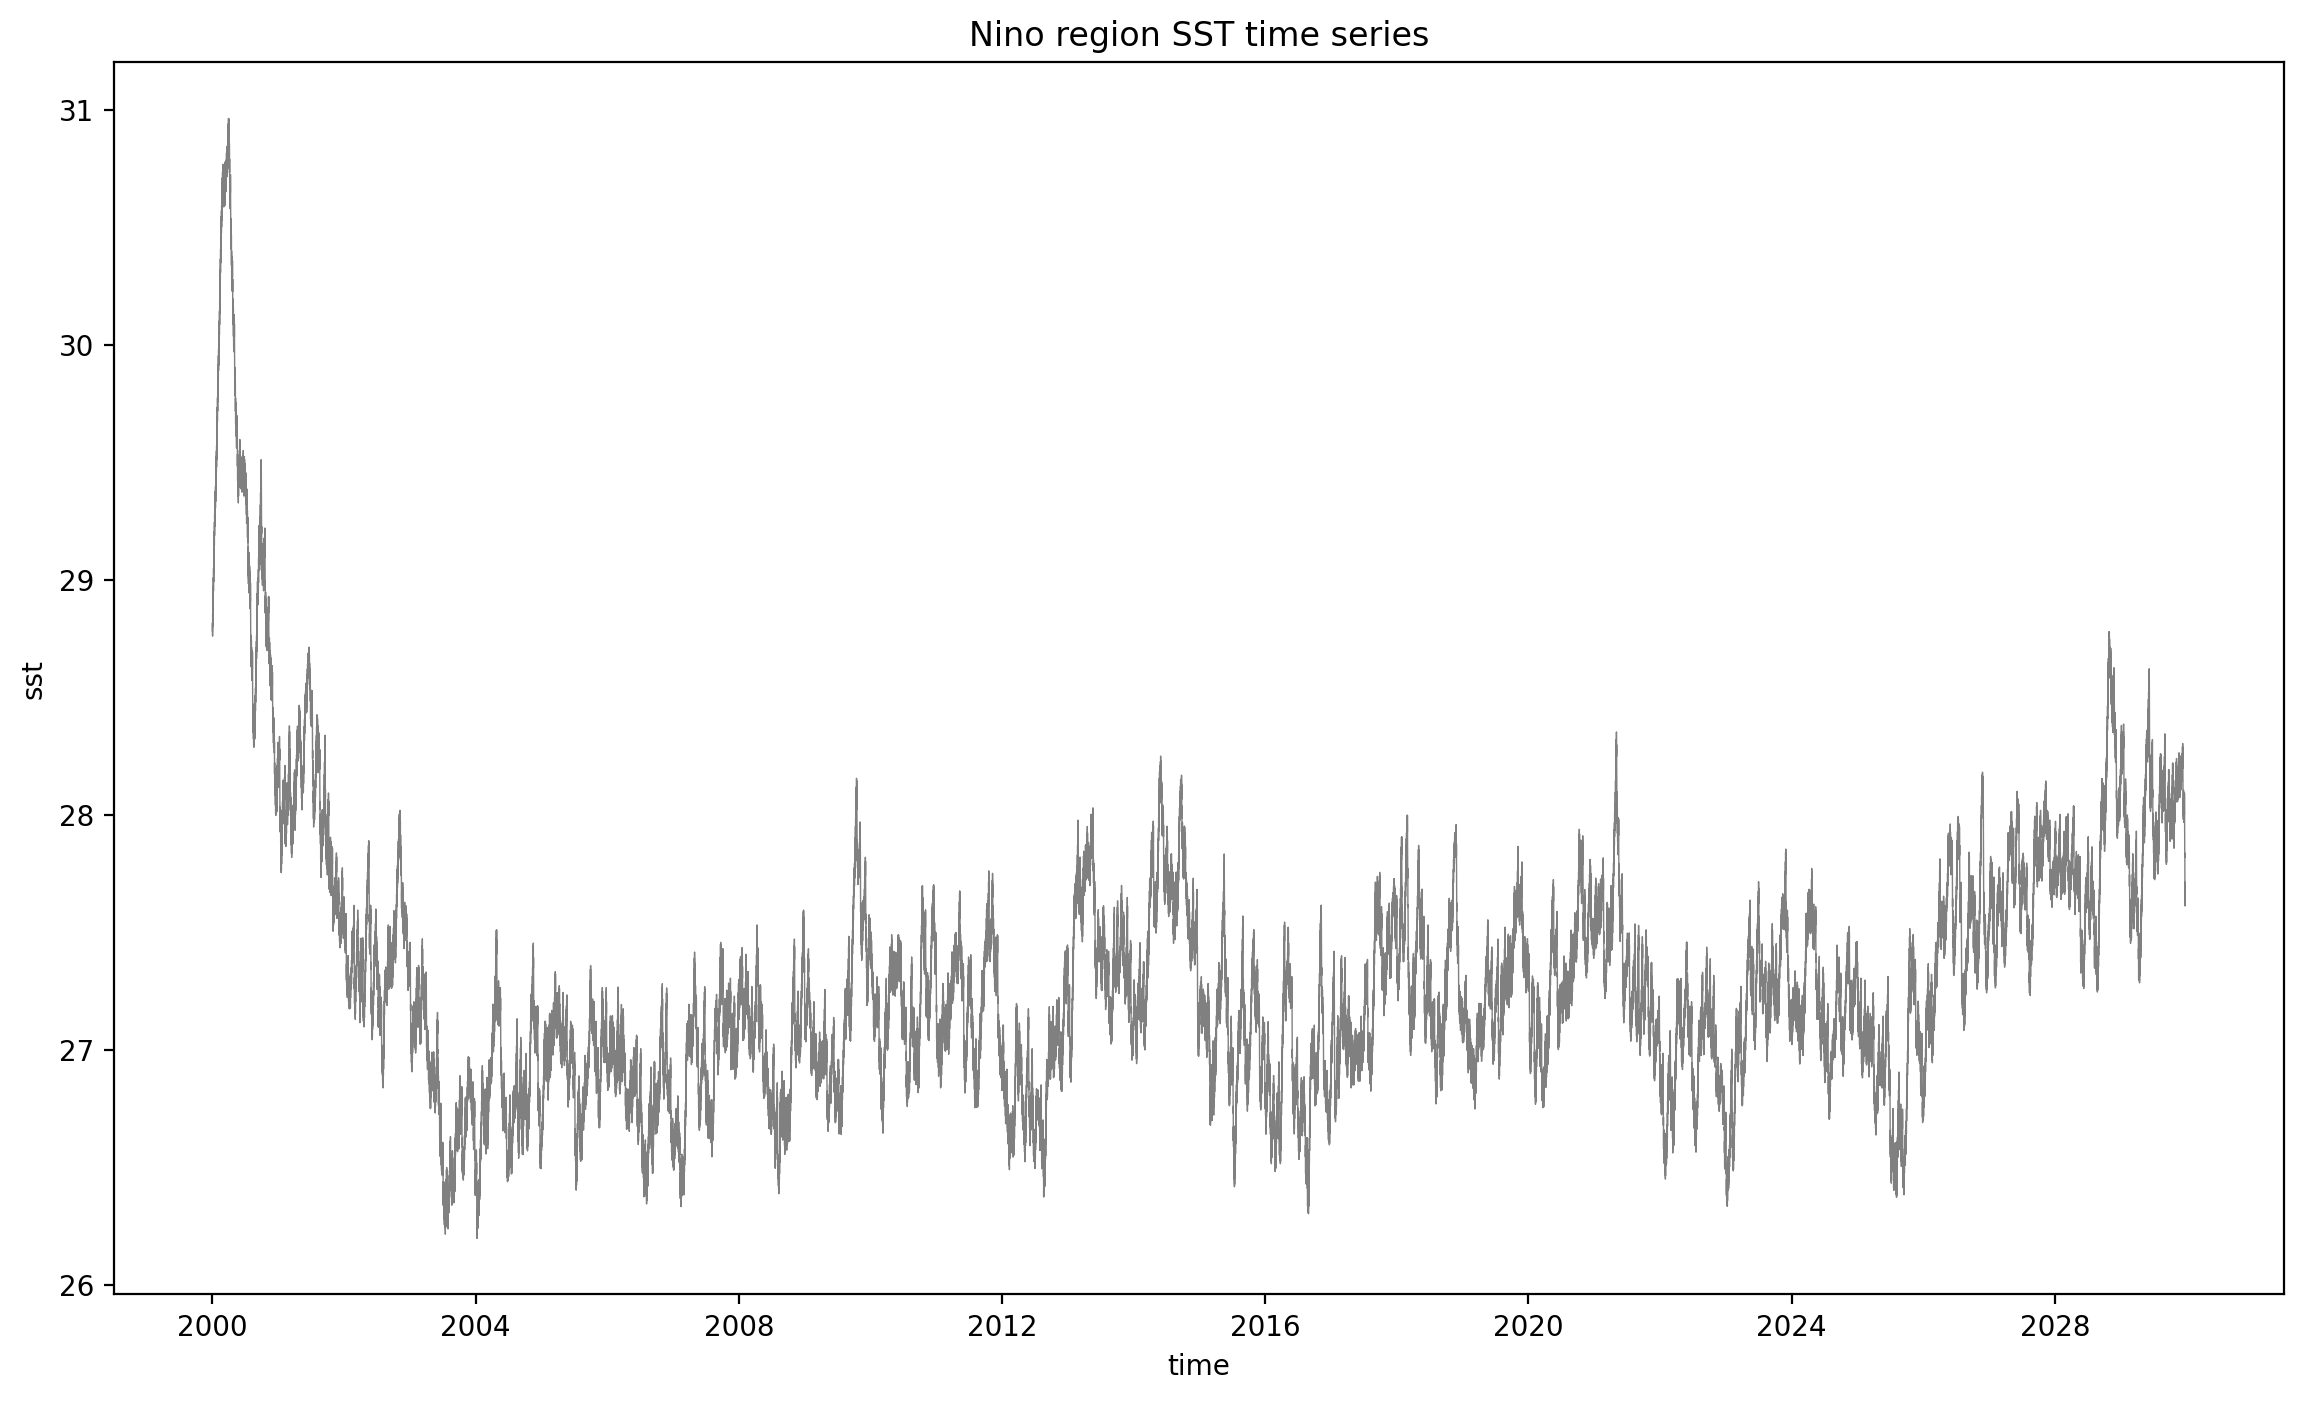

In [5]:
#plot the means
fig=plt.figure(figsize=(14,8))
nino_region_mean.sst.plot(linewidth=0.5, color='grey')
plt.title("Nino region SST time series")
#show plot
plt.show()
fig.savefig("NinoSST_run_"+runn+".png")

In [6]:
#create a rolling 3 month mean dataset
#rolling_mean = nino_anom.rolling(time=3, center=True).mean()
rolling_mean = nino_anom.rolling(time=360, center=True).mean()
#define mask for positive and negative anomoly values
positive = nino_anom.where(nino_anom > 0)
negative = nino_anom.where(nino_anom < 0)

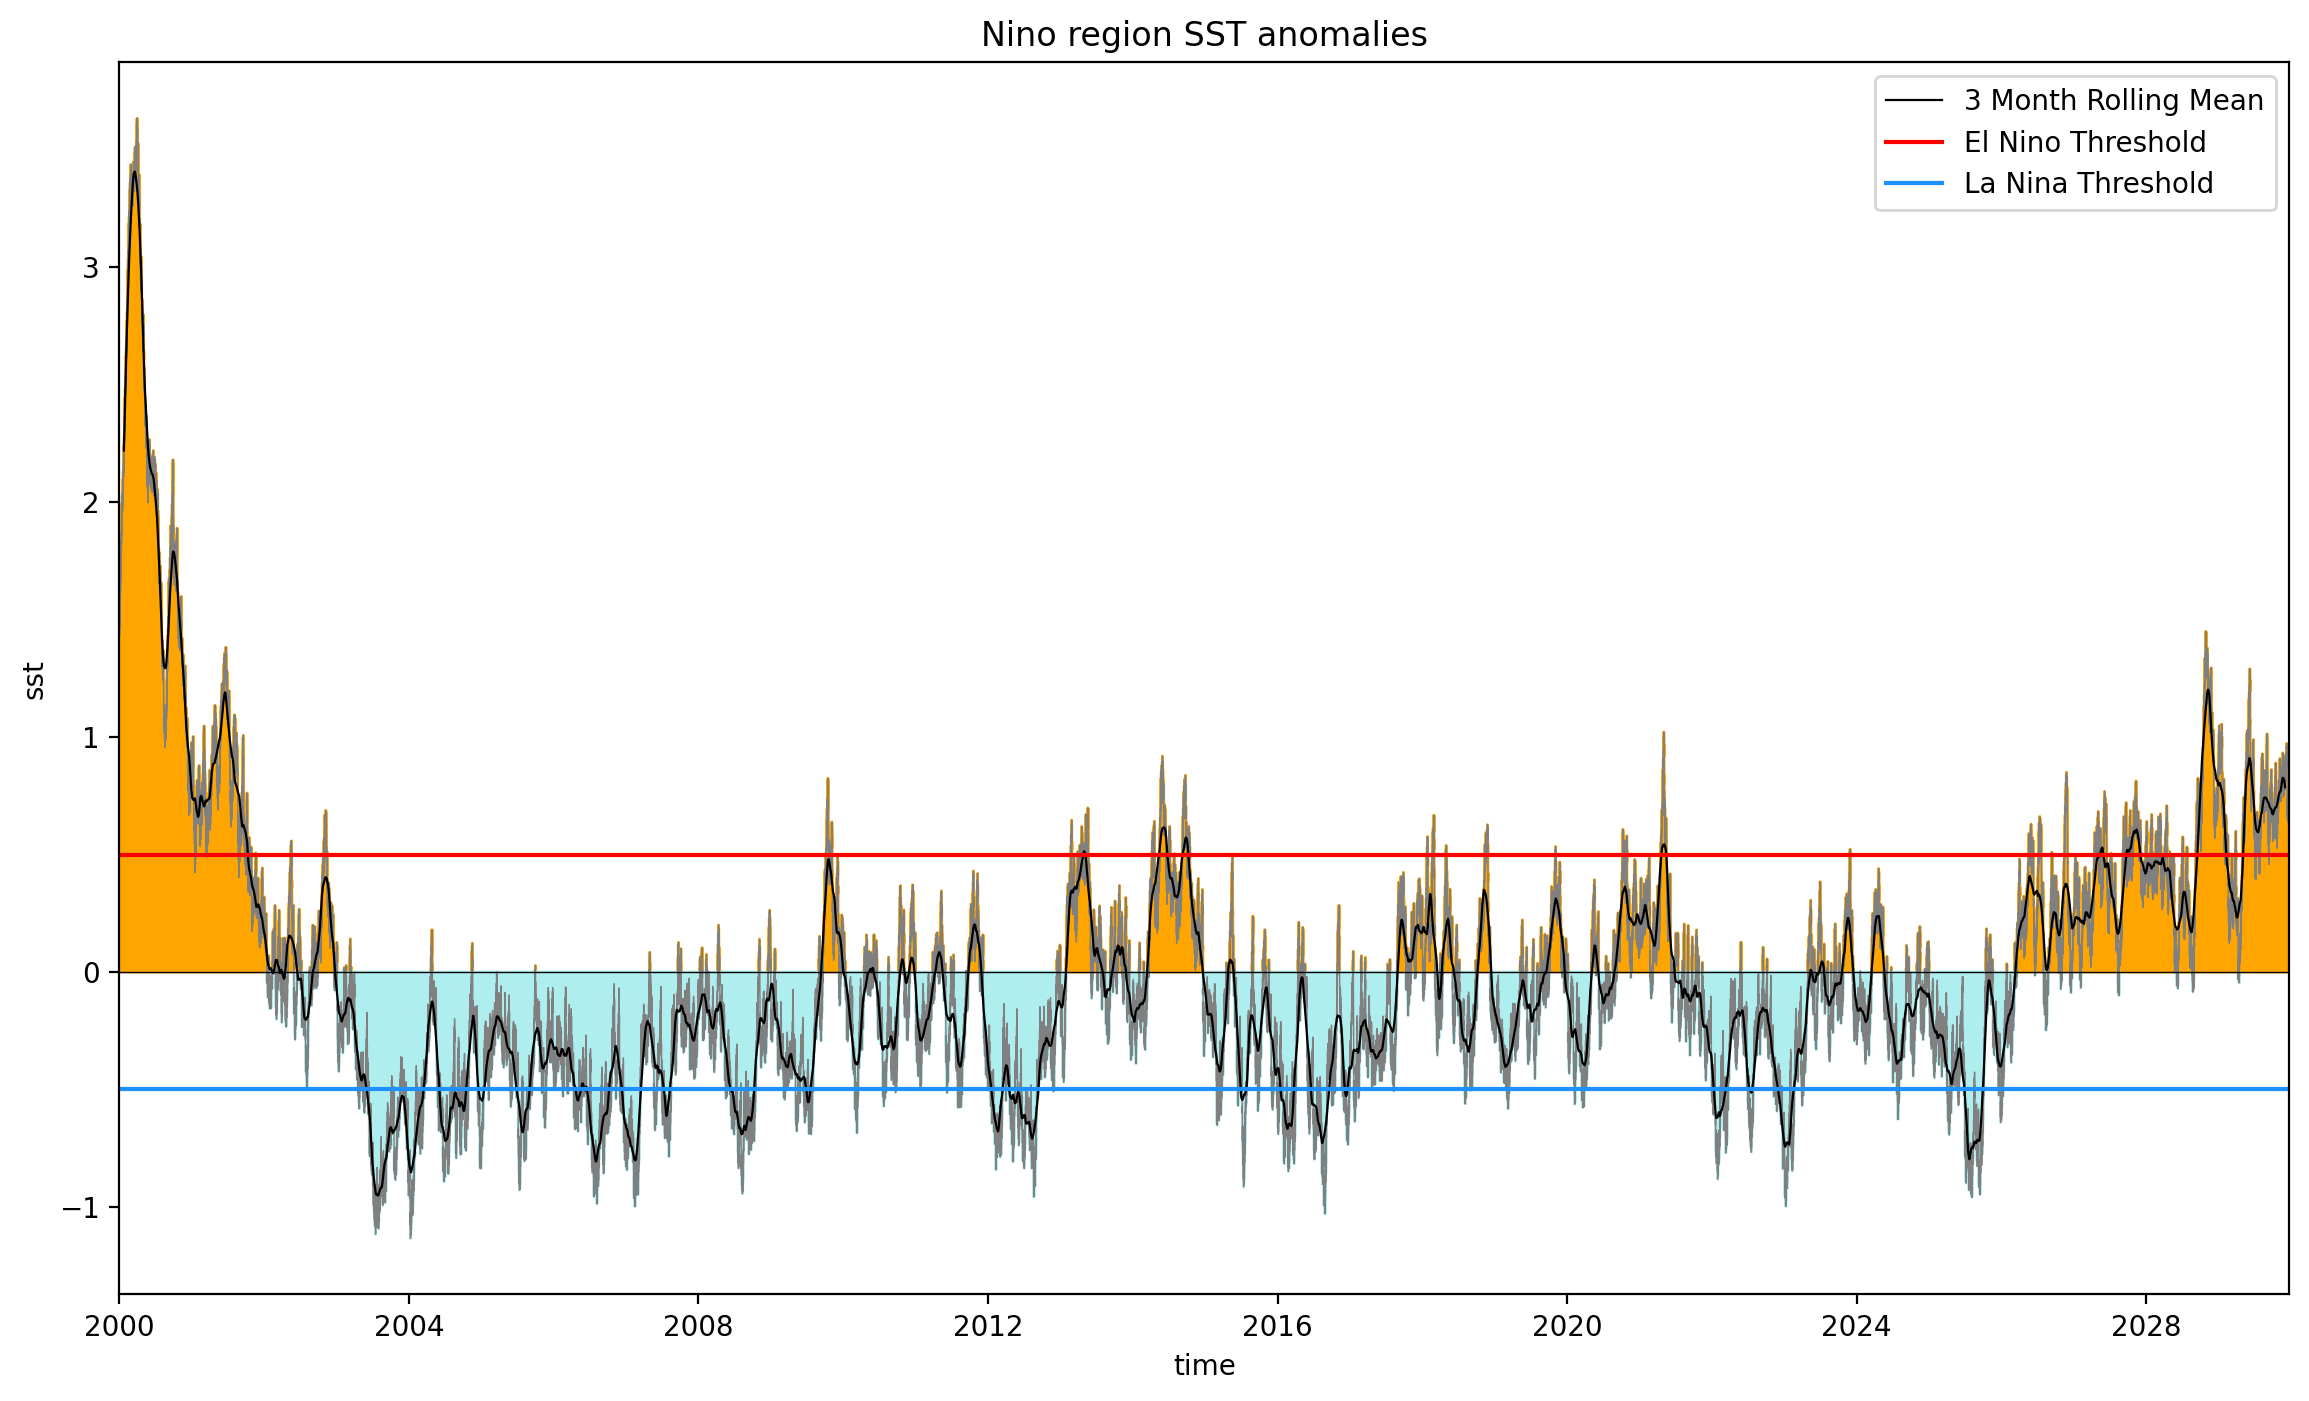

In [7]:
fig=plt.figure(figsize=(14,8))

#plot the anomalies
nino_anom.plot(linewidth=0.5, color='grey')

#fill the spaces between the 0 line and the anomaly values
plt.fill_between(nino_anom.time, 0, positive, color='orange')
plt.fill_between(nino_anom.time, 0, negative, color='paleturquoise')

#plot the rolling mean
rolling_mean.plot(color='k', linewidth=0.8, label='3 Month Rolling Mean')

#create horizonal lines to demark 0, el nino and la nina thresholds
plt.axhline(0, linewidth=0.5, color='black')
plt.axhline(0.5, color='red', label='El Nino Threshold')
plt.axhline(-0.5, color='dodgerblue', label='La Nina Threshold')

#set the limits of the x axis
plt.xlim(nino_anom.time.min(), nino_anom.time.max())

#create a legend and place it outside of plot
plt.legend(bbox_to_anchor=(1,1))
plt.title("Nino region SST anomalies")

#show plot
plt.show()
fig.savefig("NinoSSTAnomalies_run_"+runn+".png")

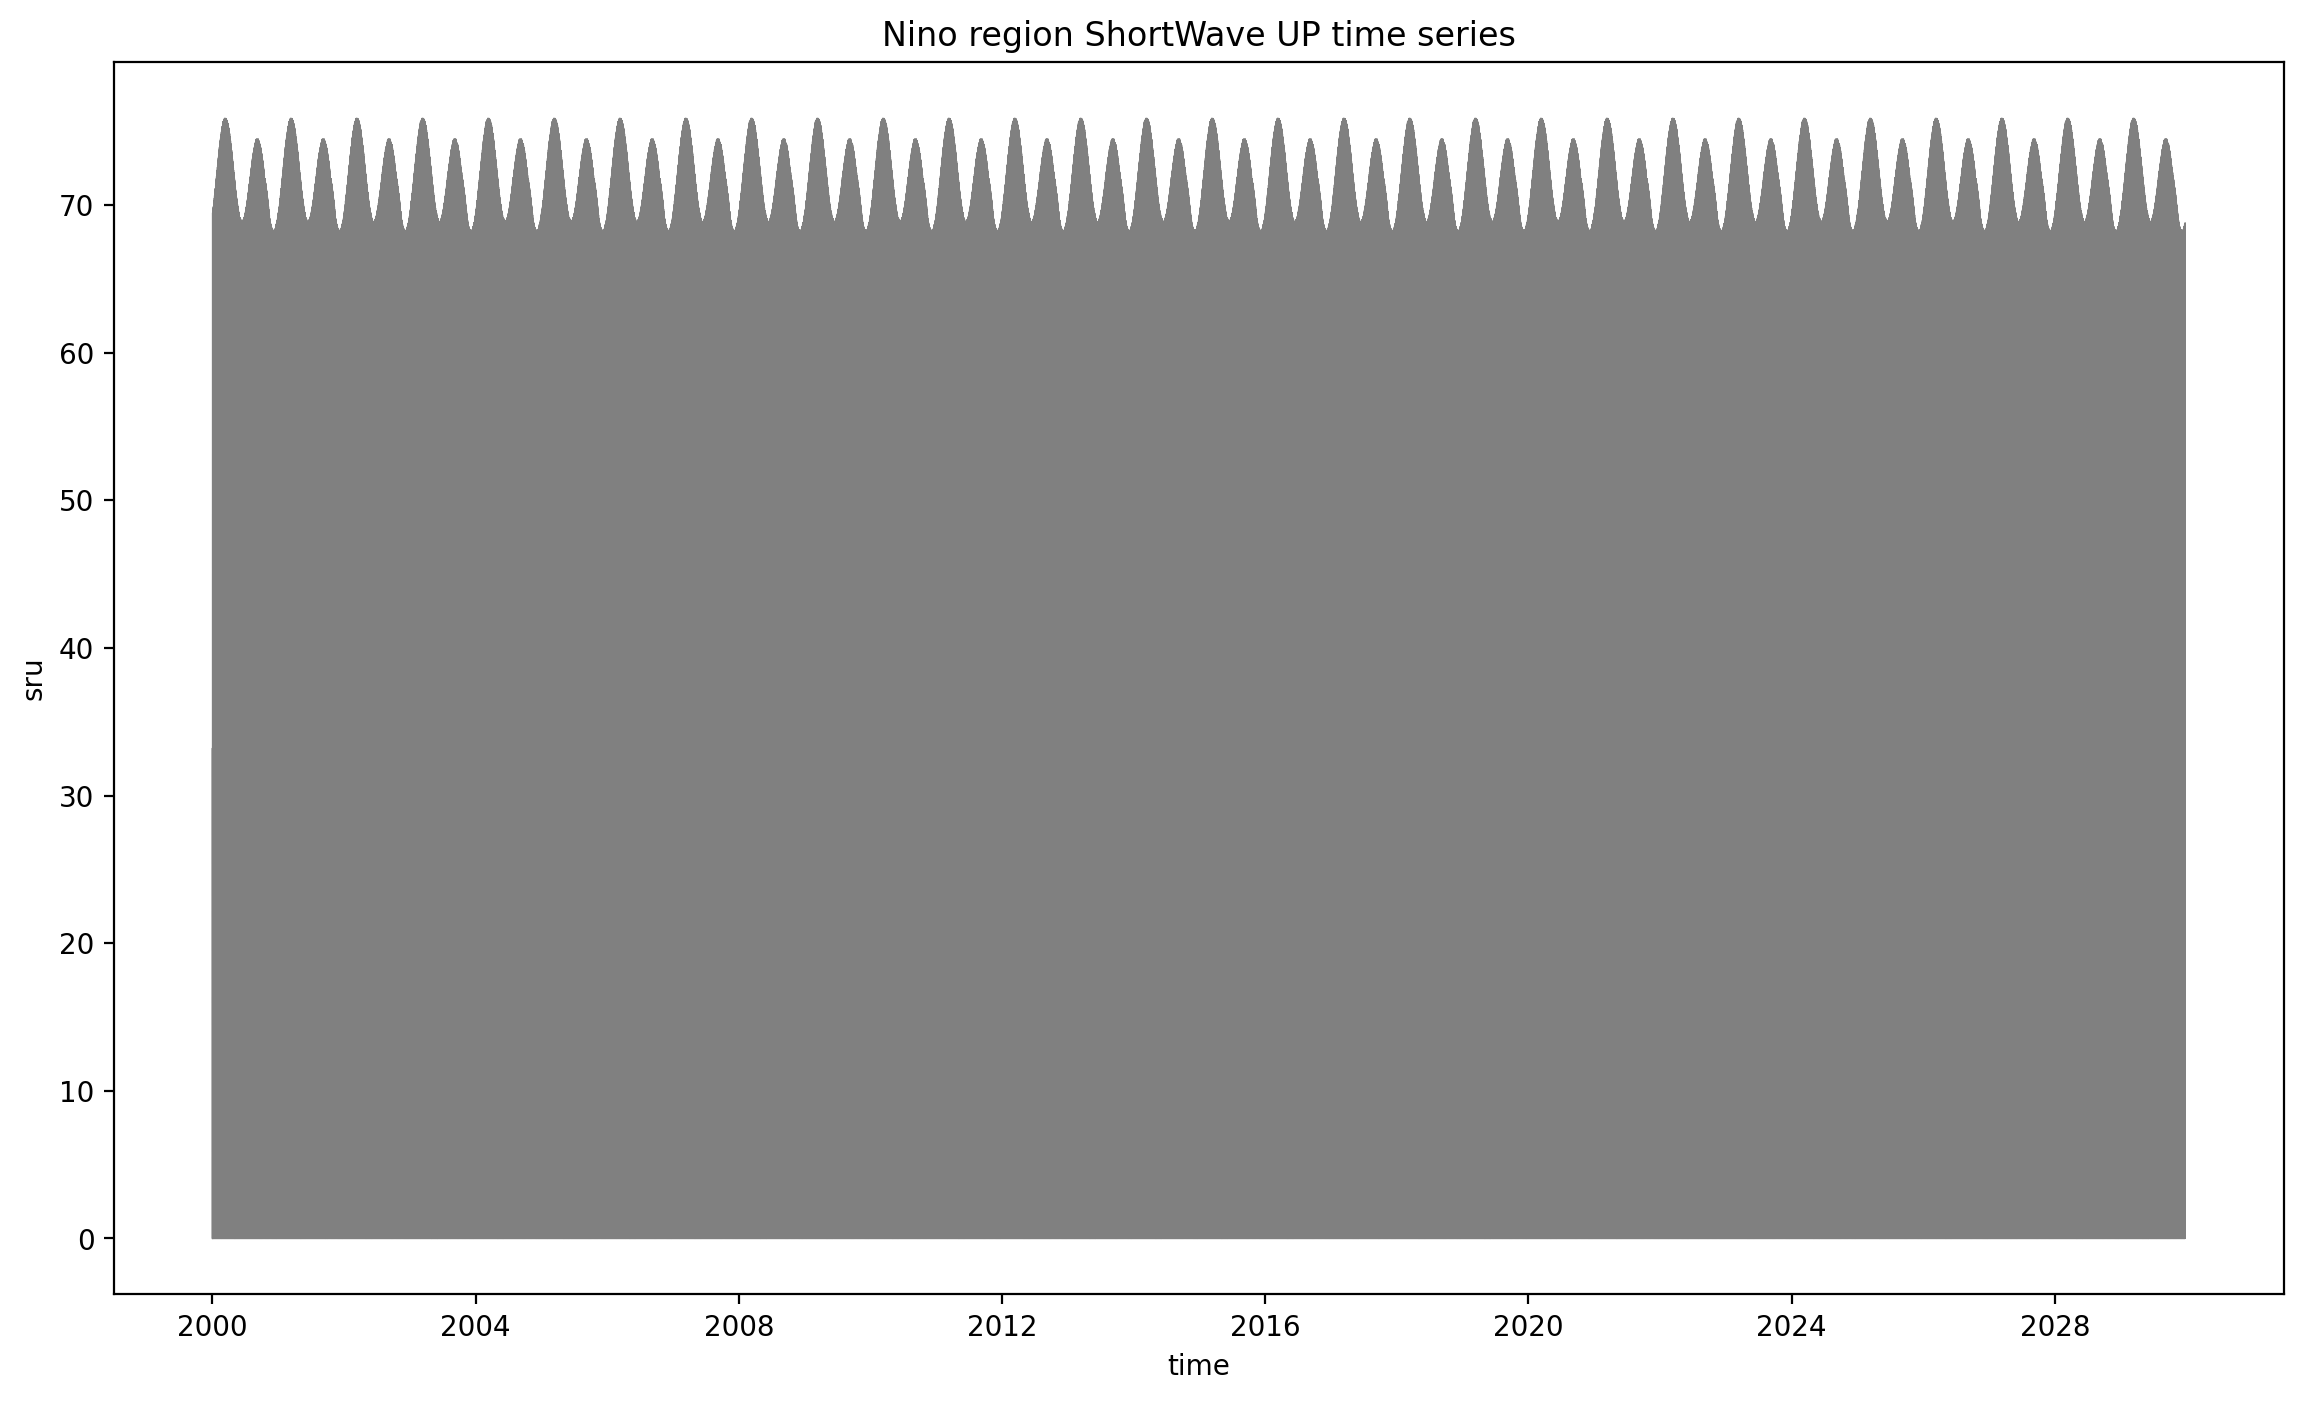

In [8]:
#plot the means
fig=plt.figure(figsize=(14,8))
nino_region_mean.sru.plot(linewidth=0.5, color='grey')
plt.title("Nino region ShortWave UP time series")
#show plot
plt.show()
fig.savefig("SRU_run_"+runn+".png")

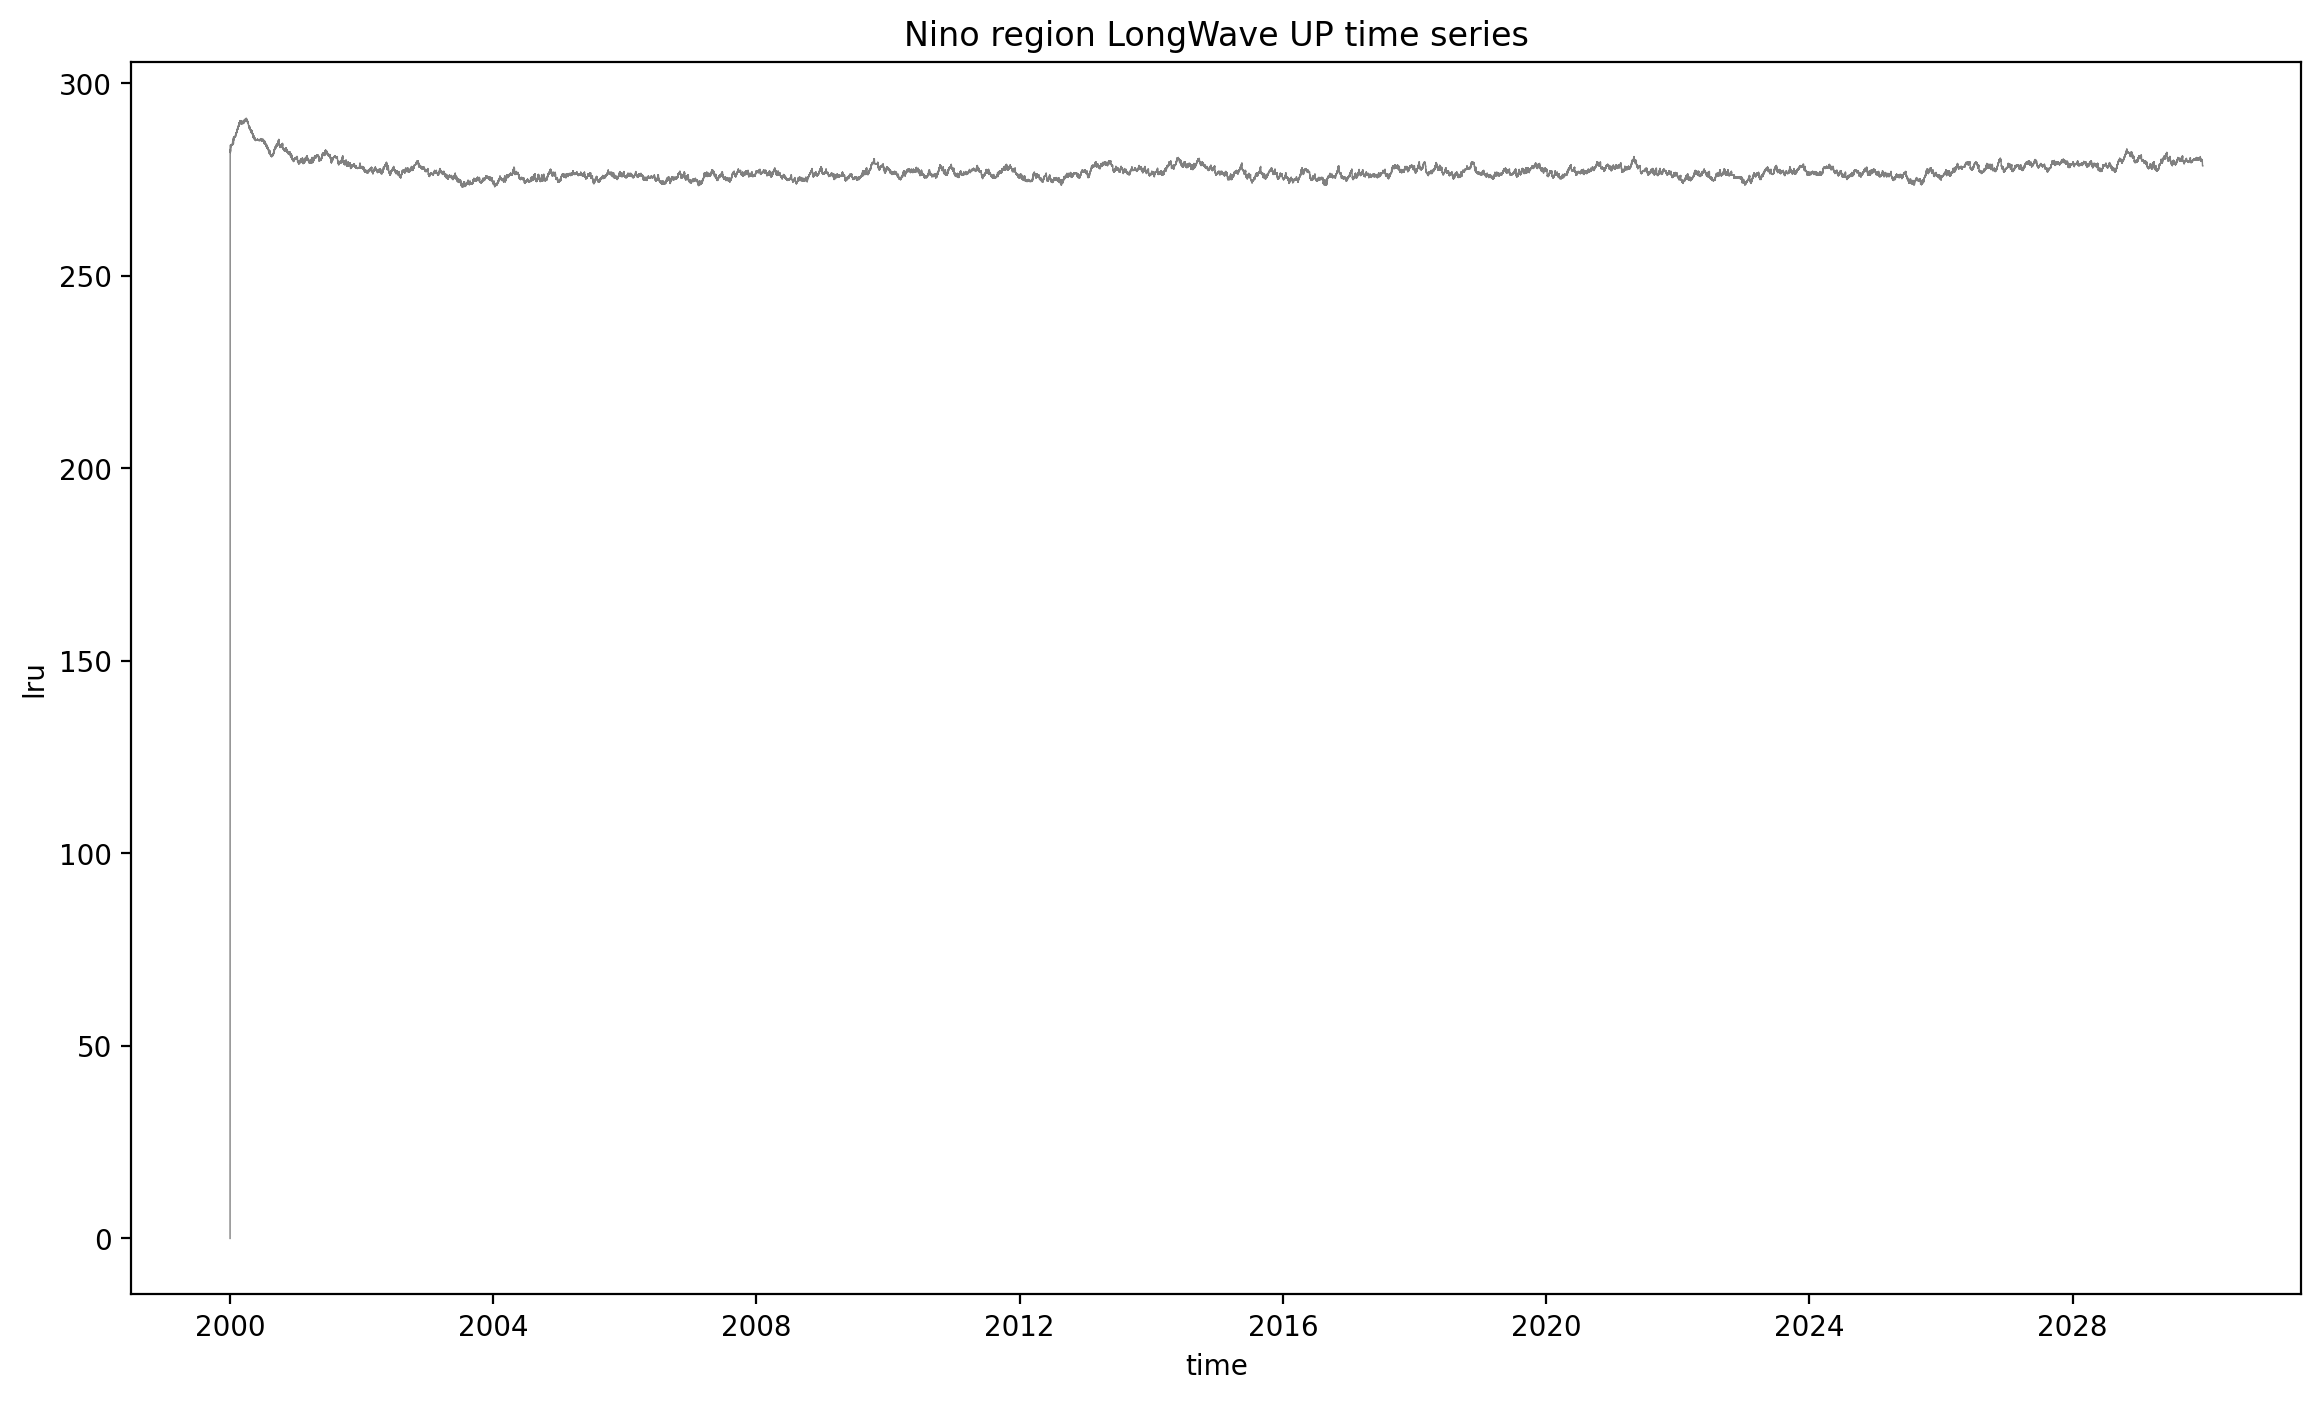

In [9]:
#plot the means
fig=plt.figure(figsize=(14,8))
nino_region_mean.lru.plot(linewidth=0.5, color='grey')
plt.title("Nino region LongWave UP time series")
#show plot
plt.show()
fig.savefig("LRU_run_"+runn+".png")

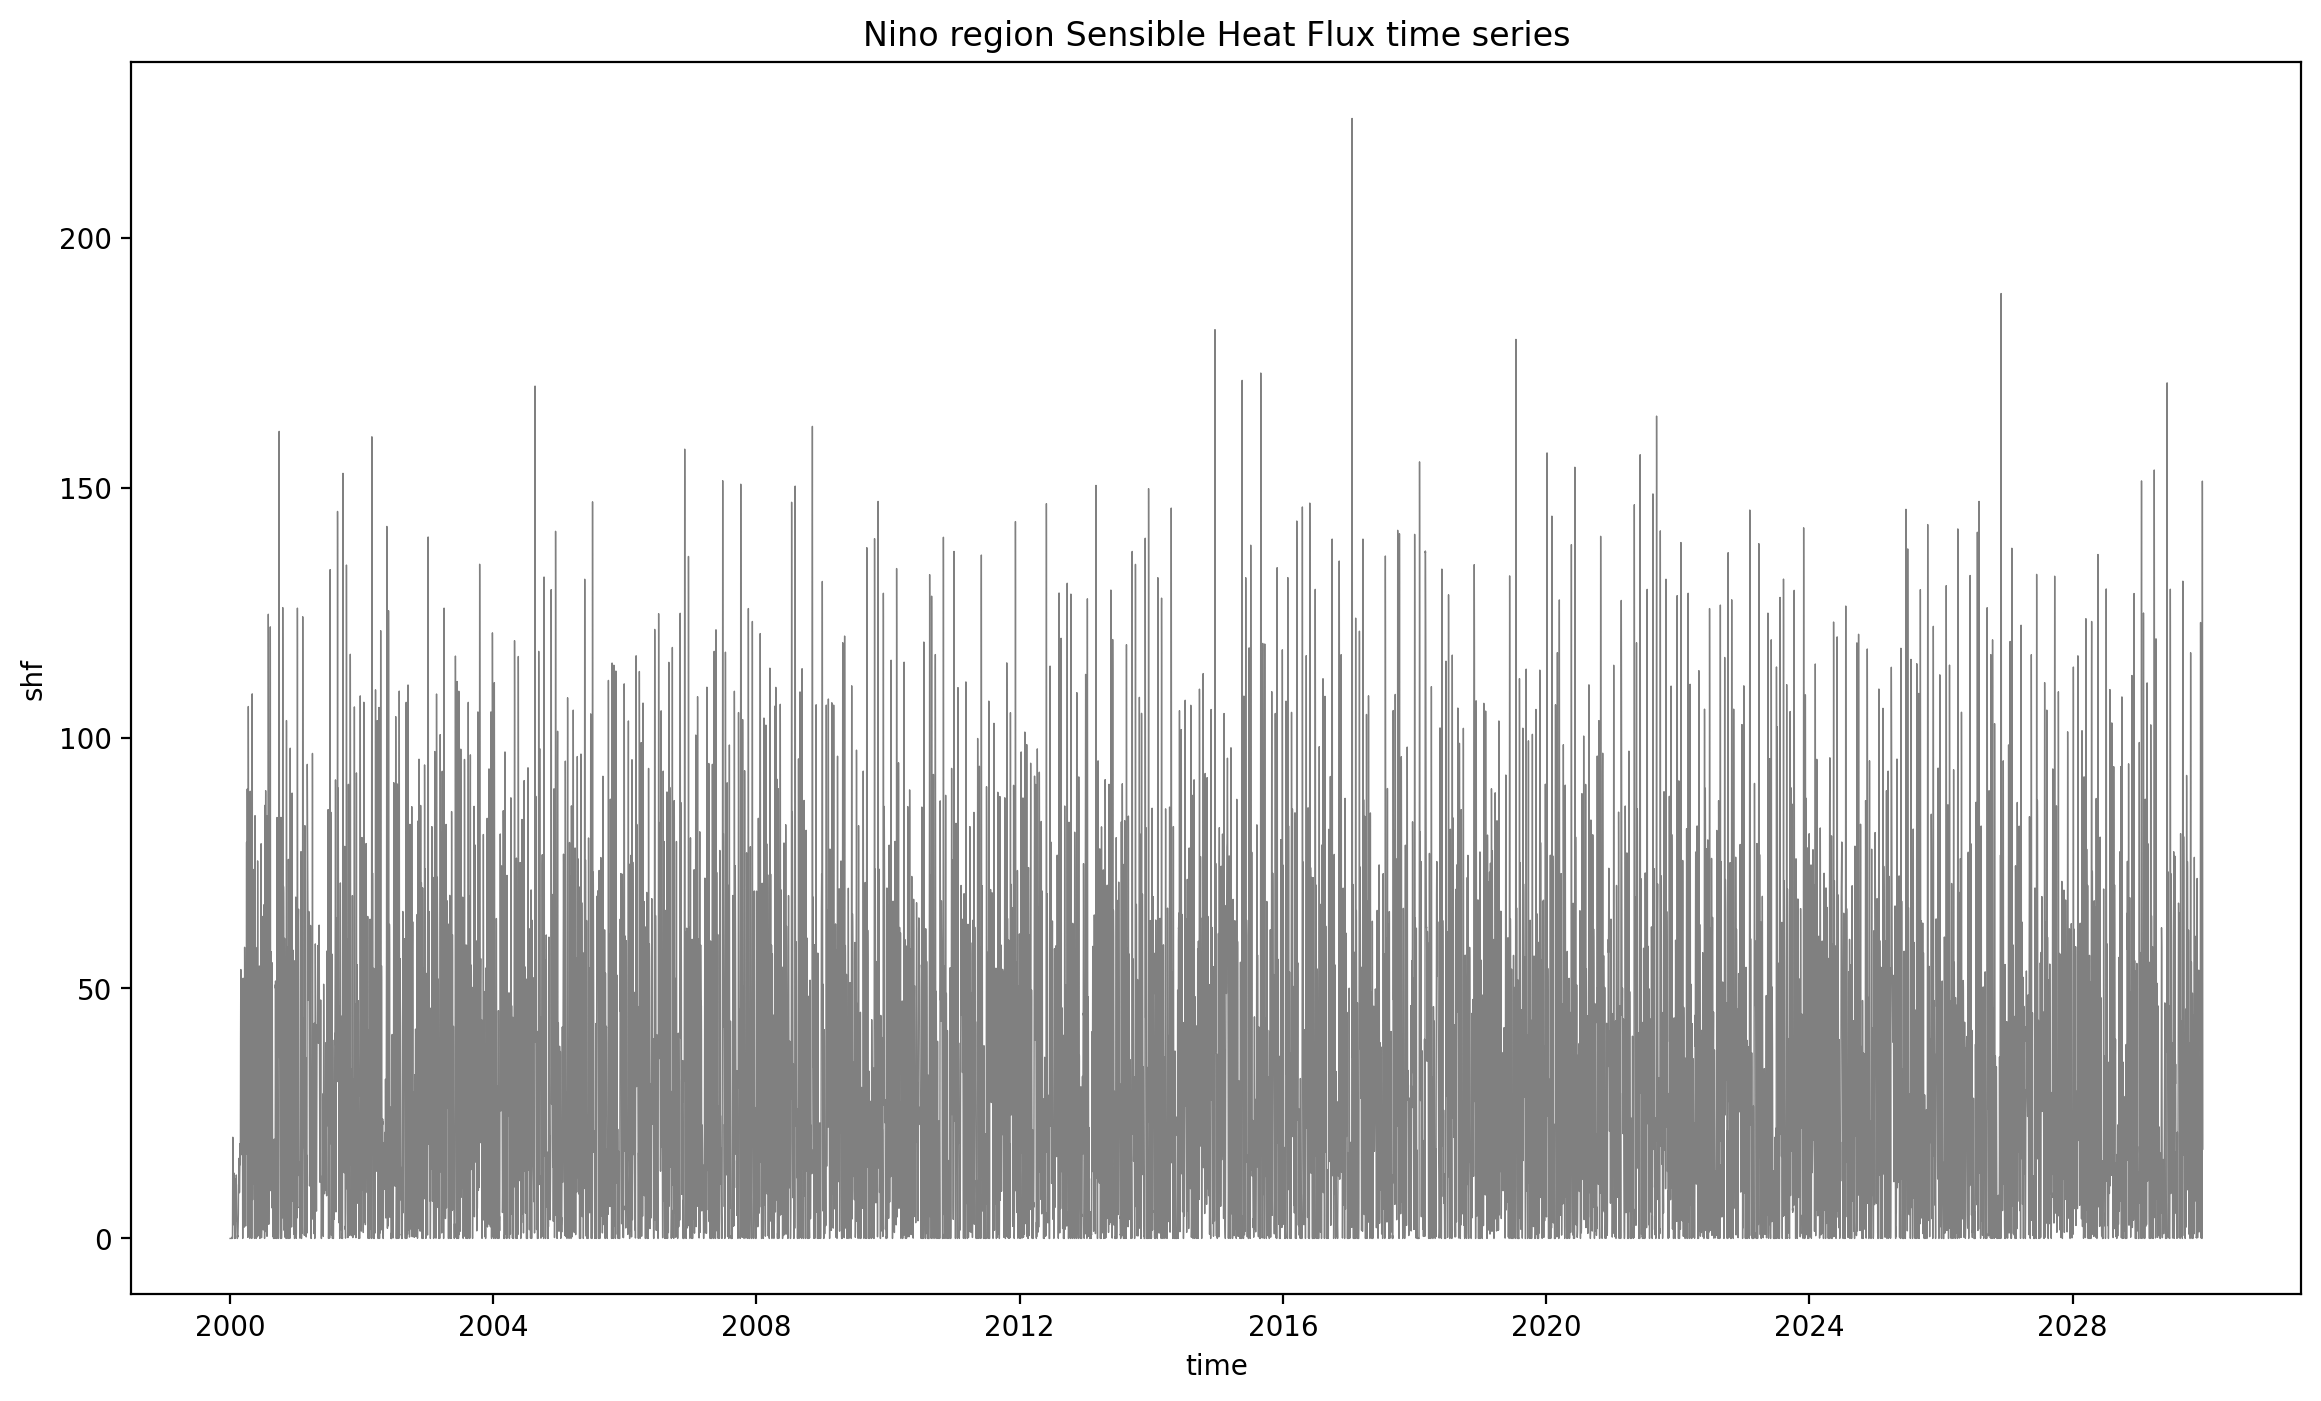

In [10]:
#plot the means
fig=plt.figure(figsize=(14,8))
nino_region_mean.shf.plot(linewidth=0.5, color='grey')
plt.title("Nino region Sensible Heat Flux time series")
#show plot
plt.show()
fig.savefig("SHF_run_"+runn+".png")

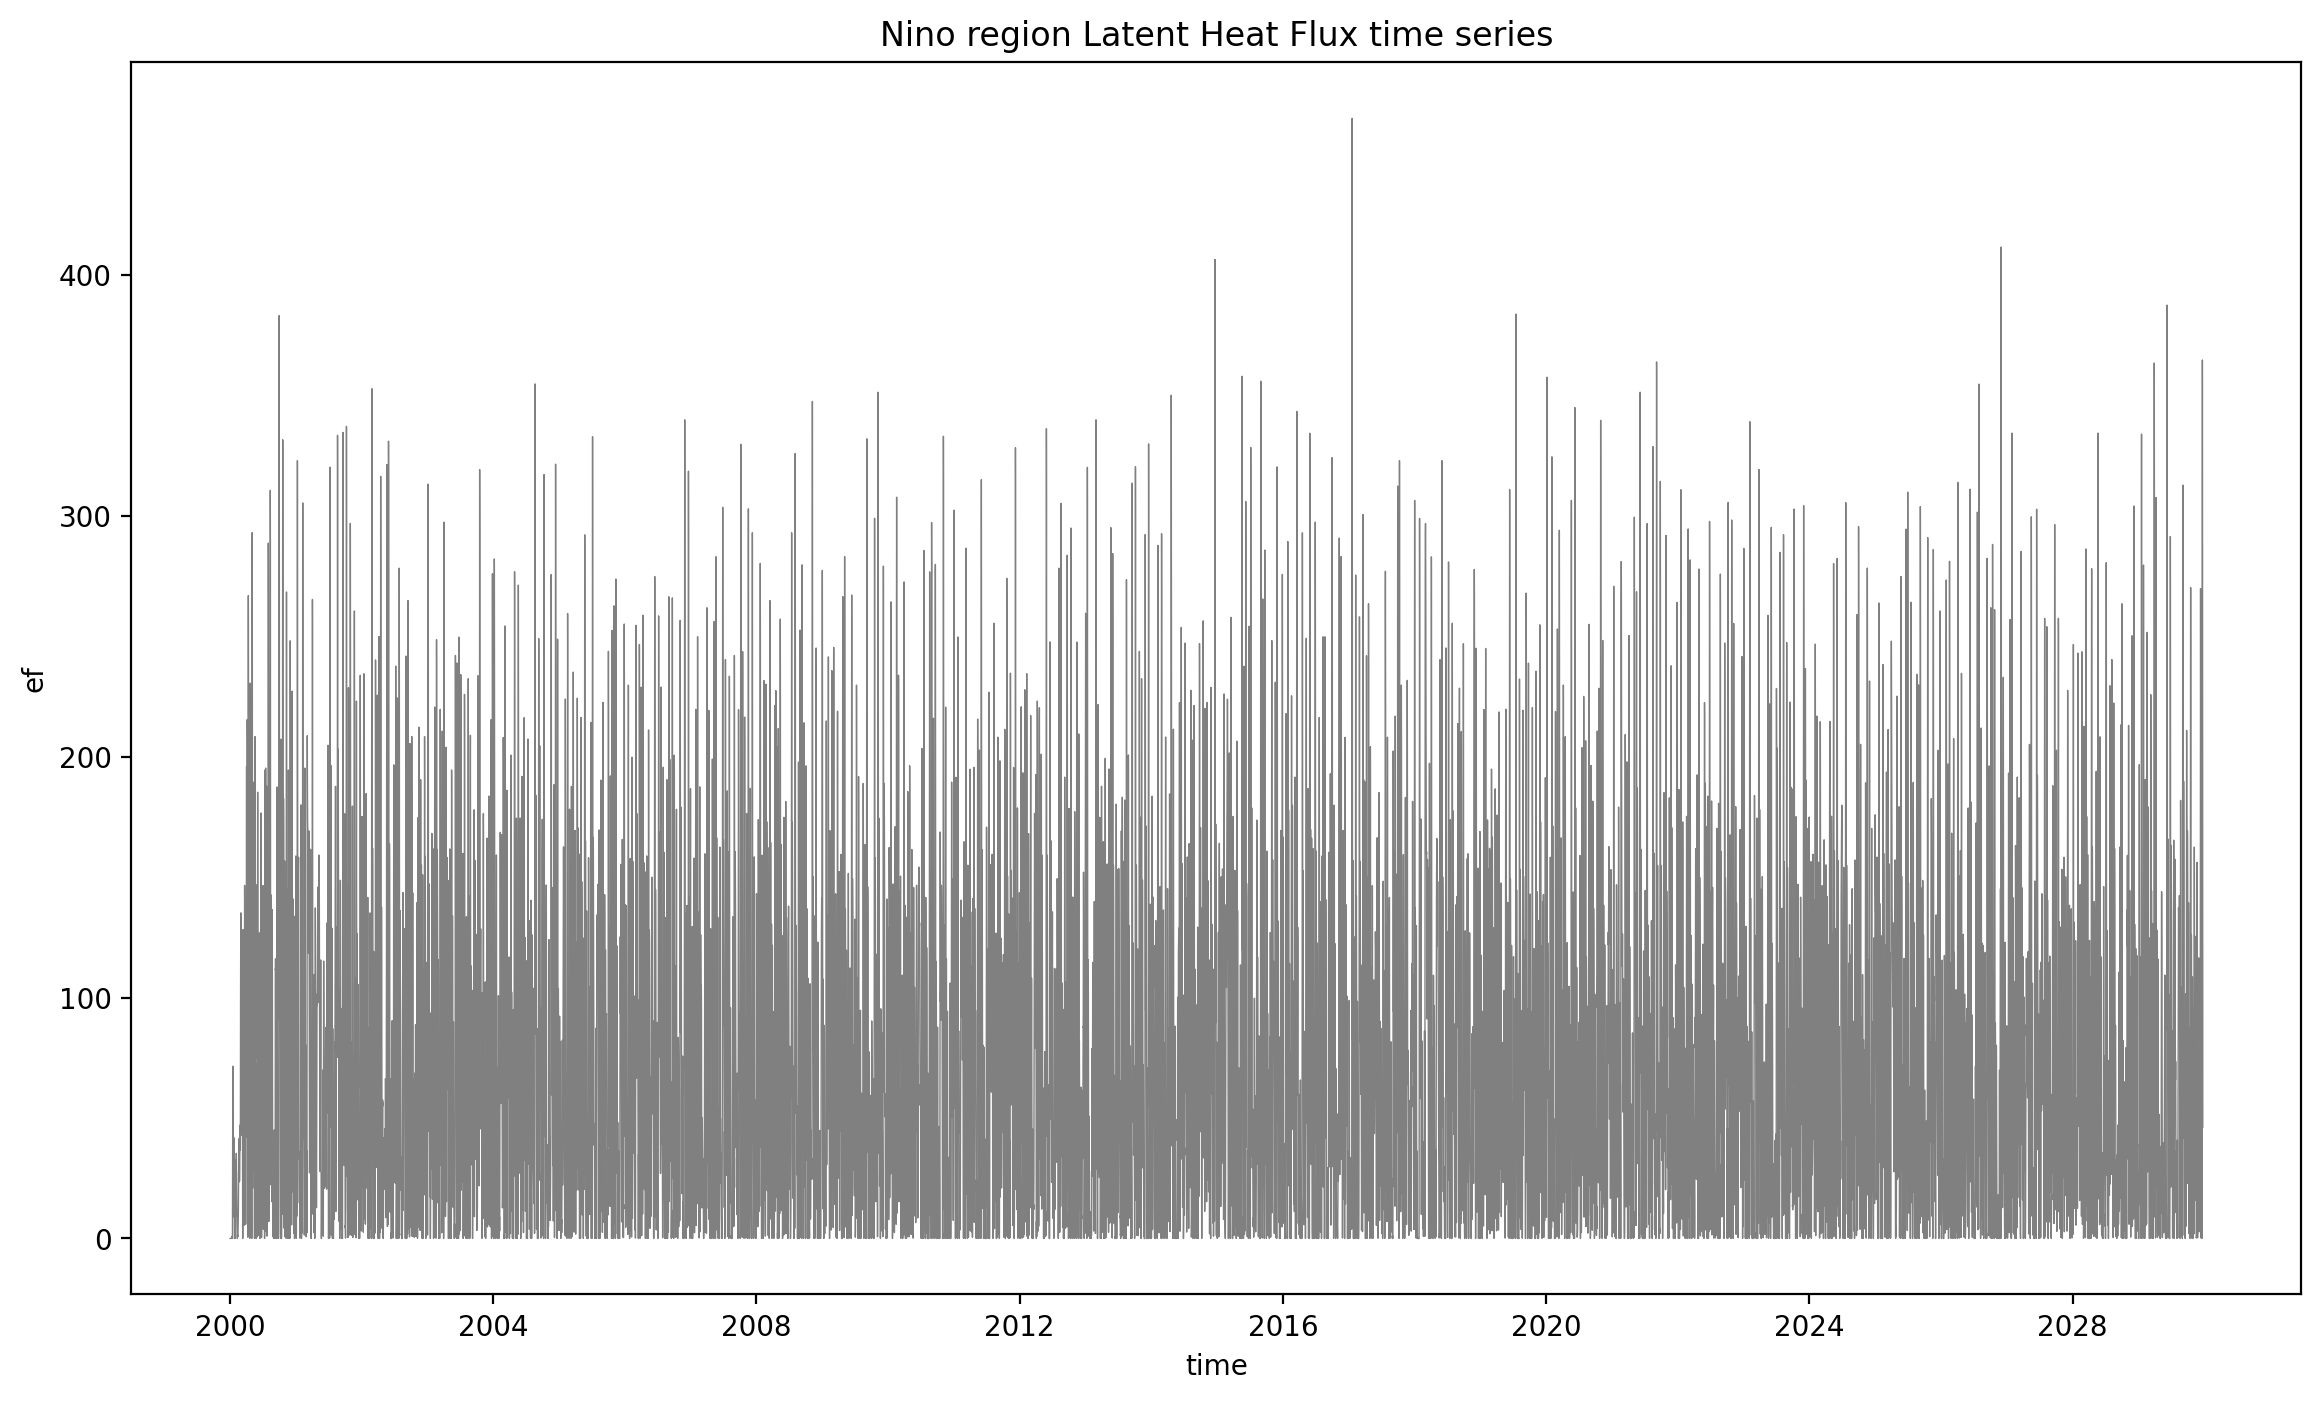

In [11]:
#plot the means
fig=plt.figure(figsize=(14,8))
lhf=2.5E6*nino_region_mean.ef
lhf.plot(linewidth=0.5, color='grey')
plt.title("Nino region Latent Heat Flux time series")
#show plot
plt.show()
fig.savefig("LHF_run_"+runn+".png")

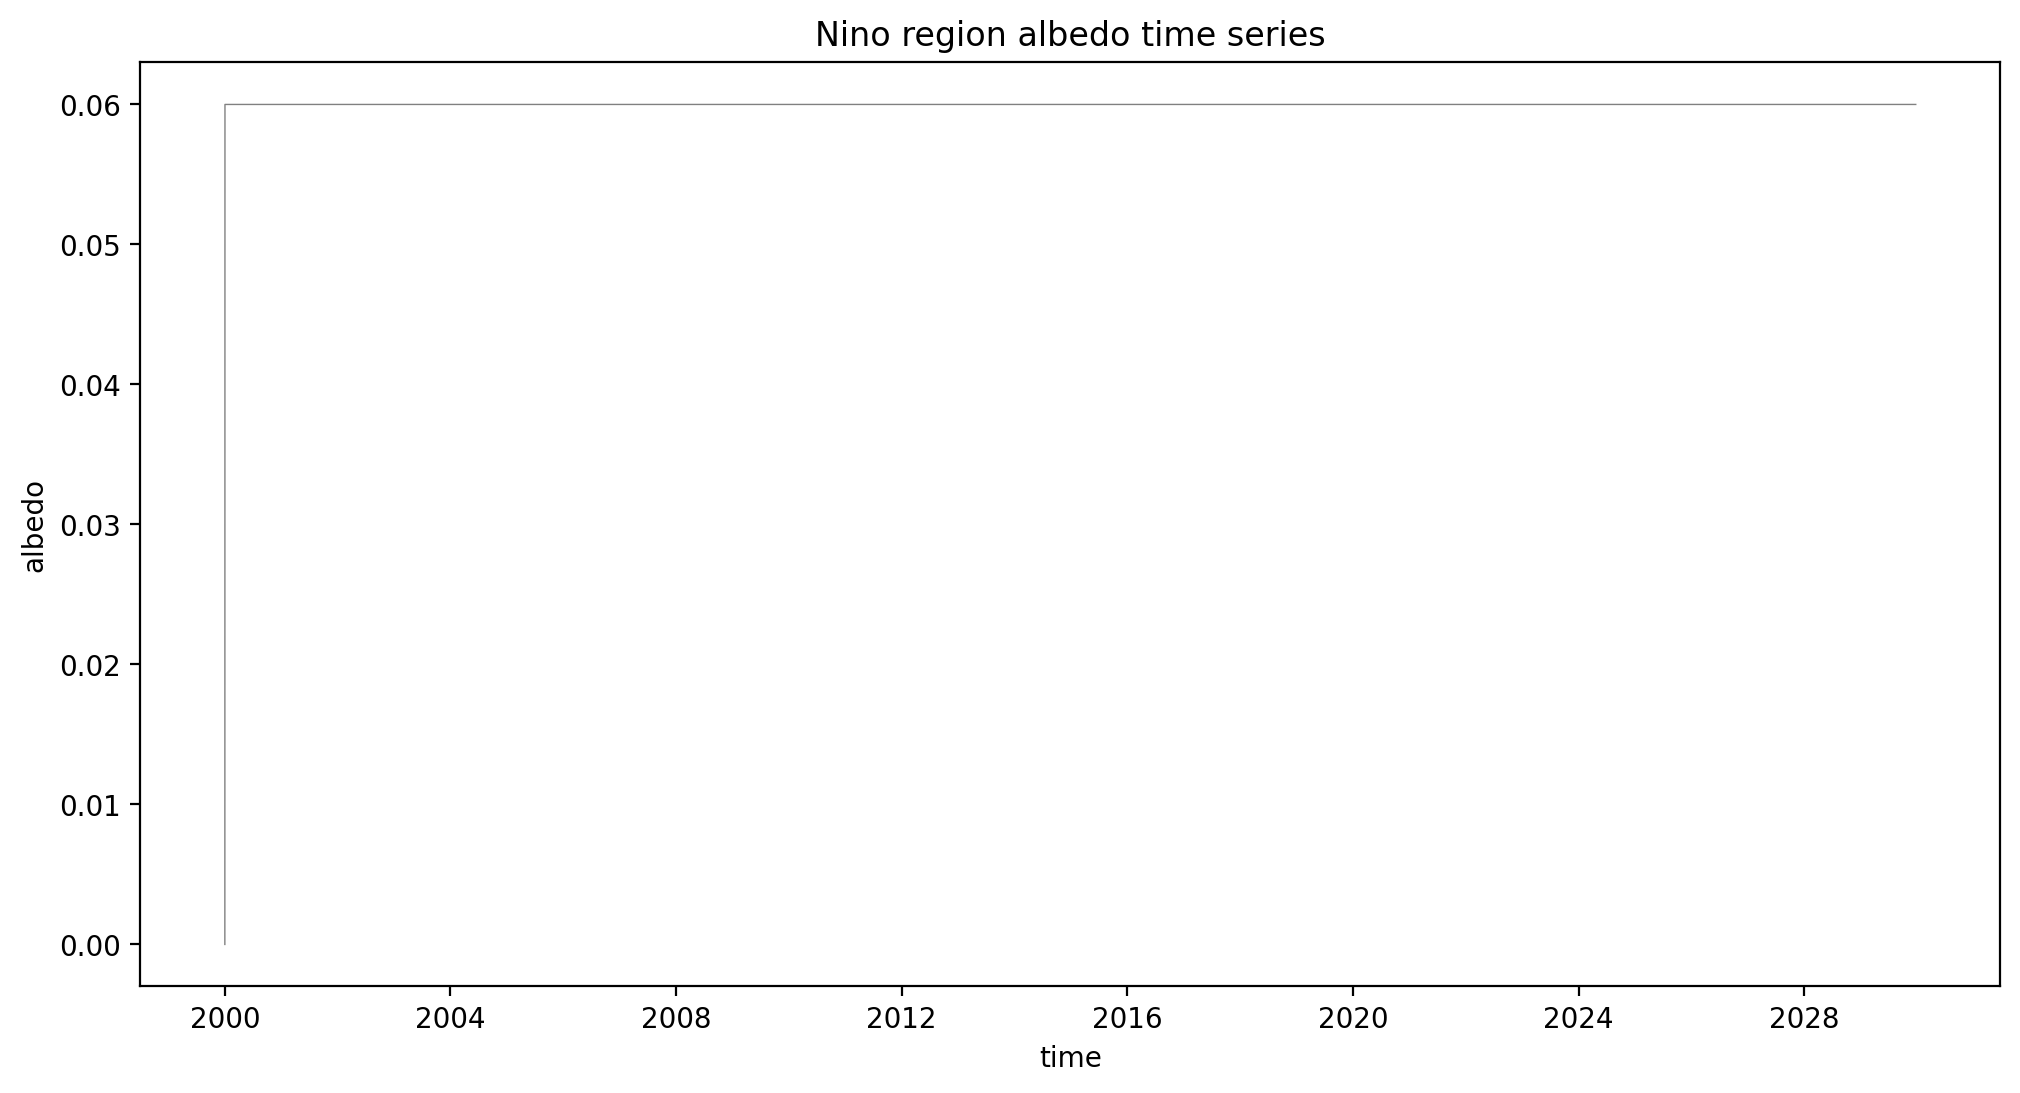

In [12]:
#plot the means
nino_region_mean.albedo.plot(linewidth=0.5, color='grey')
plt.title("Nino region albedo time series")
#show plot
plt.show()

In [13]:
USA_region = data.sel(lon=slice(236, 294), lat=slice(50, 25))
#USA_region

In [14]:
#the mean over the entire area (spatially) 
USA_region_mean = USA_region.mean(dim=('lat','lon'))

#the spatial and temporal mean for the entire area
USA_region_mean_climate = USA_region_mean.mean()

#build the anomoly dataset
#USA_anom = USA_month_mean - nino_region_mean

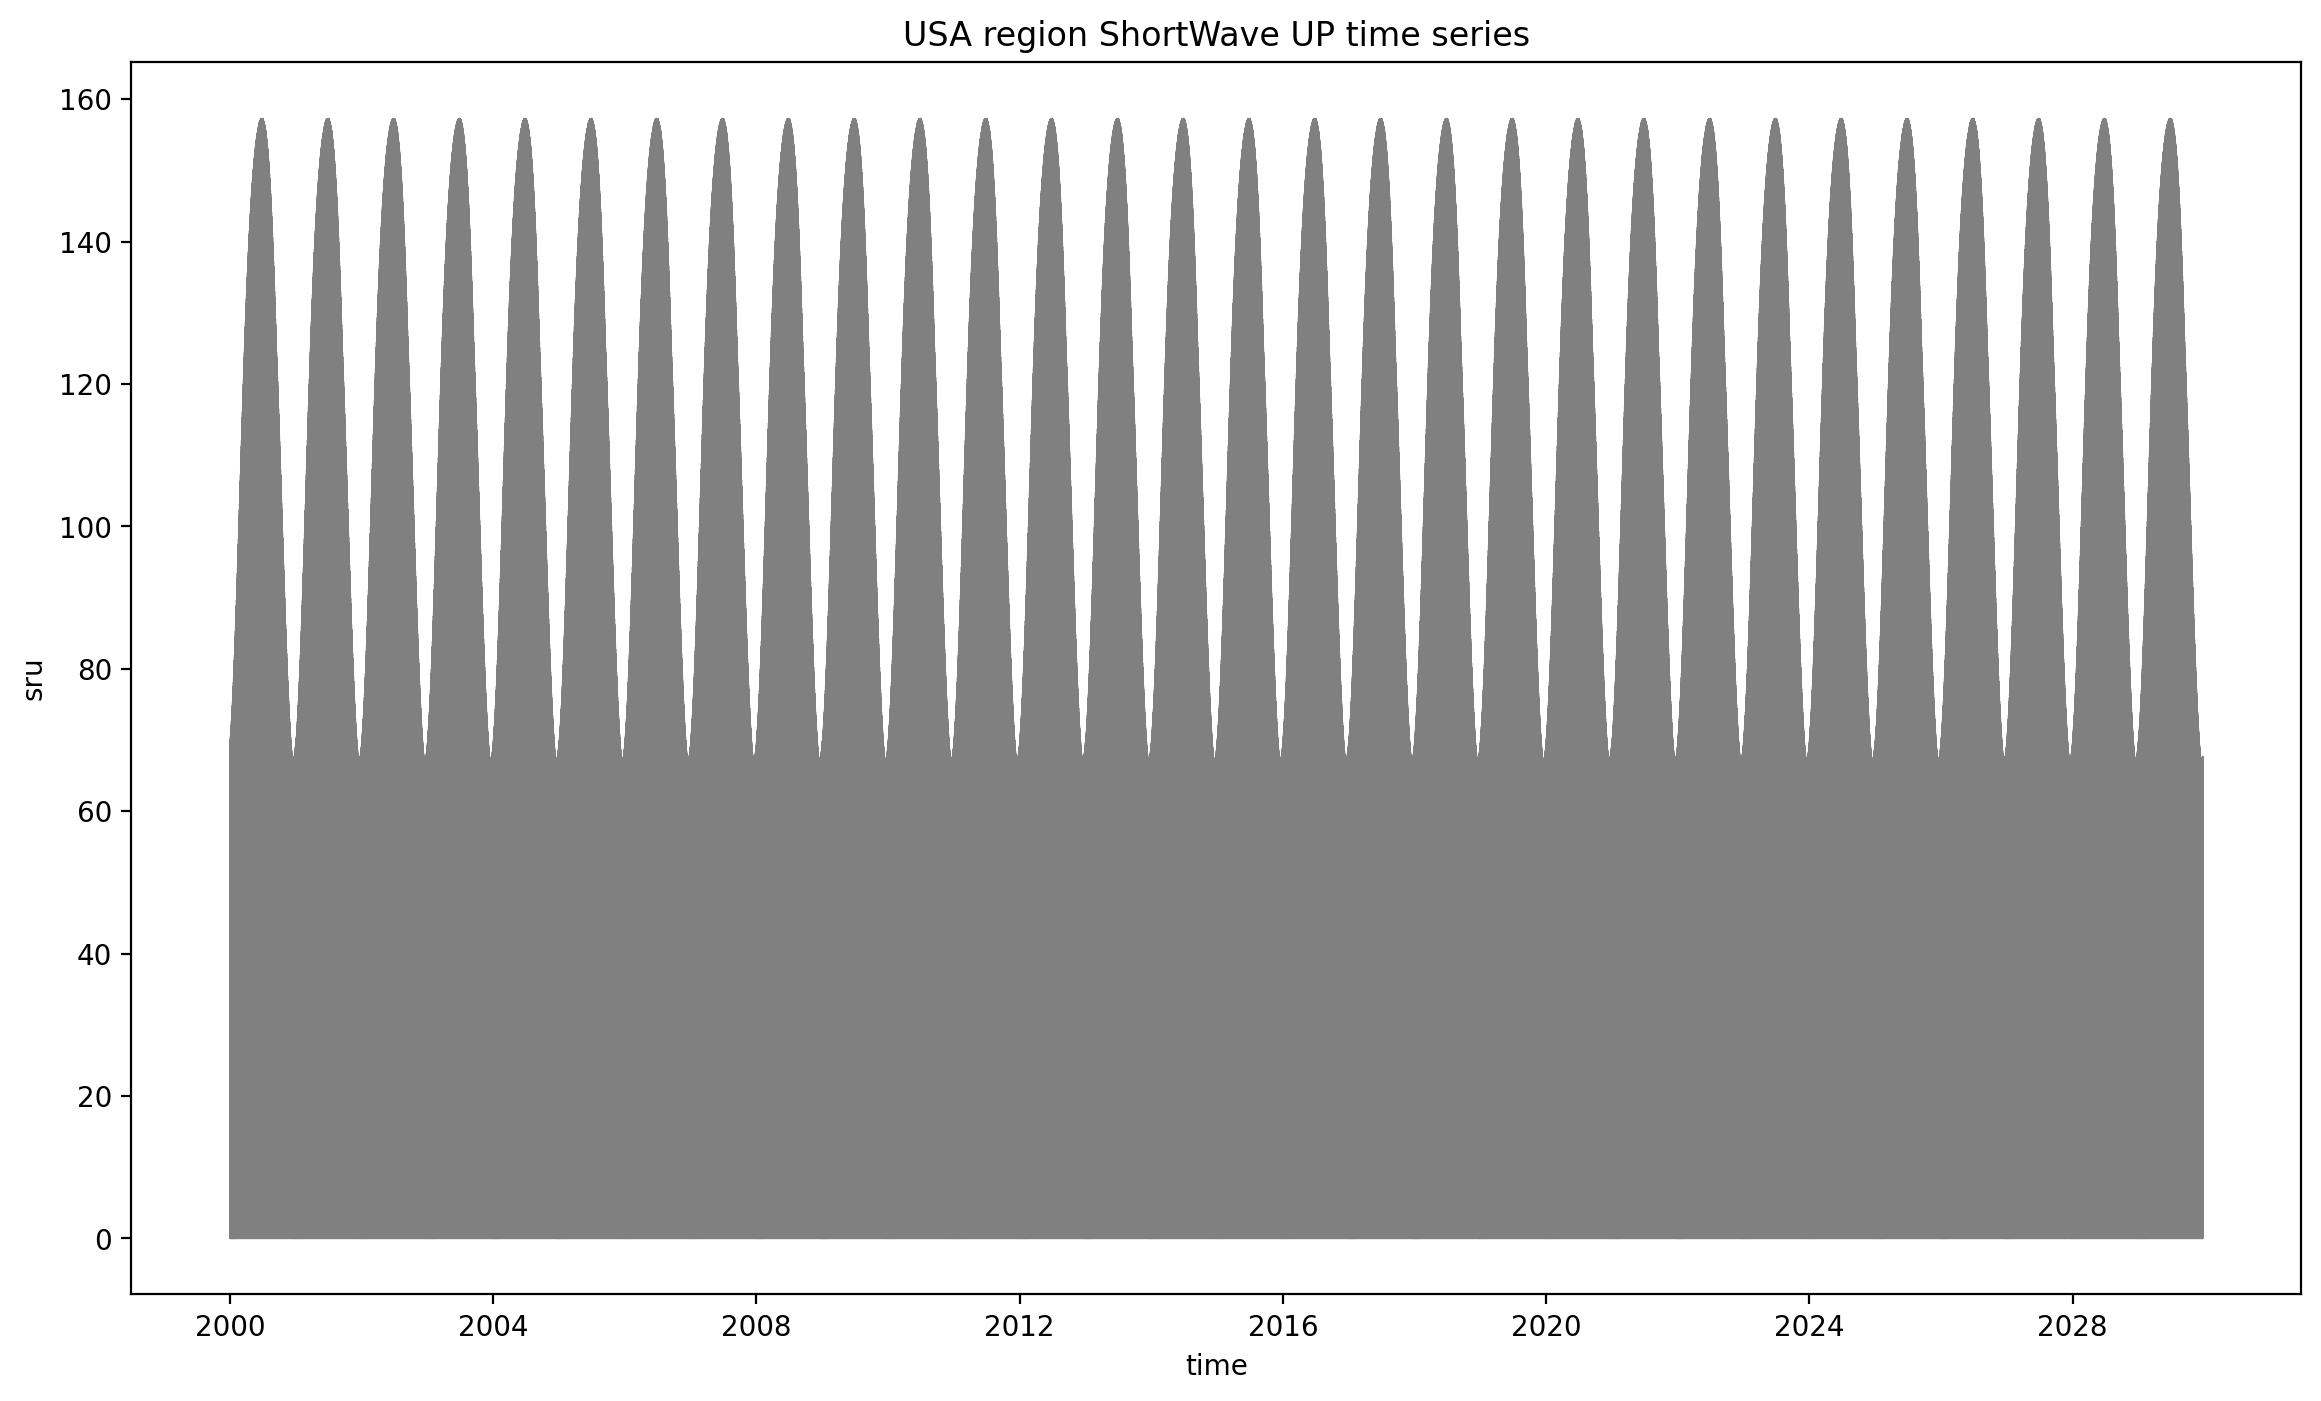

In [15]:
#plot the means
fig=plt.figure(figsize=(14,8))
USA_region_mean.sru.plot(linewidth=0.5, color='grey')
plt.title("USA region ShortWave UP time series")
#show plot
plt.show()
fig.savefig("SRU_run_USA_"+runn+".png")

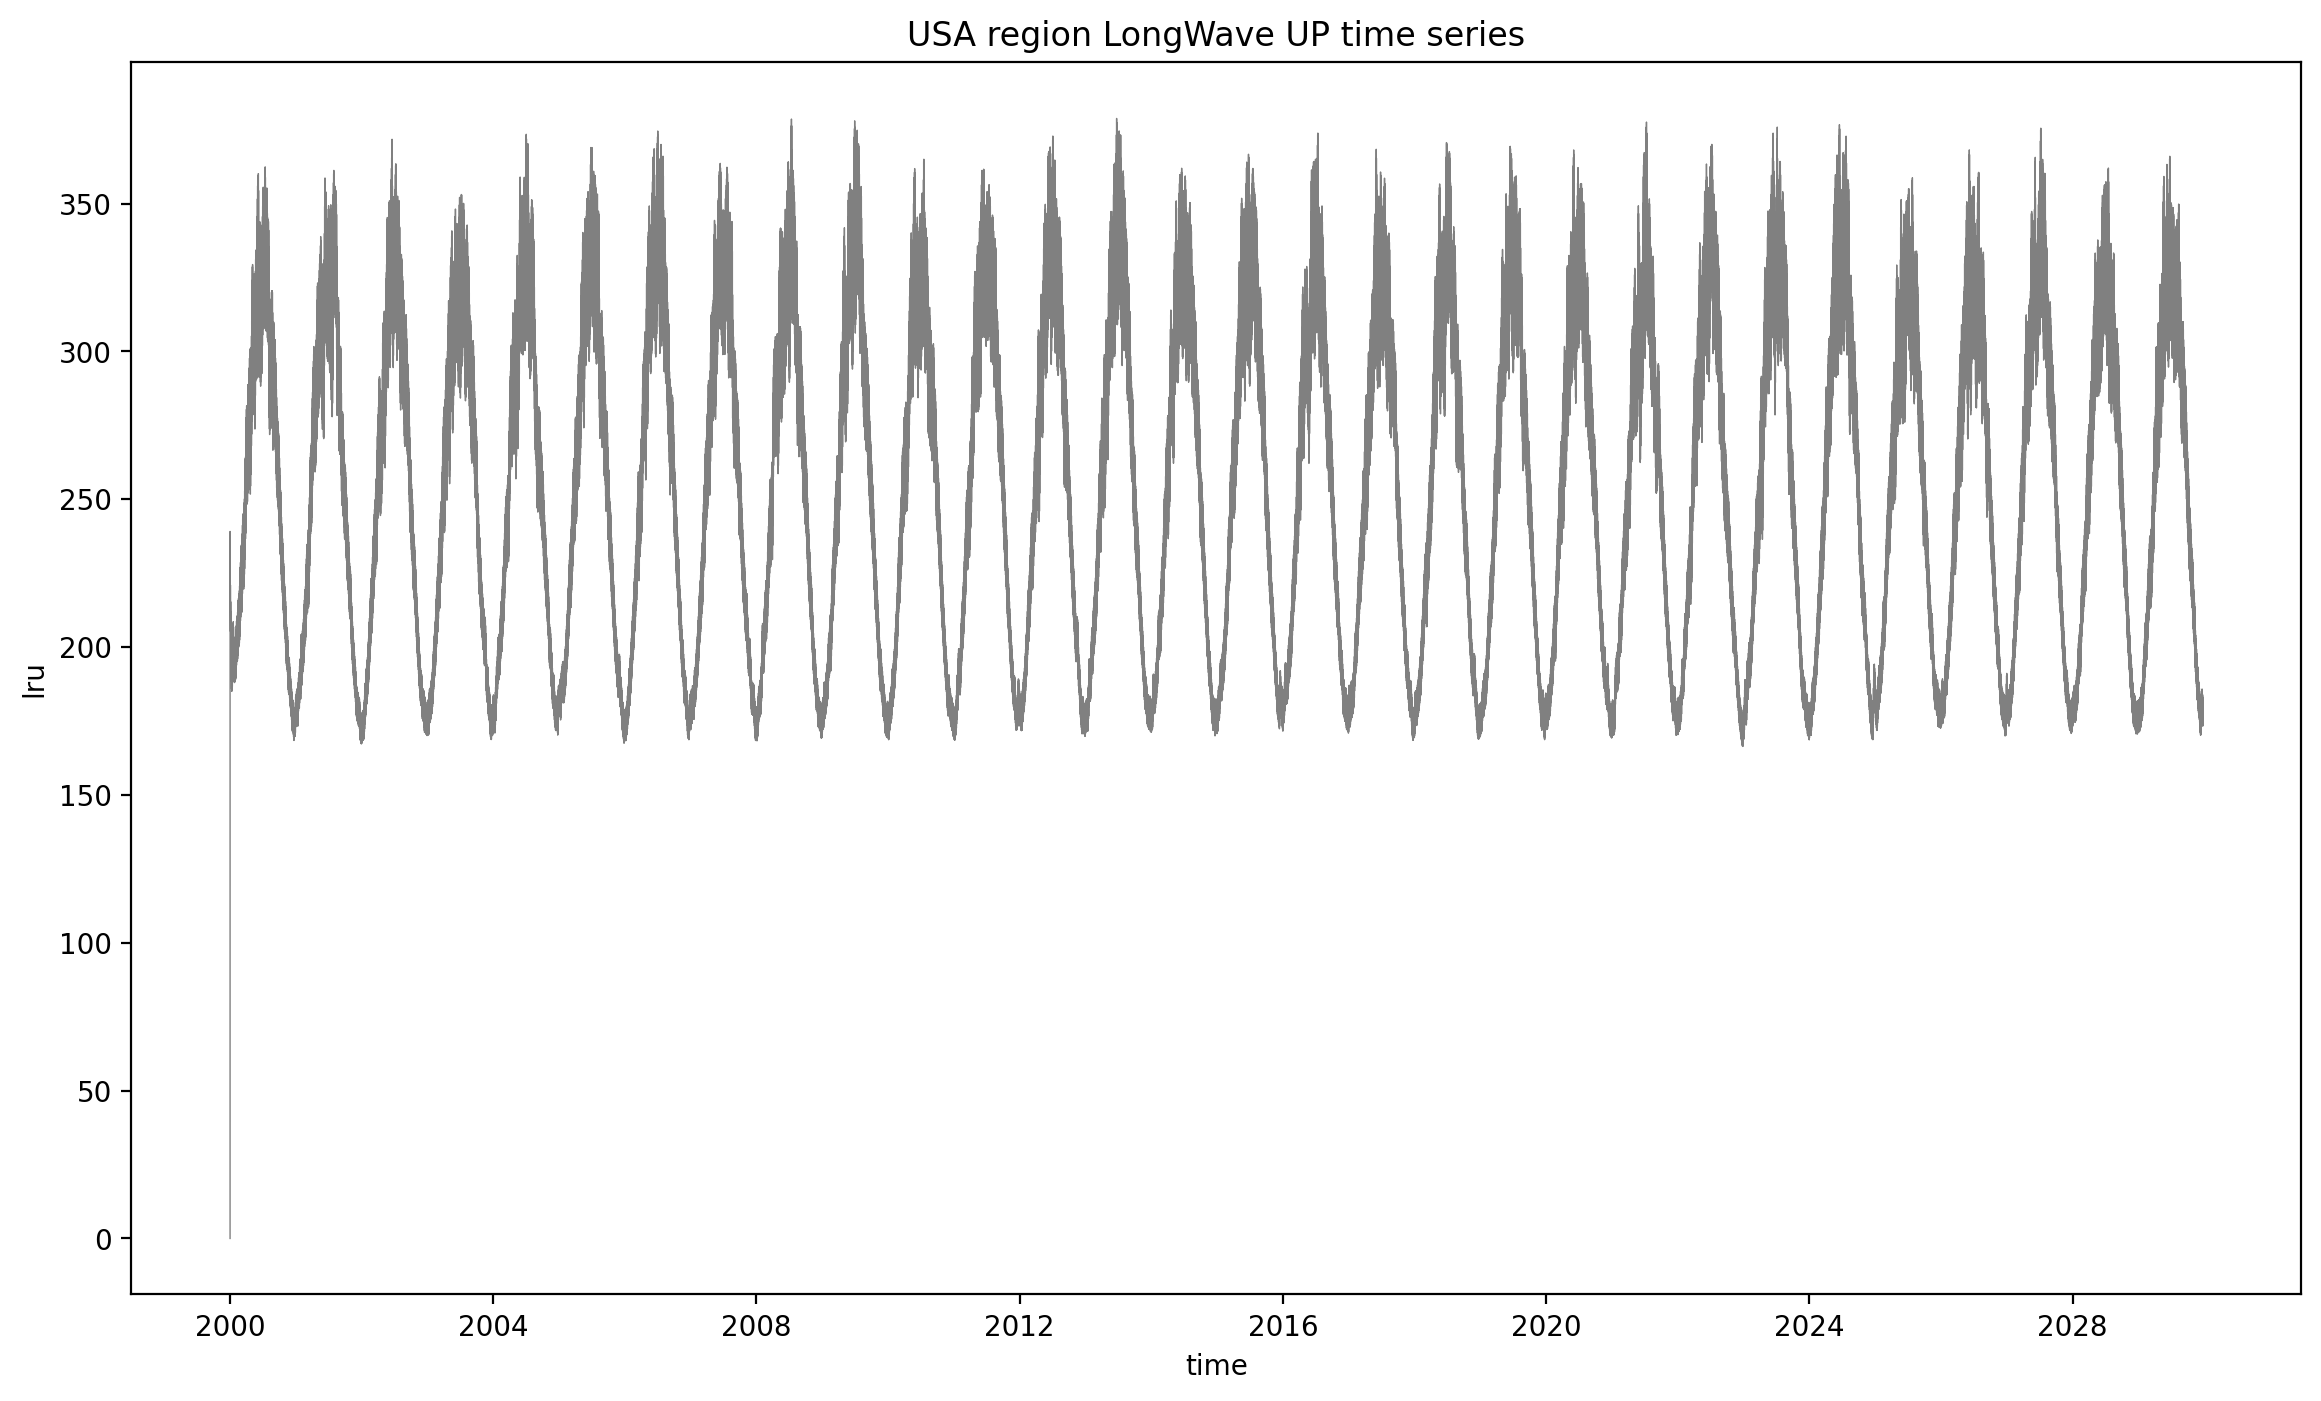

In [16]:
#plot the means
fig=plt.figure(figsize=(14,8))
USA_region_mean.lru.plot(linewidth=0.5, color='grey')
plt.title("USA region LongWave UP time series")
#show plot
plt.show()
fig.savefig("LRU_run_USA_"+runn+".png")

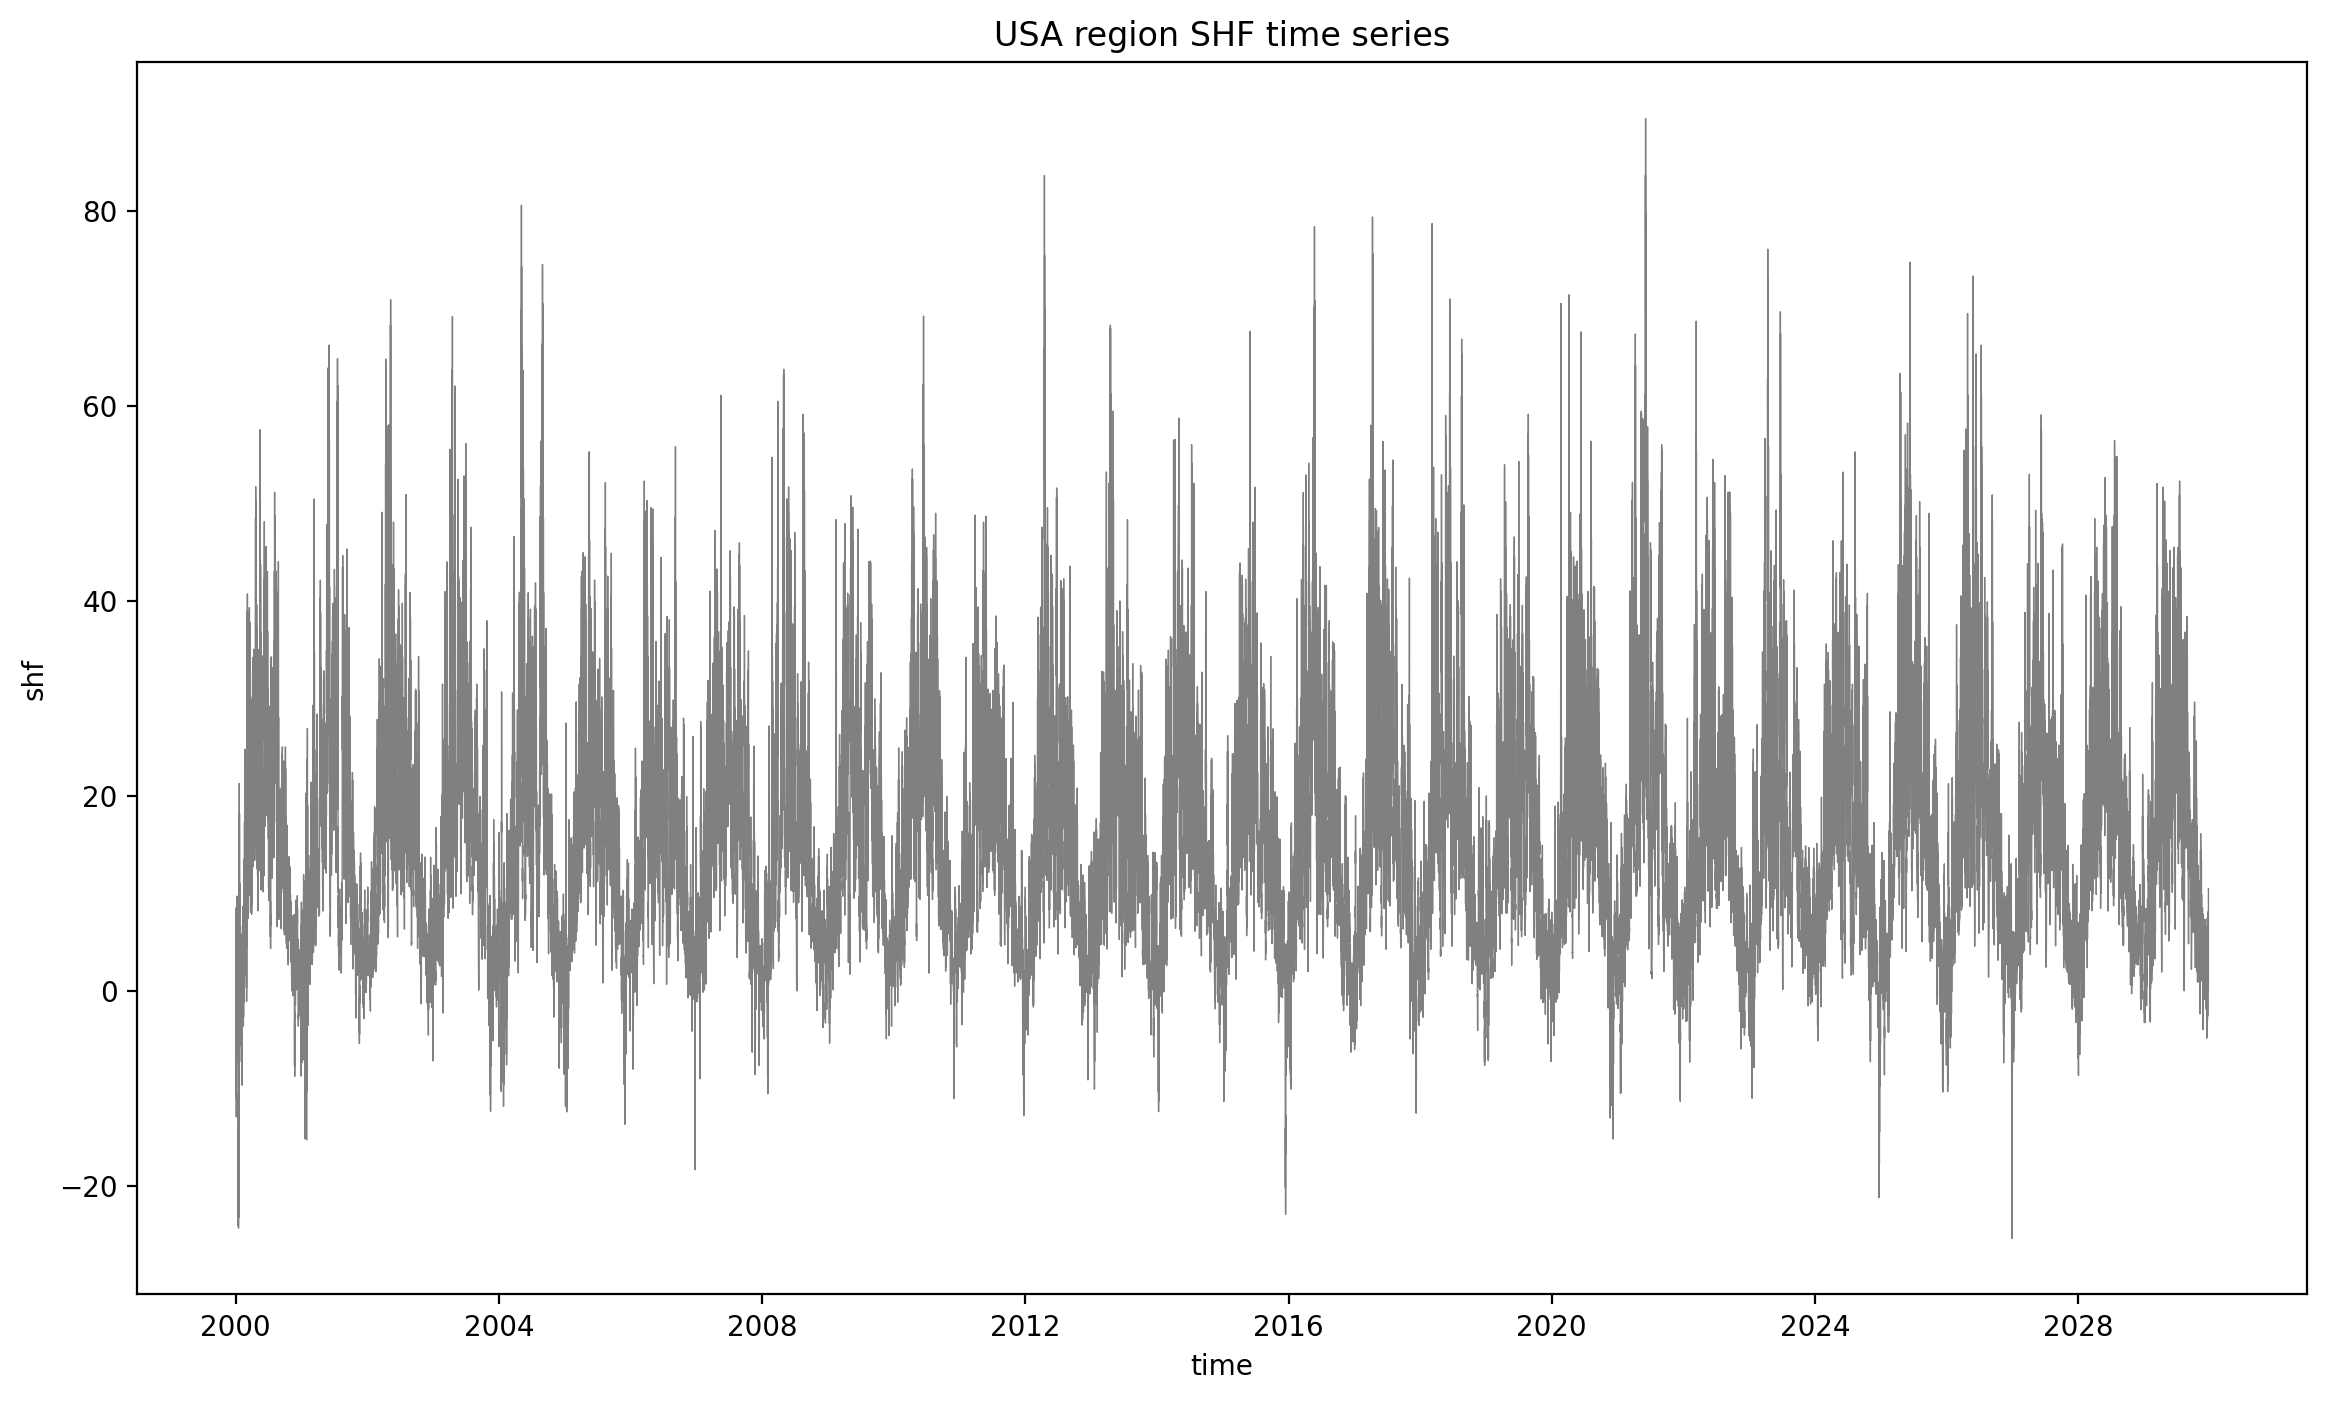

In [17]:
#plot the means
fig=plt.figure(figsize=(14,8))
USA_region_mean.shf.plot(linewidth=0.5, color='grey')
plt.title("USA region SHF time series")
#show plot
plt.show()
fig.savefig("SHF_run_USA_"+runn+".png")

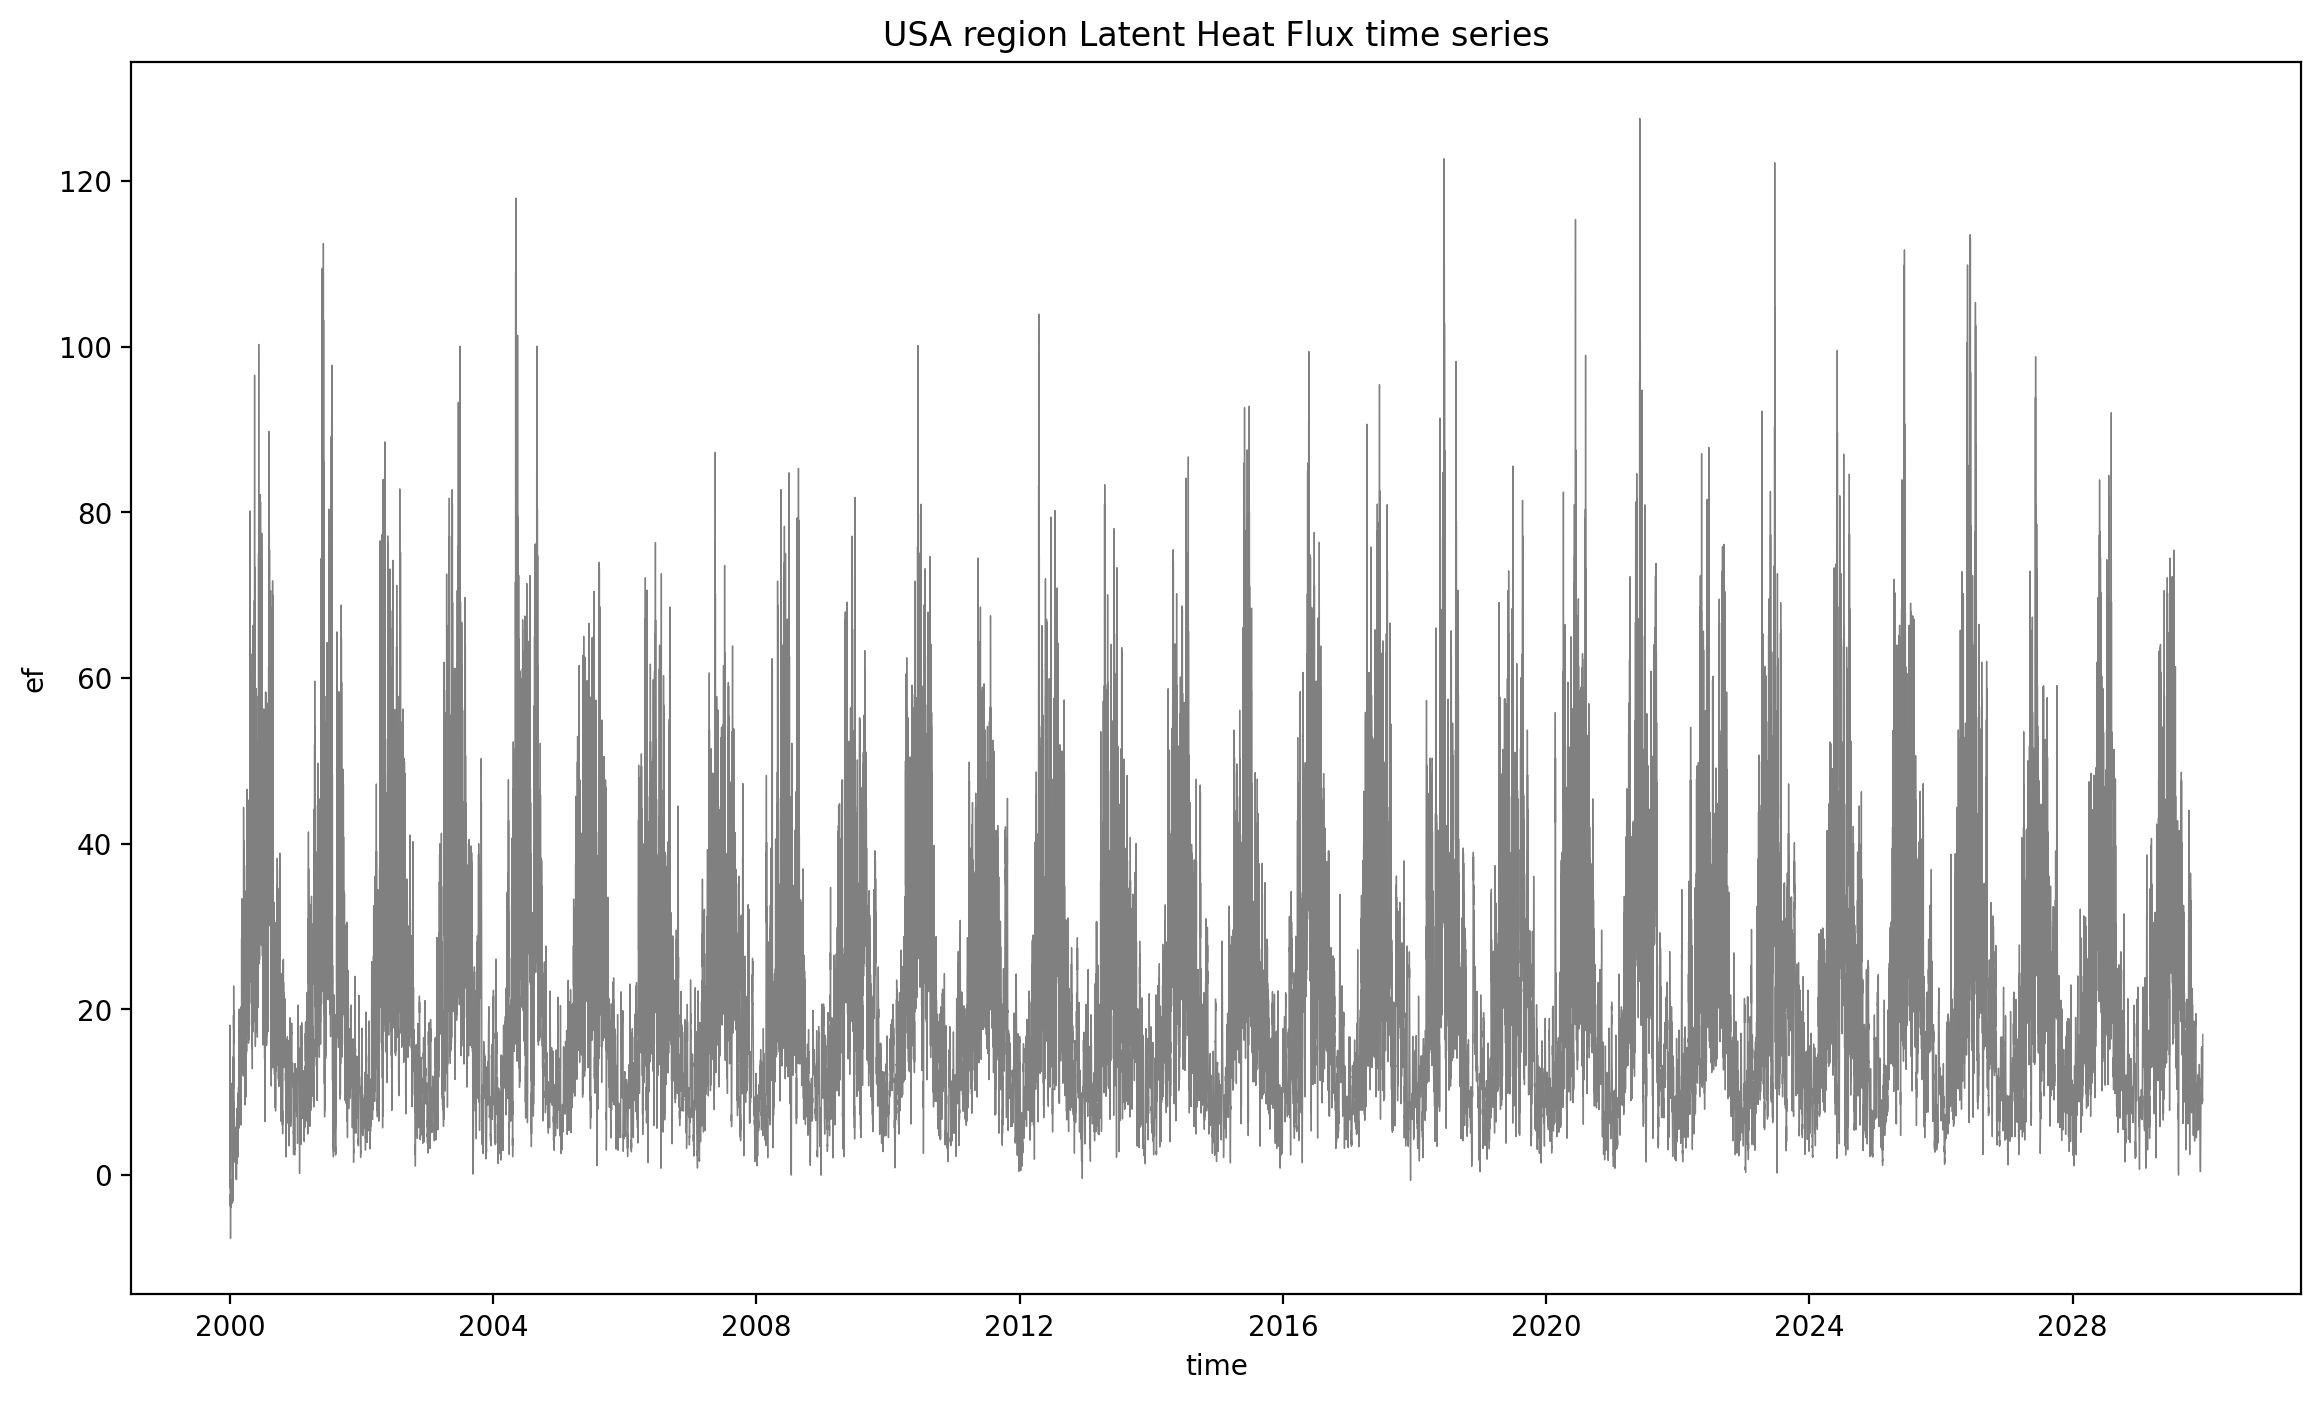

In [18]:
#plot the means
fig=plt.figure(figsize=(14,8))
lhf=2.5E6*USA_region_mean.ef
lhf.plot(linewidth=0.5, color='grey')
plt.title("USA region Latent Heat Flux time series")
#show plot
plt.show()
fig.savefig("LHF_run_USA_"+runn+".png")

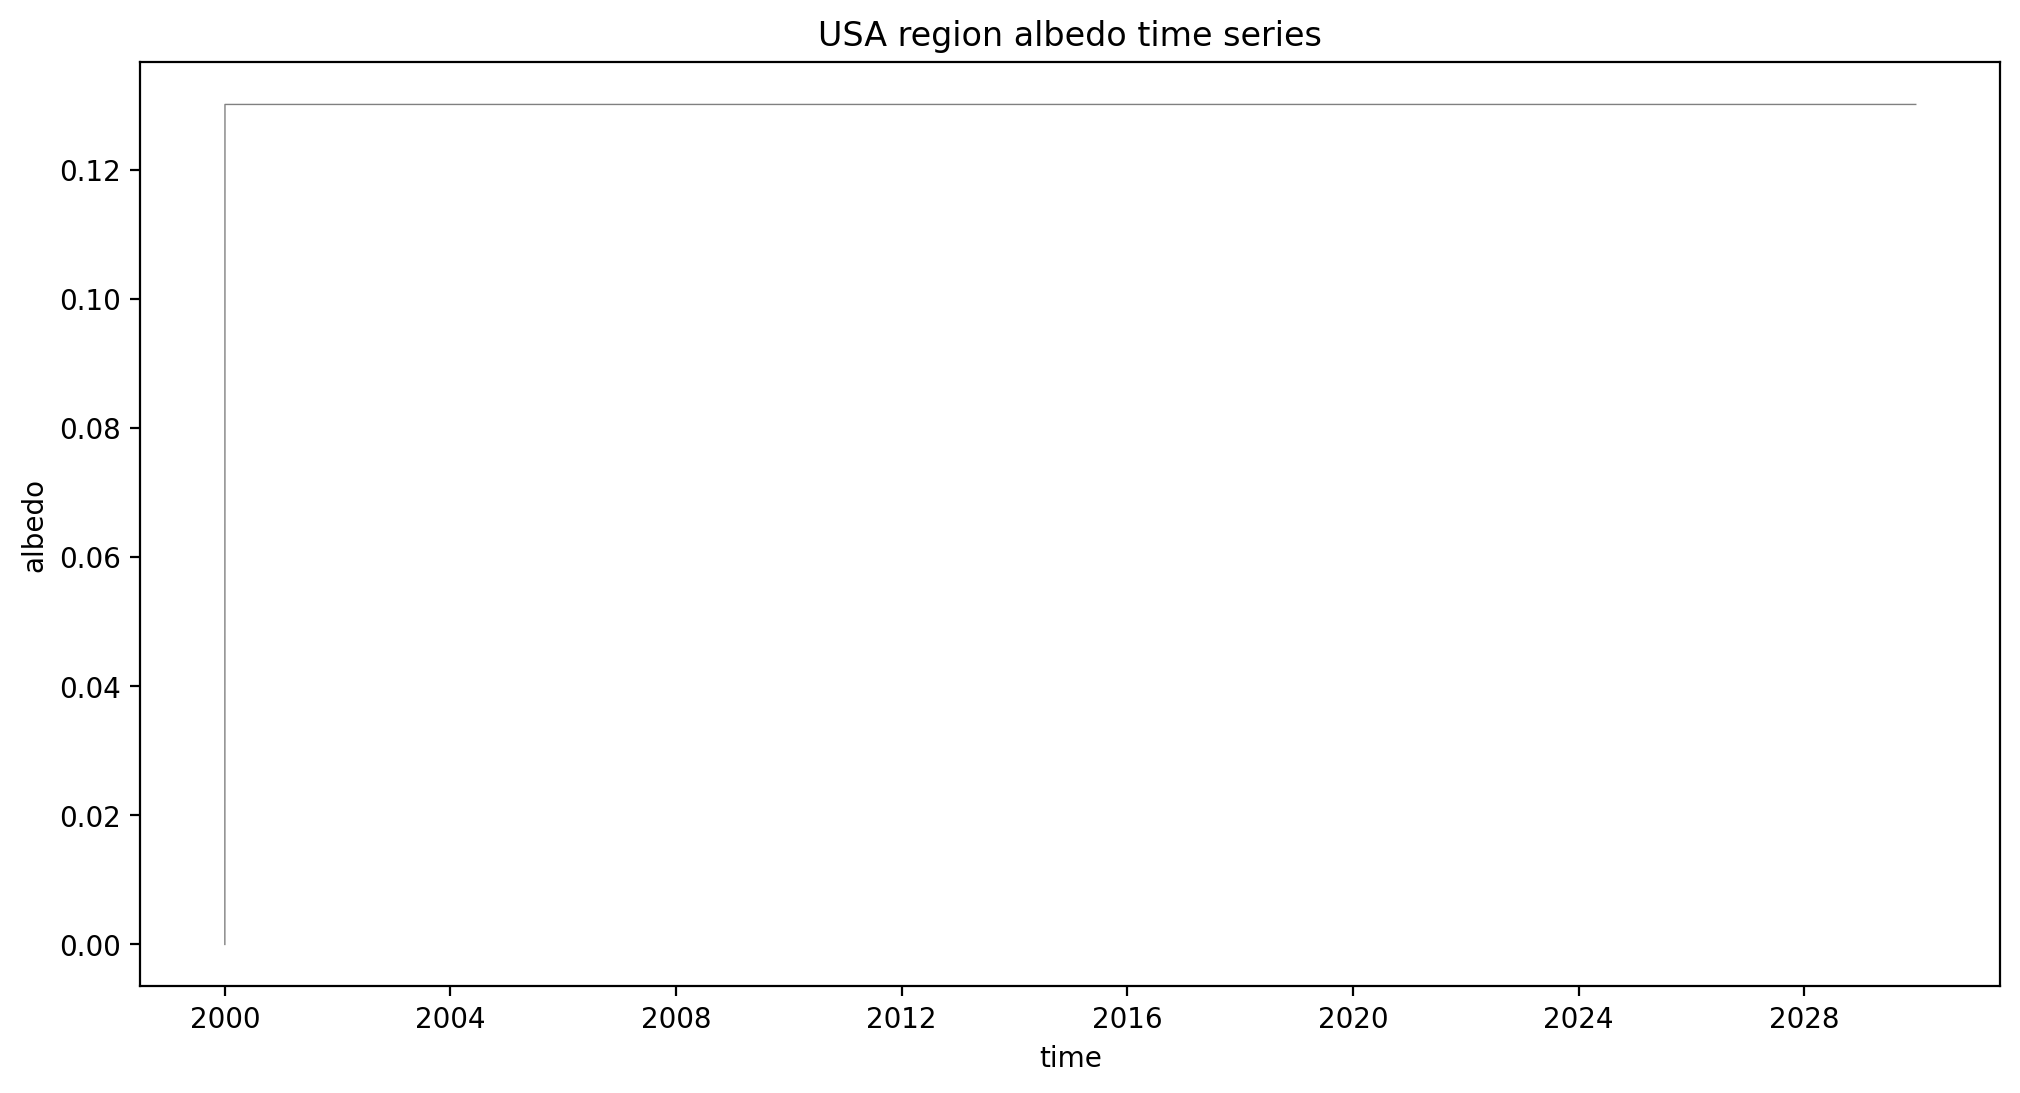

In [19]:
#plot the means
USA_region_mean.albedo.plot(linewidth=0.5, color='grey')
plt.title("USA region albedo time series")
#show plot
plt.show()

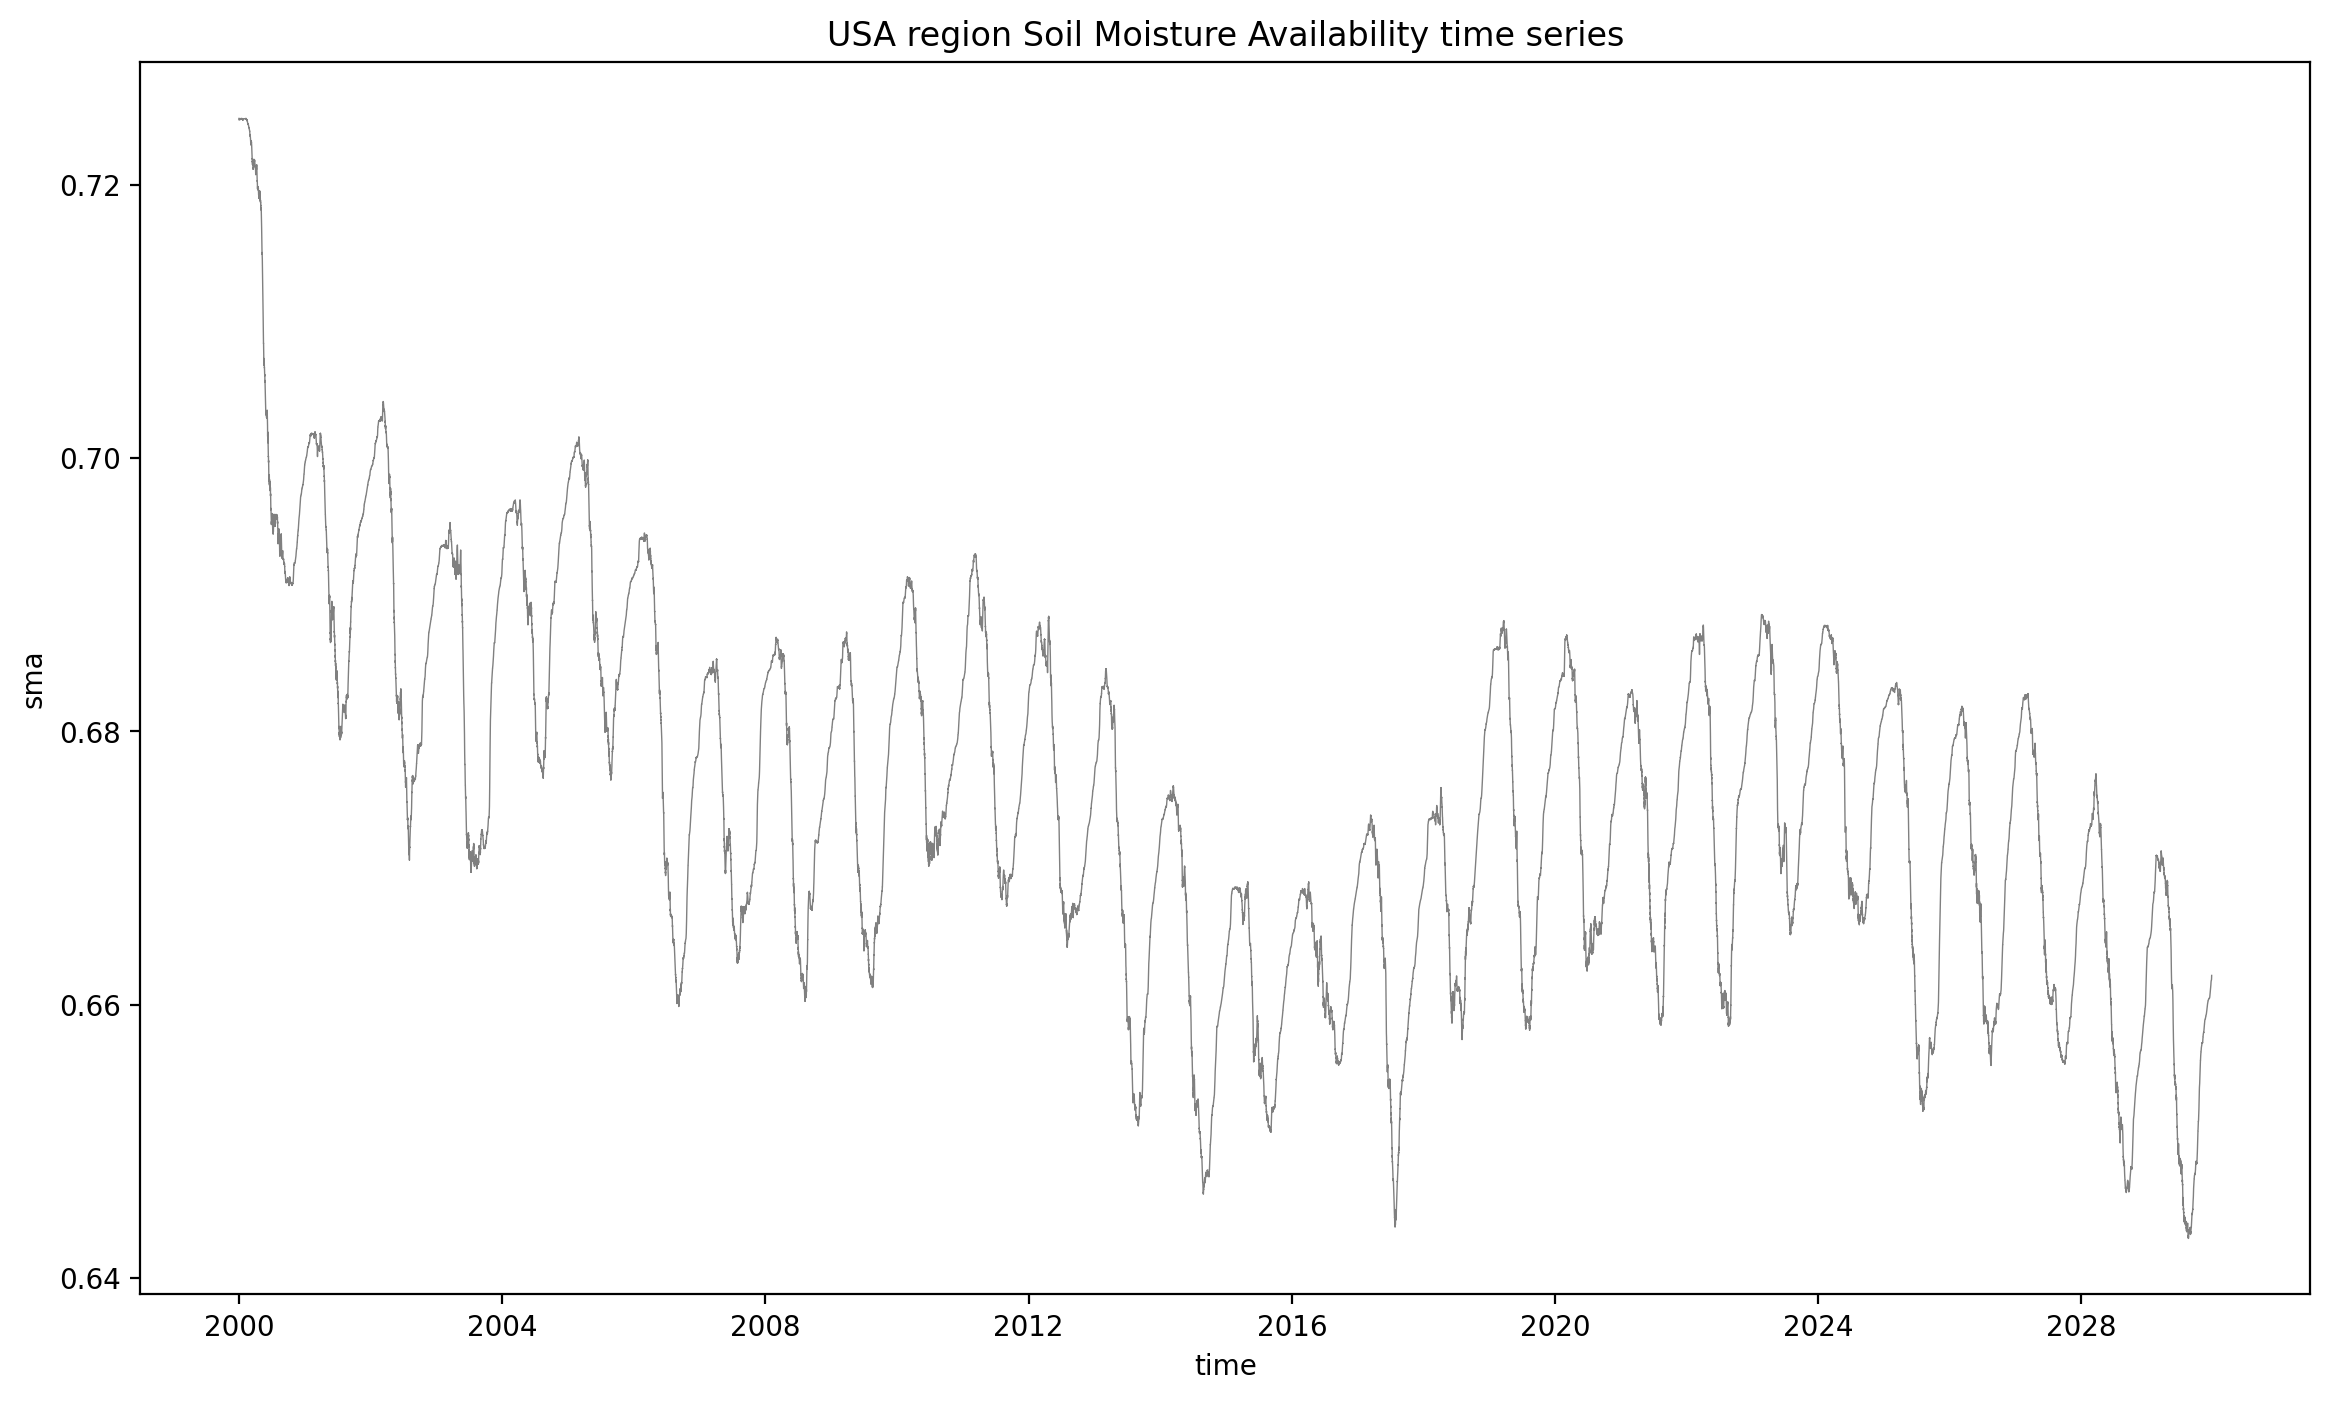

In [20]:
fig=plt.figure(figsize=(14,8))
USA_region_mean.sma.plot(linewidth=0.5, color='grey')
plt.title("USA region Soil Moisture Availability time series")
#show plot
plt.show()
fig.savefig("SMA_run_USA_"+runn+".png")

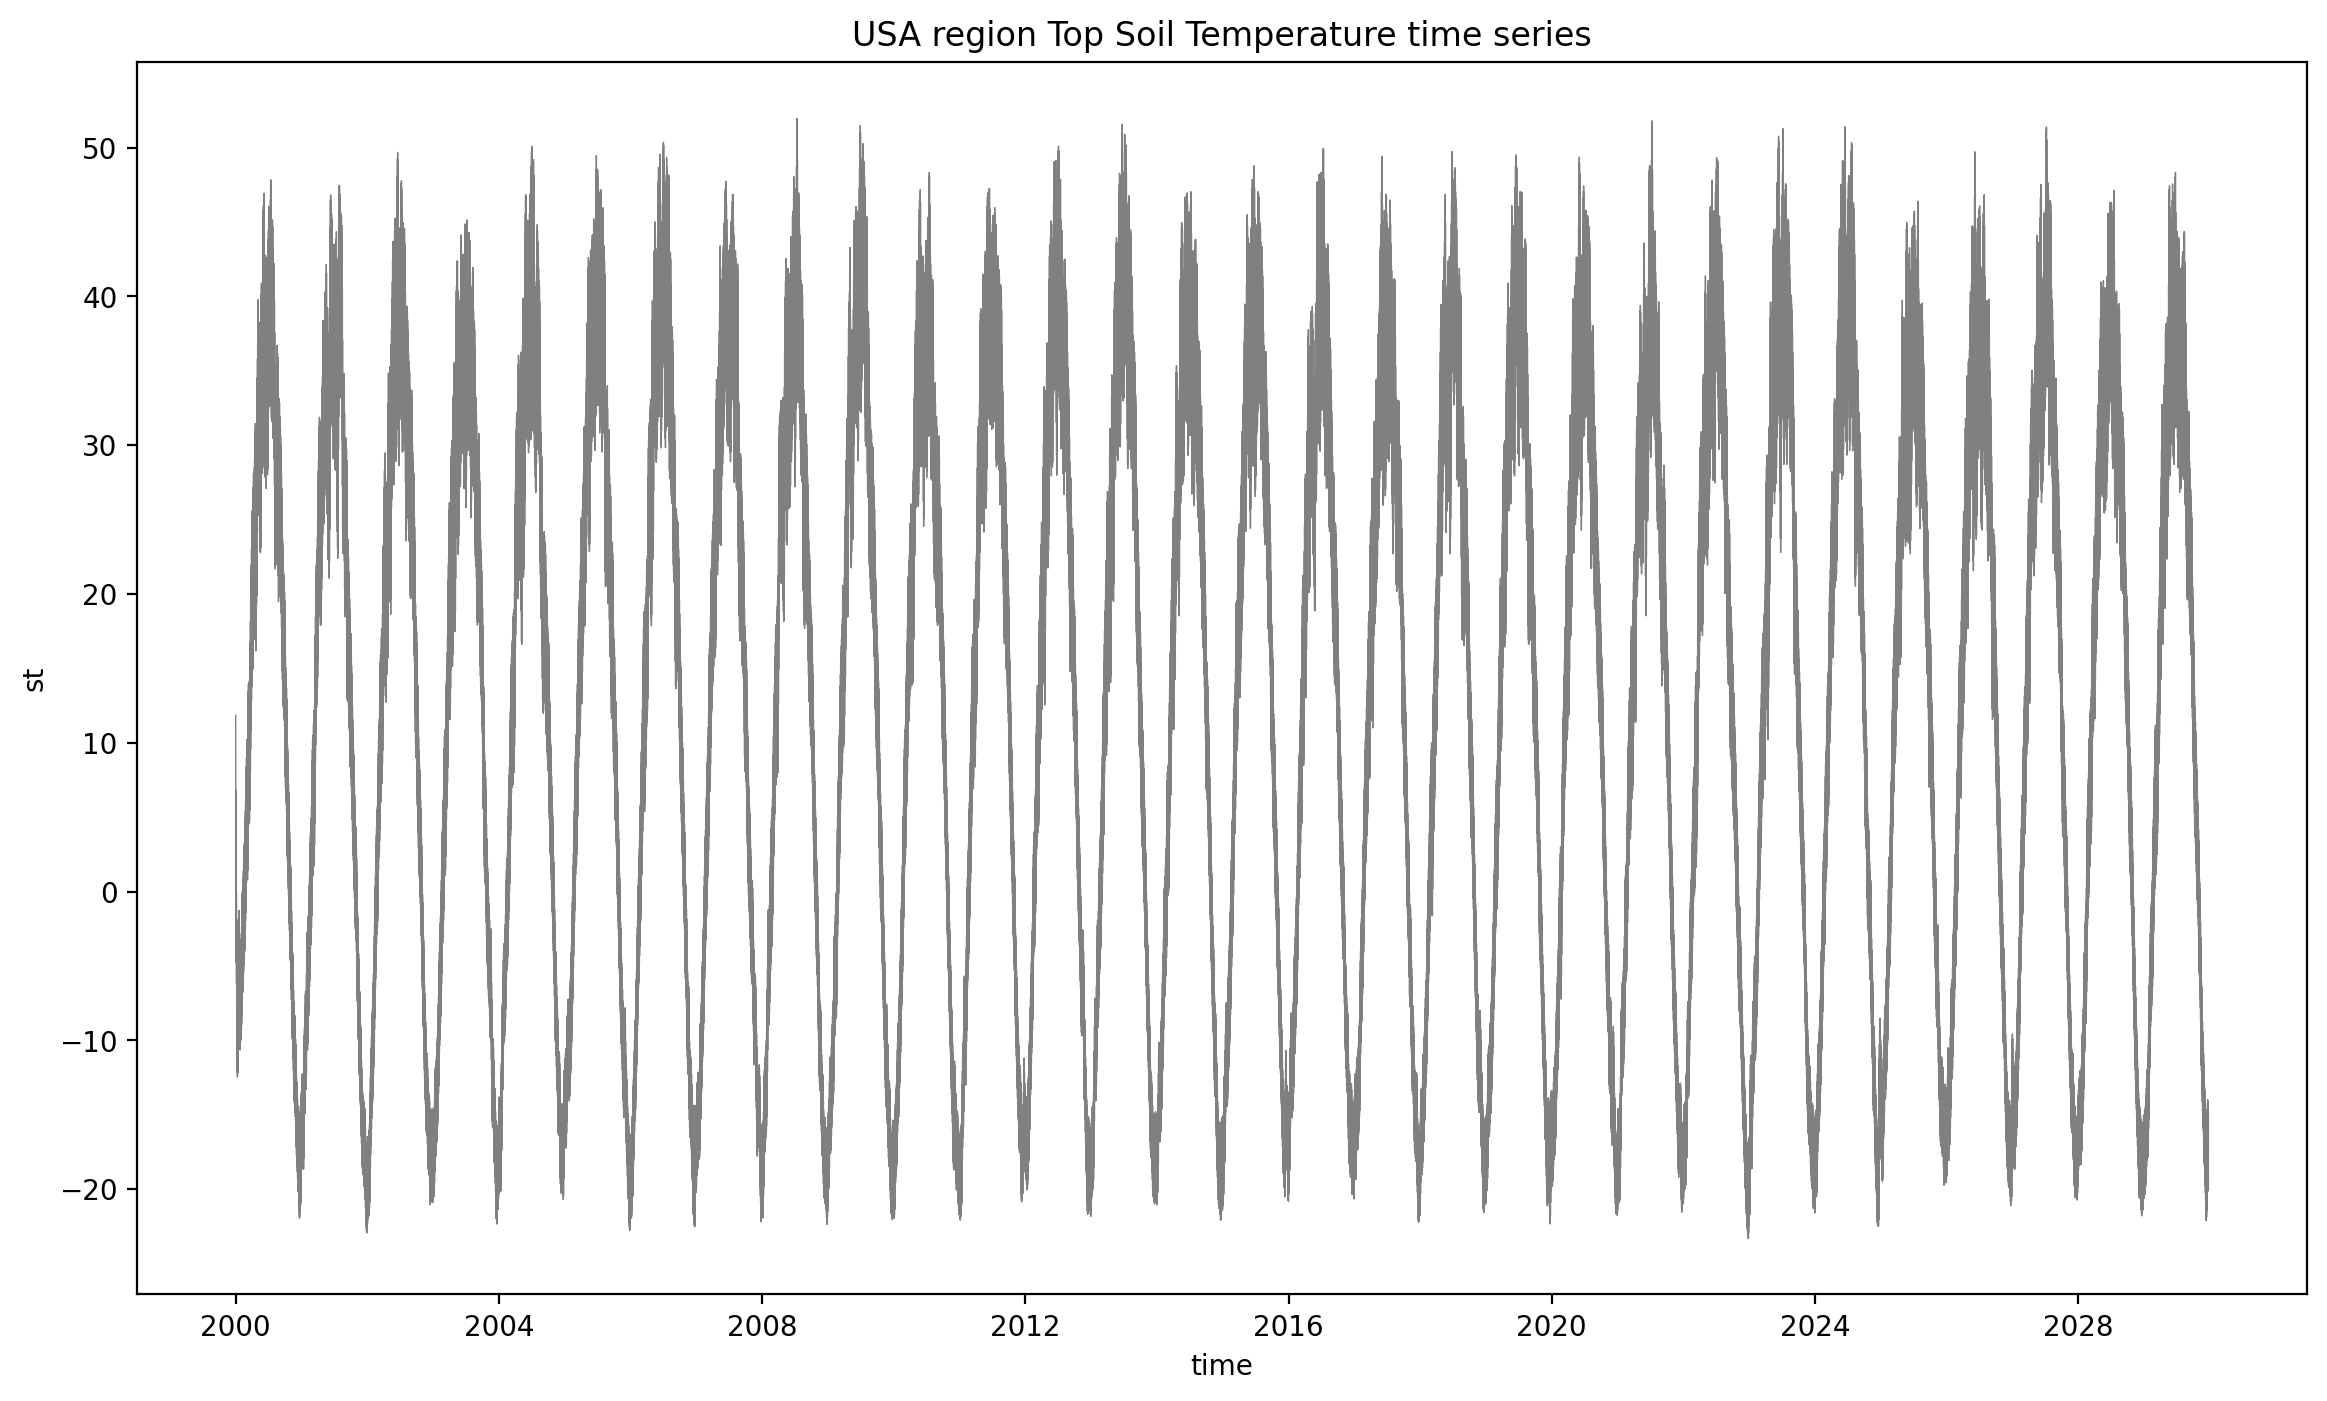

In [21]:
fig=plt.figure(figsize=(14,8))
st1=USA_region_mean.st[:,0]
st1.plot(linewidth=0.5, color='grey')
plt.title("USA region Top Soil Temperature time series")
#show plot
plt.show()
fig.savefig("ST1_run_USA_"+runn+".png")

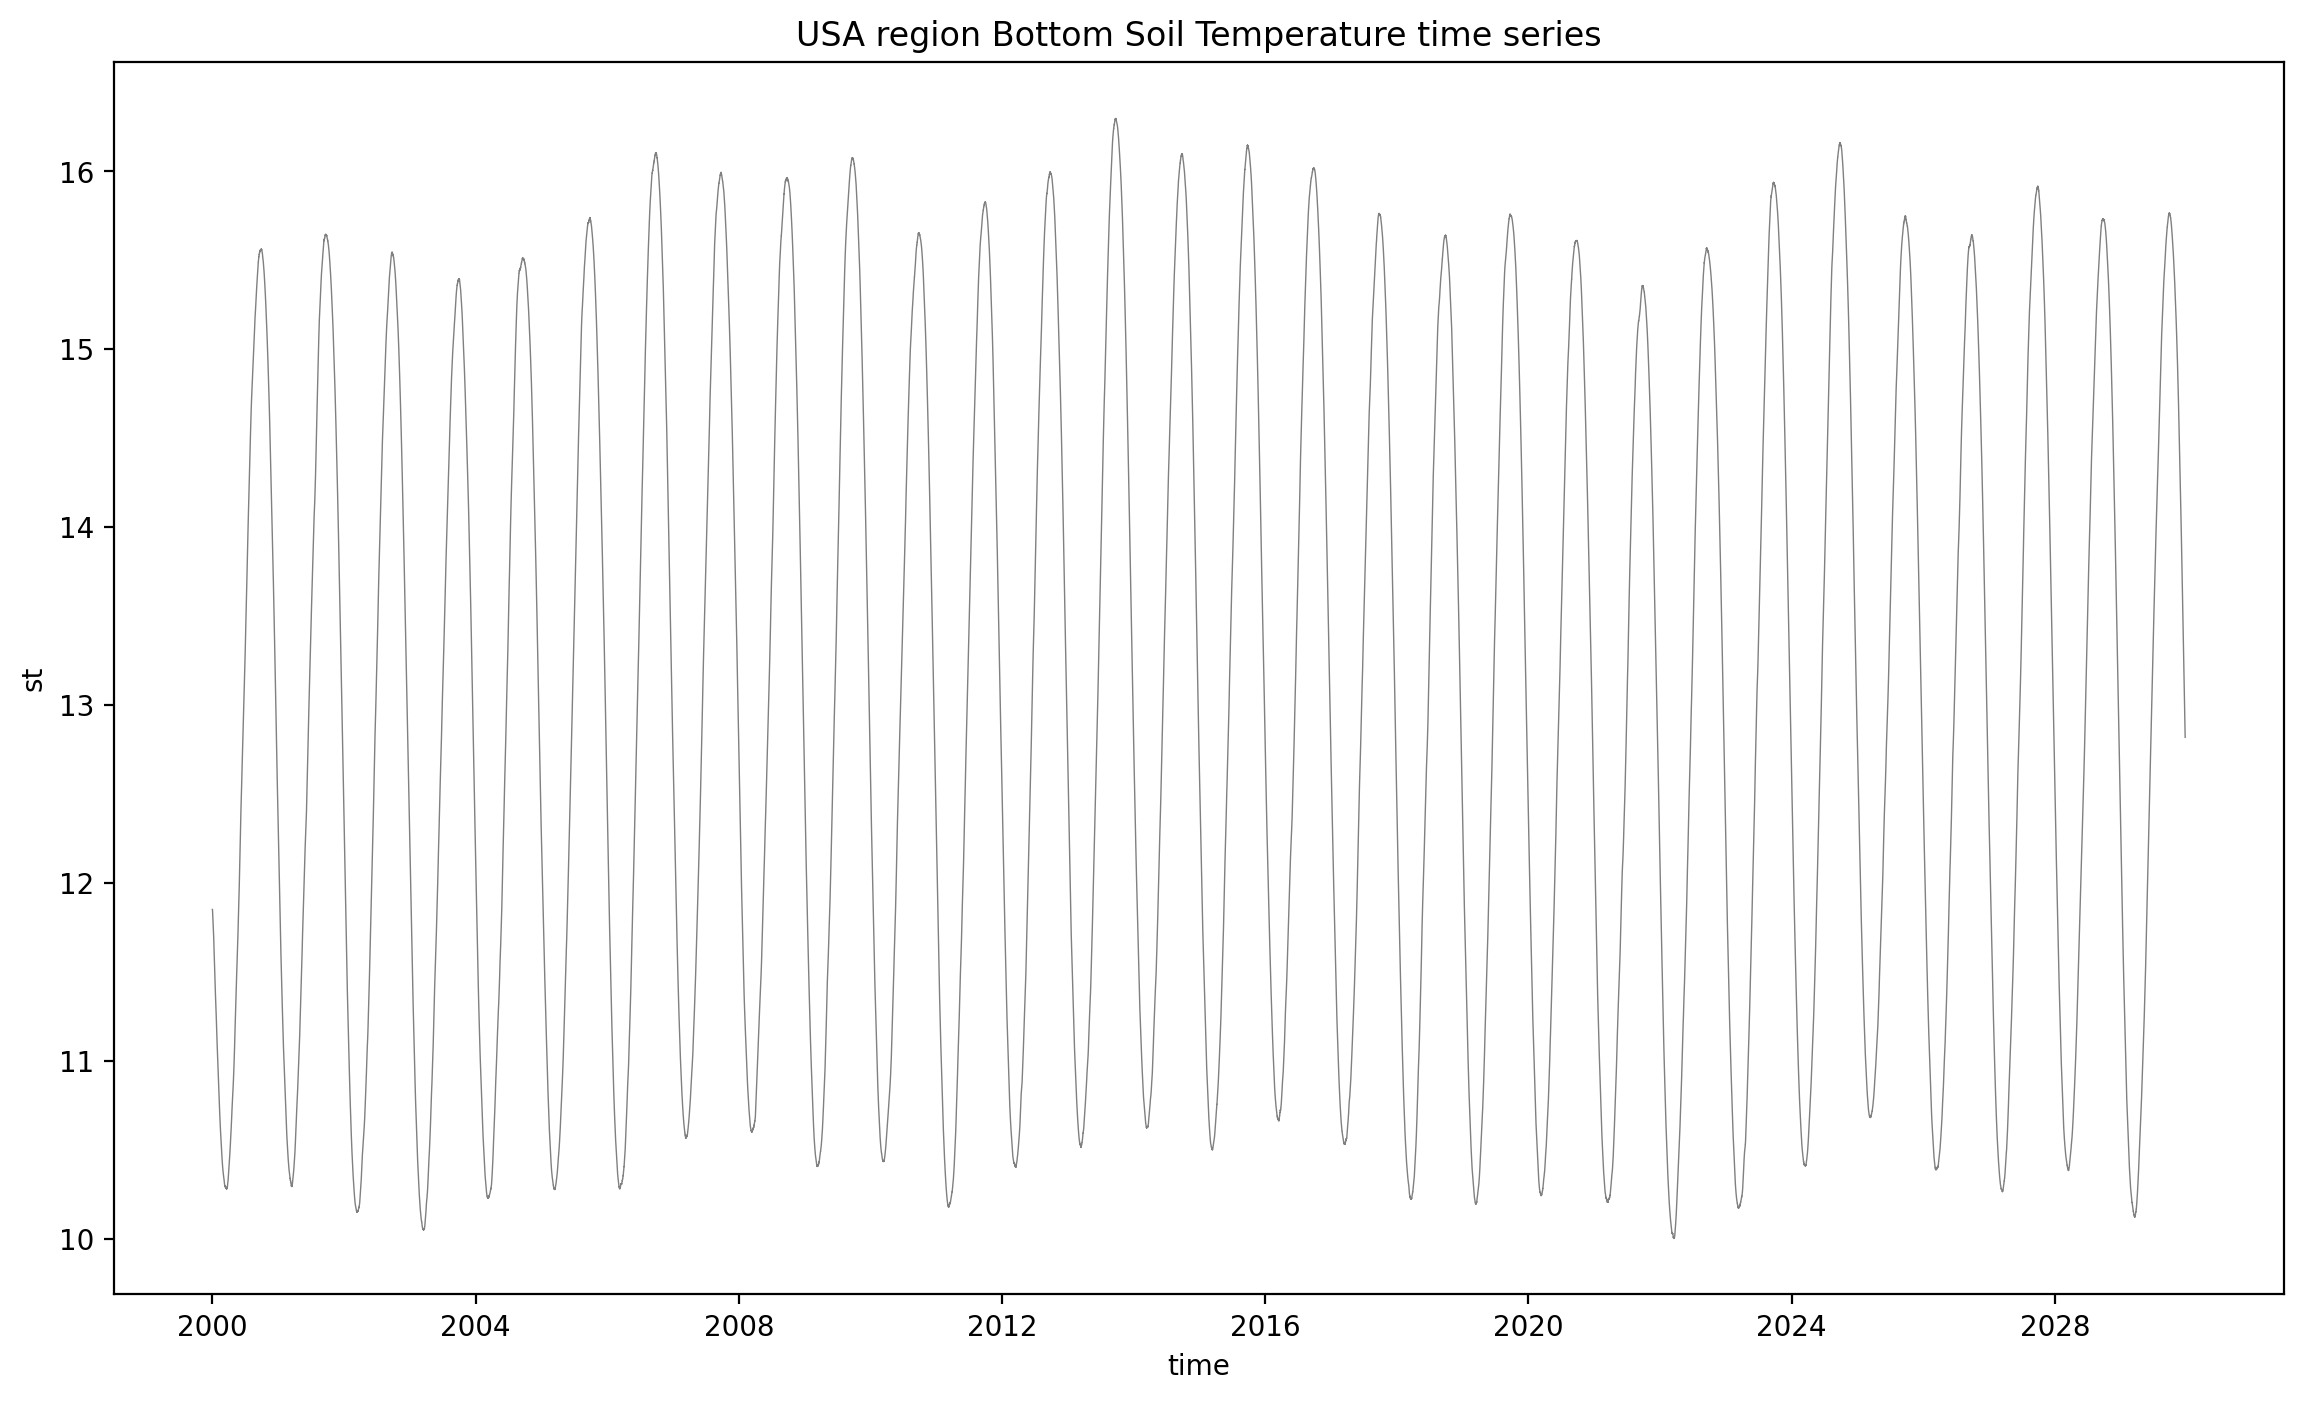

In [22]:
fig=plt.figure(figsize=(14,8))
st2=USA_region_mean.st[:,1]
st2.plot(linewidth=0.5, color='grey')
plt.title("USA region Bottom Soil Temperature time series")
#show plot
plt.show()
fig.savefig("ST2_run_USA_"+runn+".png")

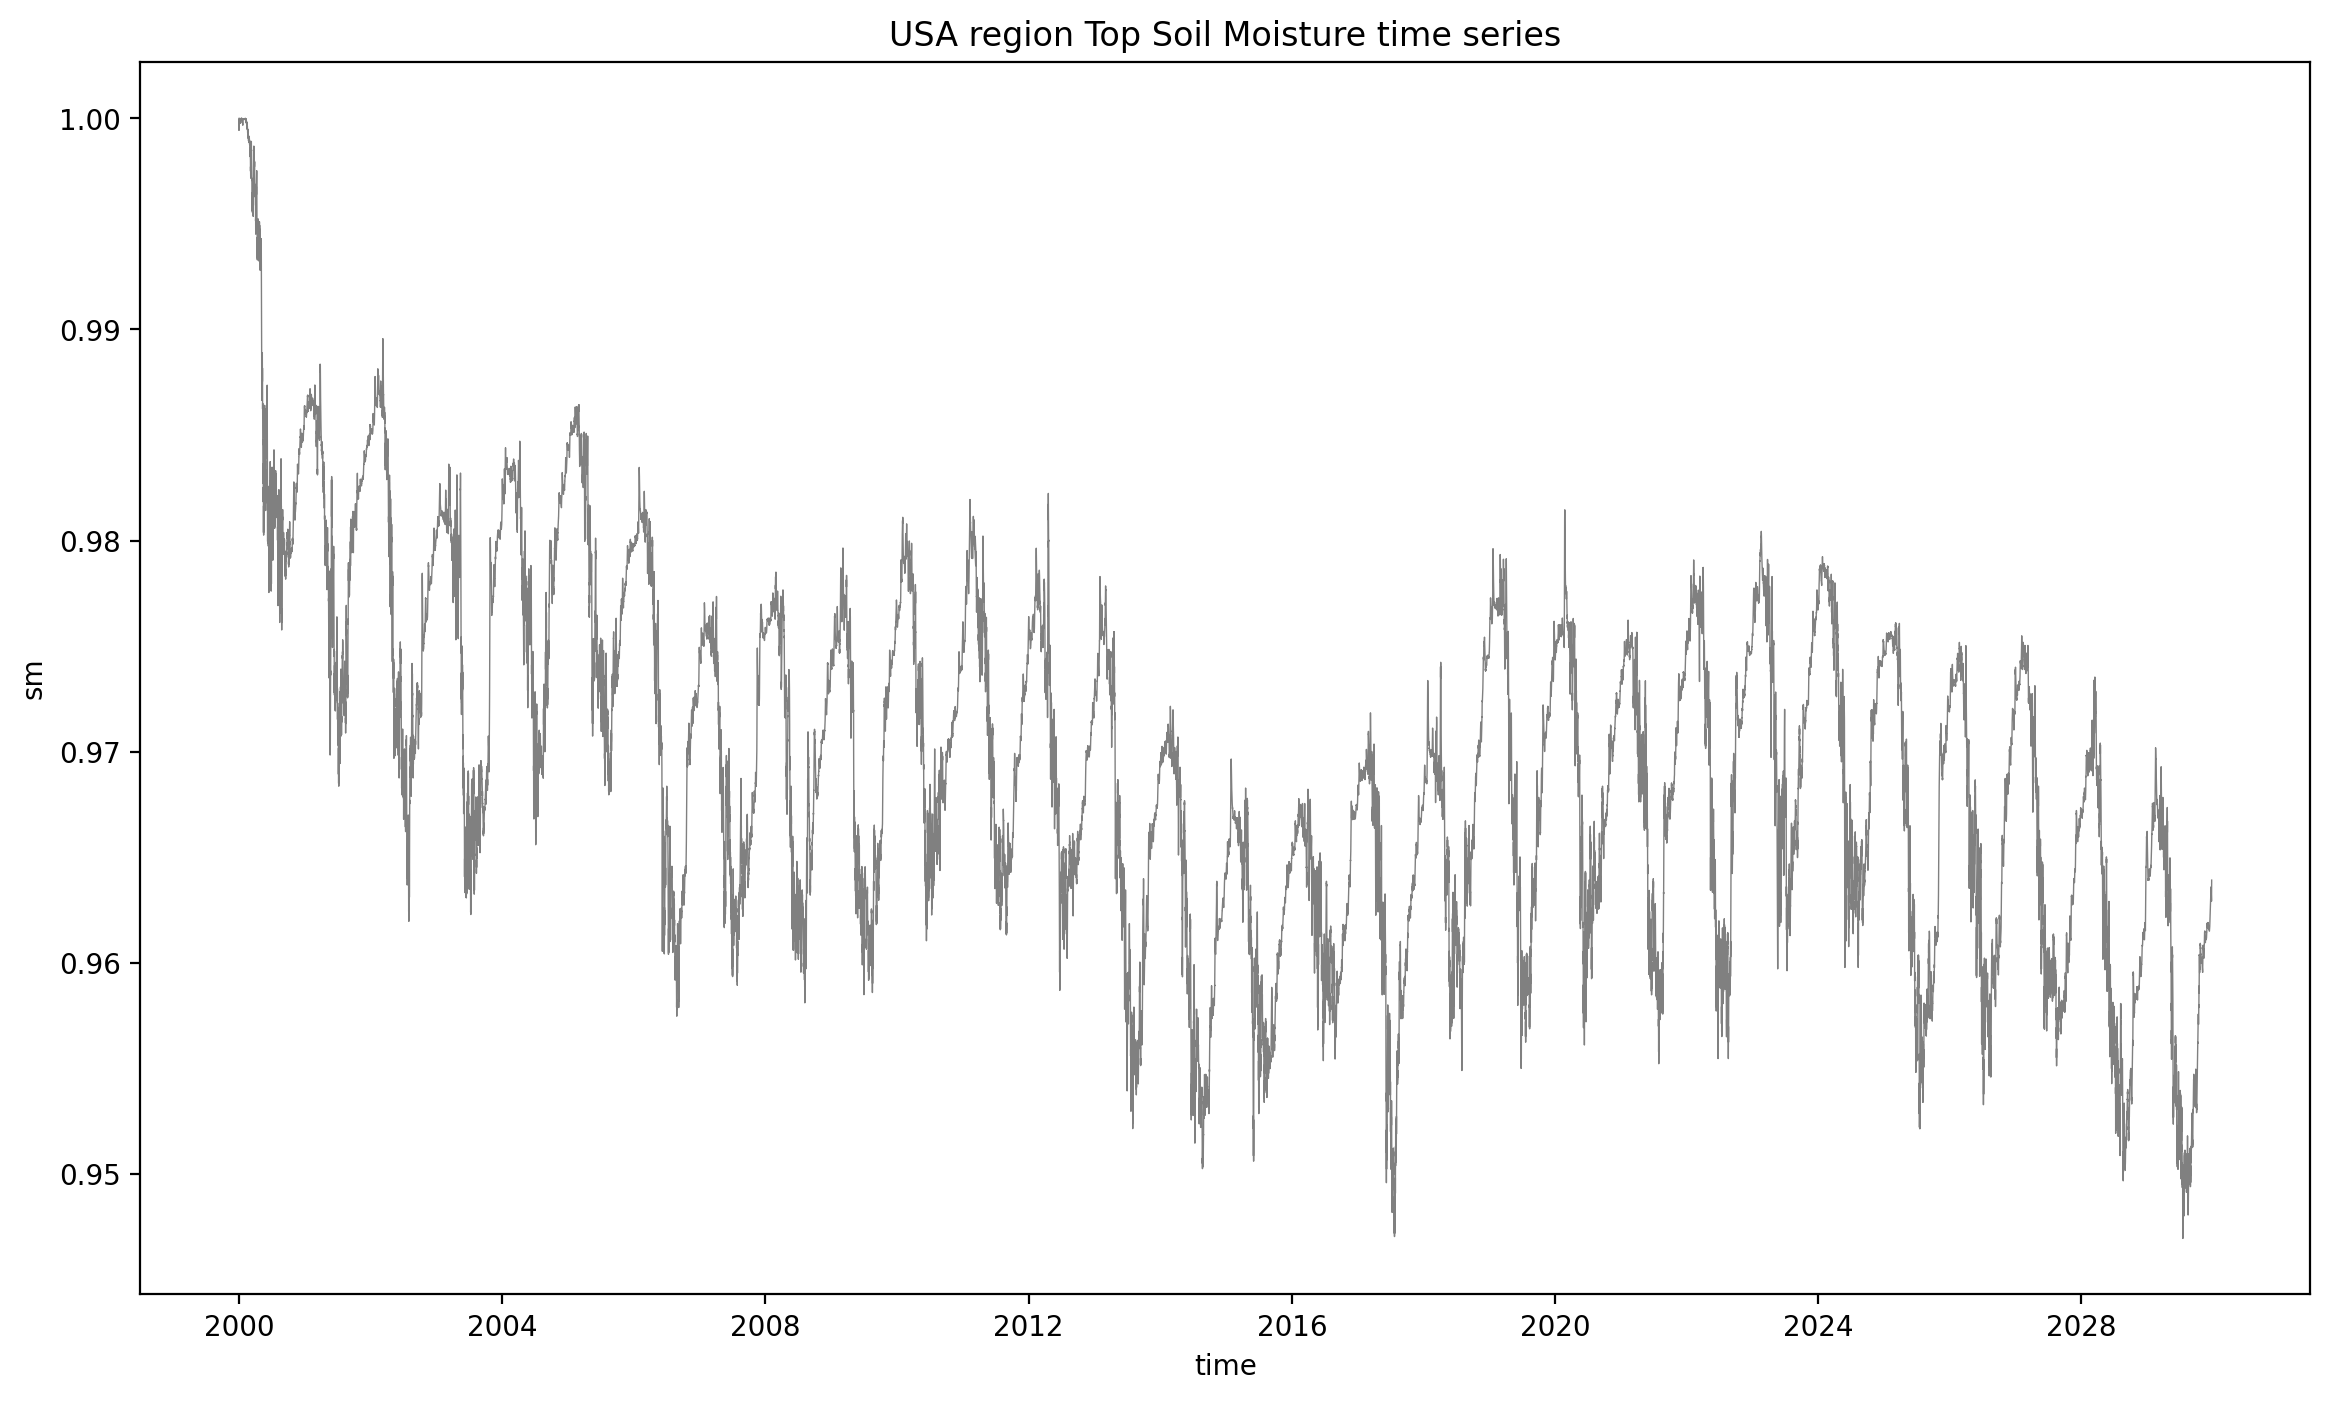

In [23]:
fig=plt.figure(figsize=(14,8))
sm1=USA_region_mean.sm[:,0]
sm1.plot(linewidth=0.5, color='grey')
plt.title("USA region Top Soil Moisture time series")
#show plot
plt.show()
fig.savefig("SM1_run_USA_"+runn+".png")

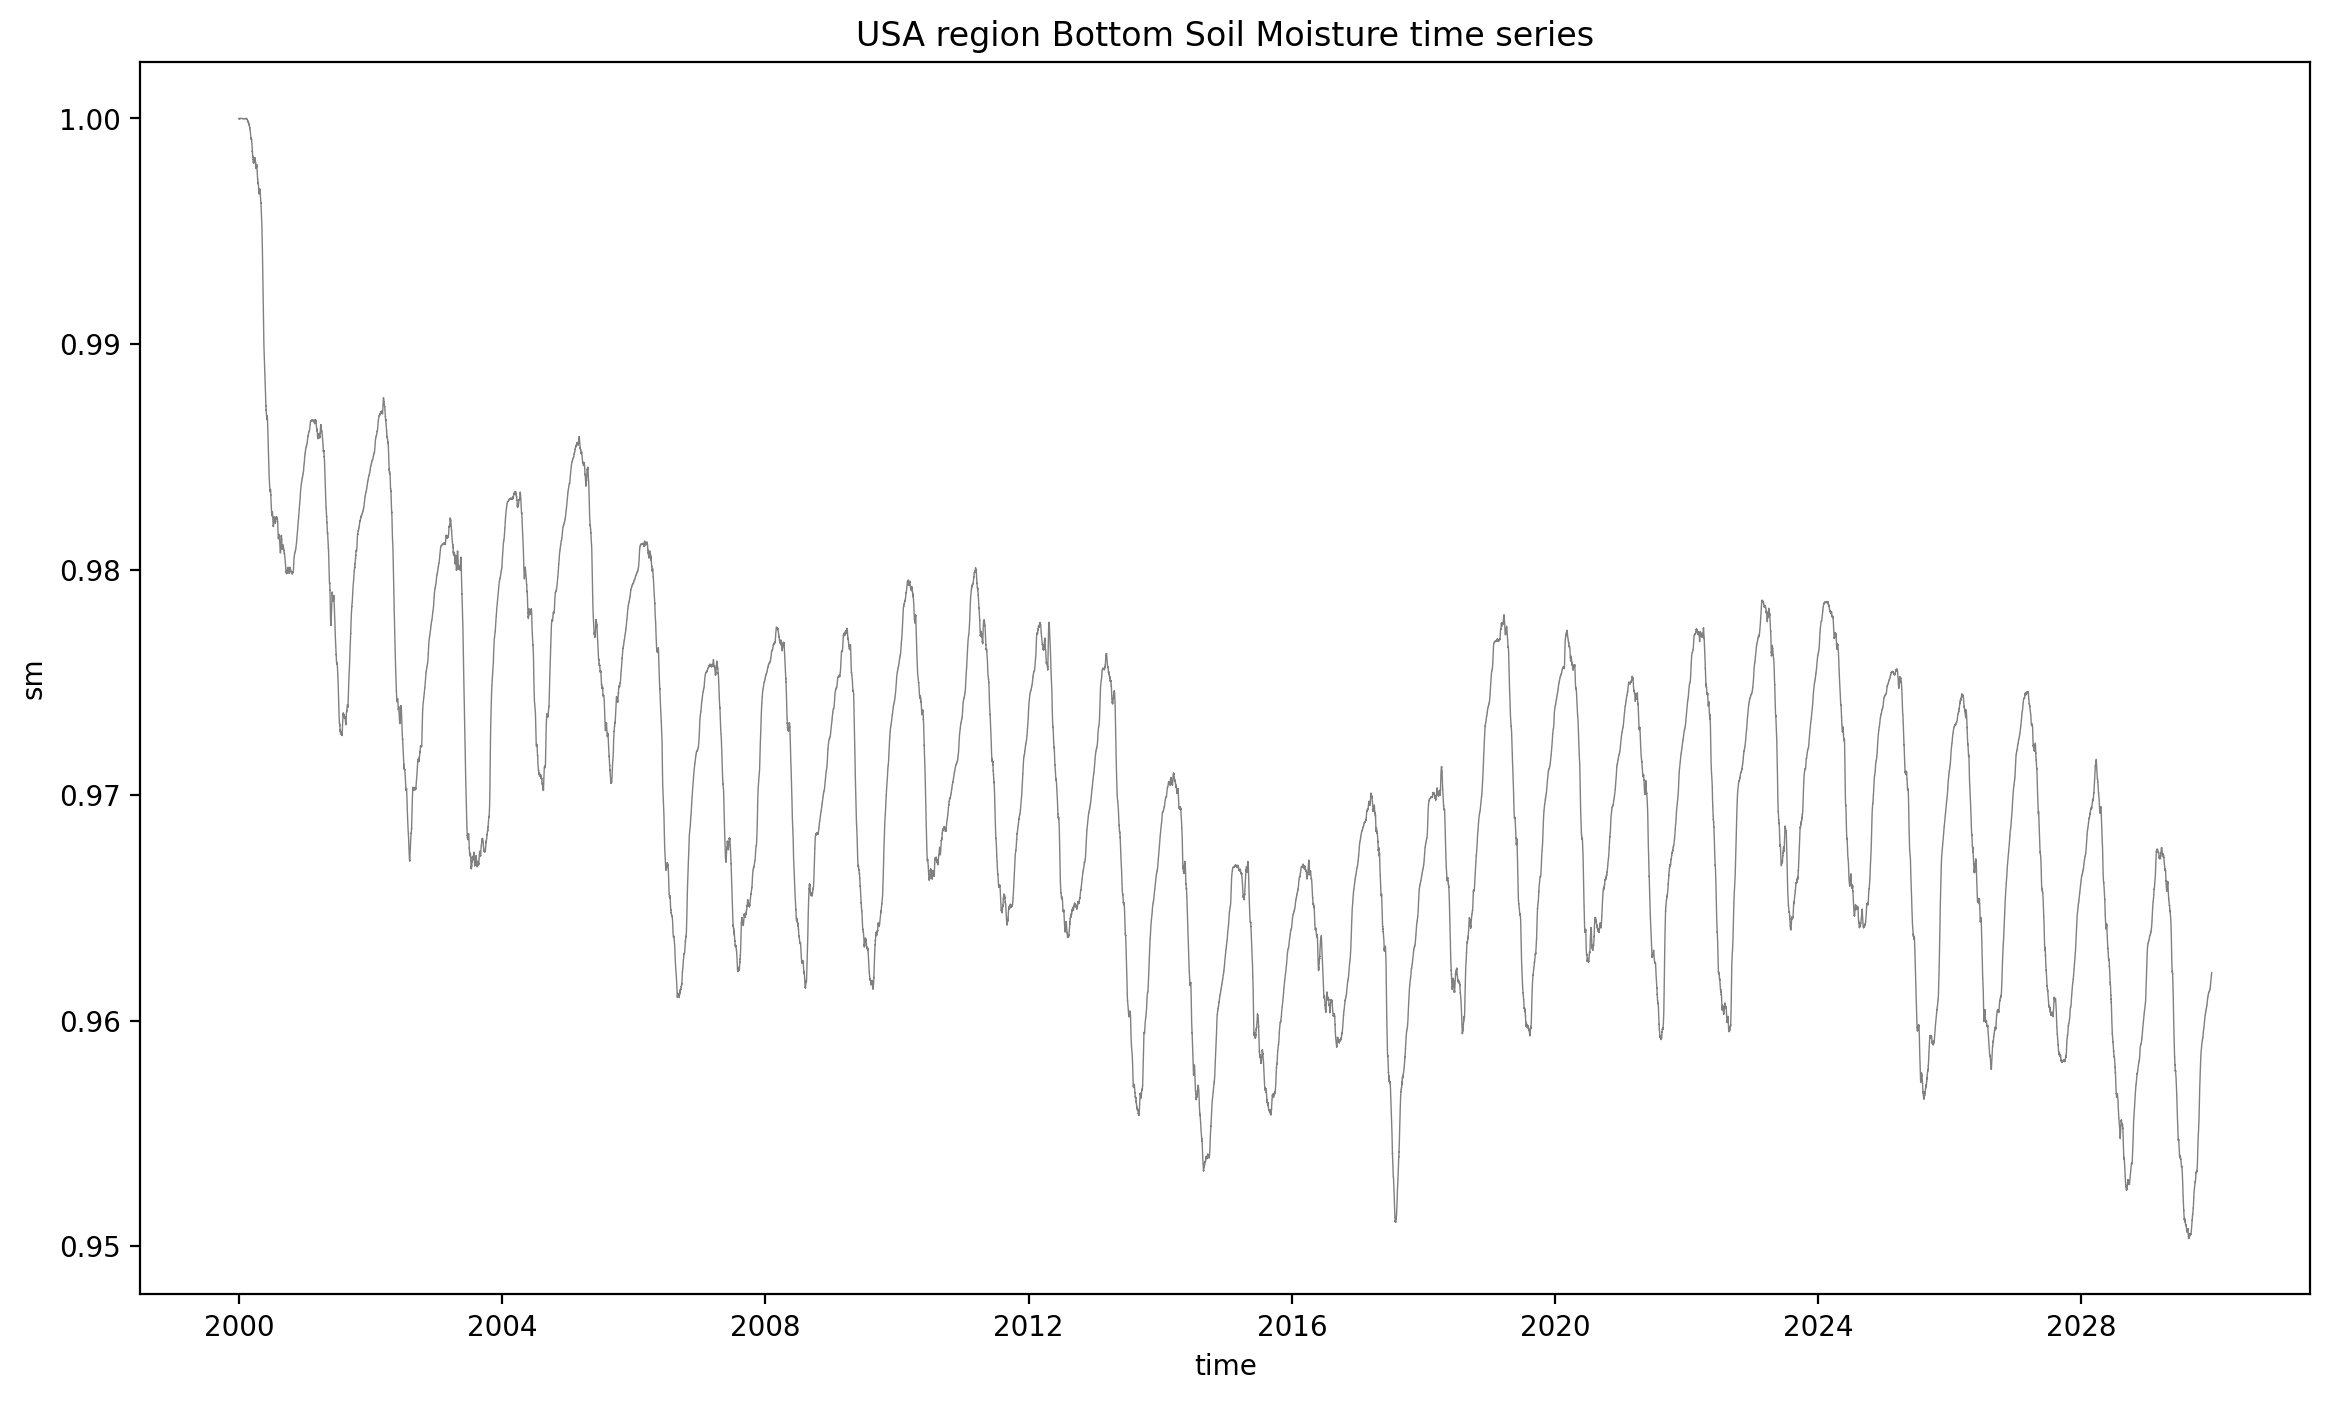

In [24]:
fig=plt.figure(figsize=(14,8))
sm2=USA_region_mean.sm[:,1]
sm2.plot(linewidth=0.5, color='grey')
plt.title("USA region Bottom Soil Moisture time series")
#show plot
plt.show()
fig.savefig("SM2_run_USA_"+runn+".png")

In [25]:
AMAZON_region = data.sel(lon=slice(285, 315), lat=slice(10, -10))
#AMAZON_region

In [26]:
#the mean over the entire area (spatially) 
AMAZON_region_mean = AMAZON_region.mean(dim=('lat','lon'))

#the spatial and temporal mean for the entire area
AMAZON_region_mean_climate = AMAZON_region_mean.mean()

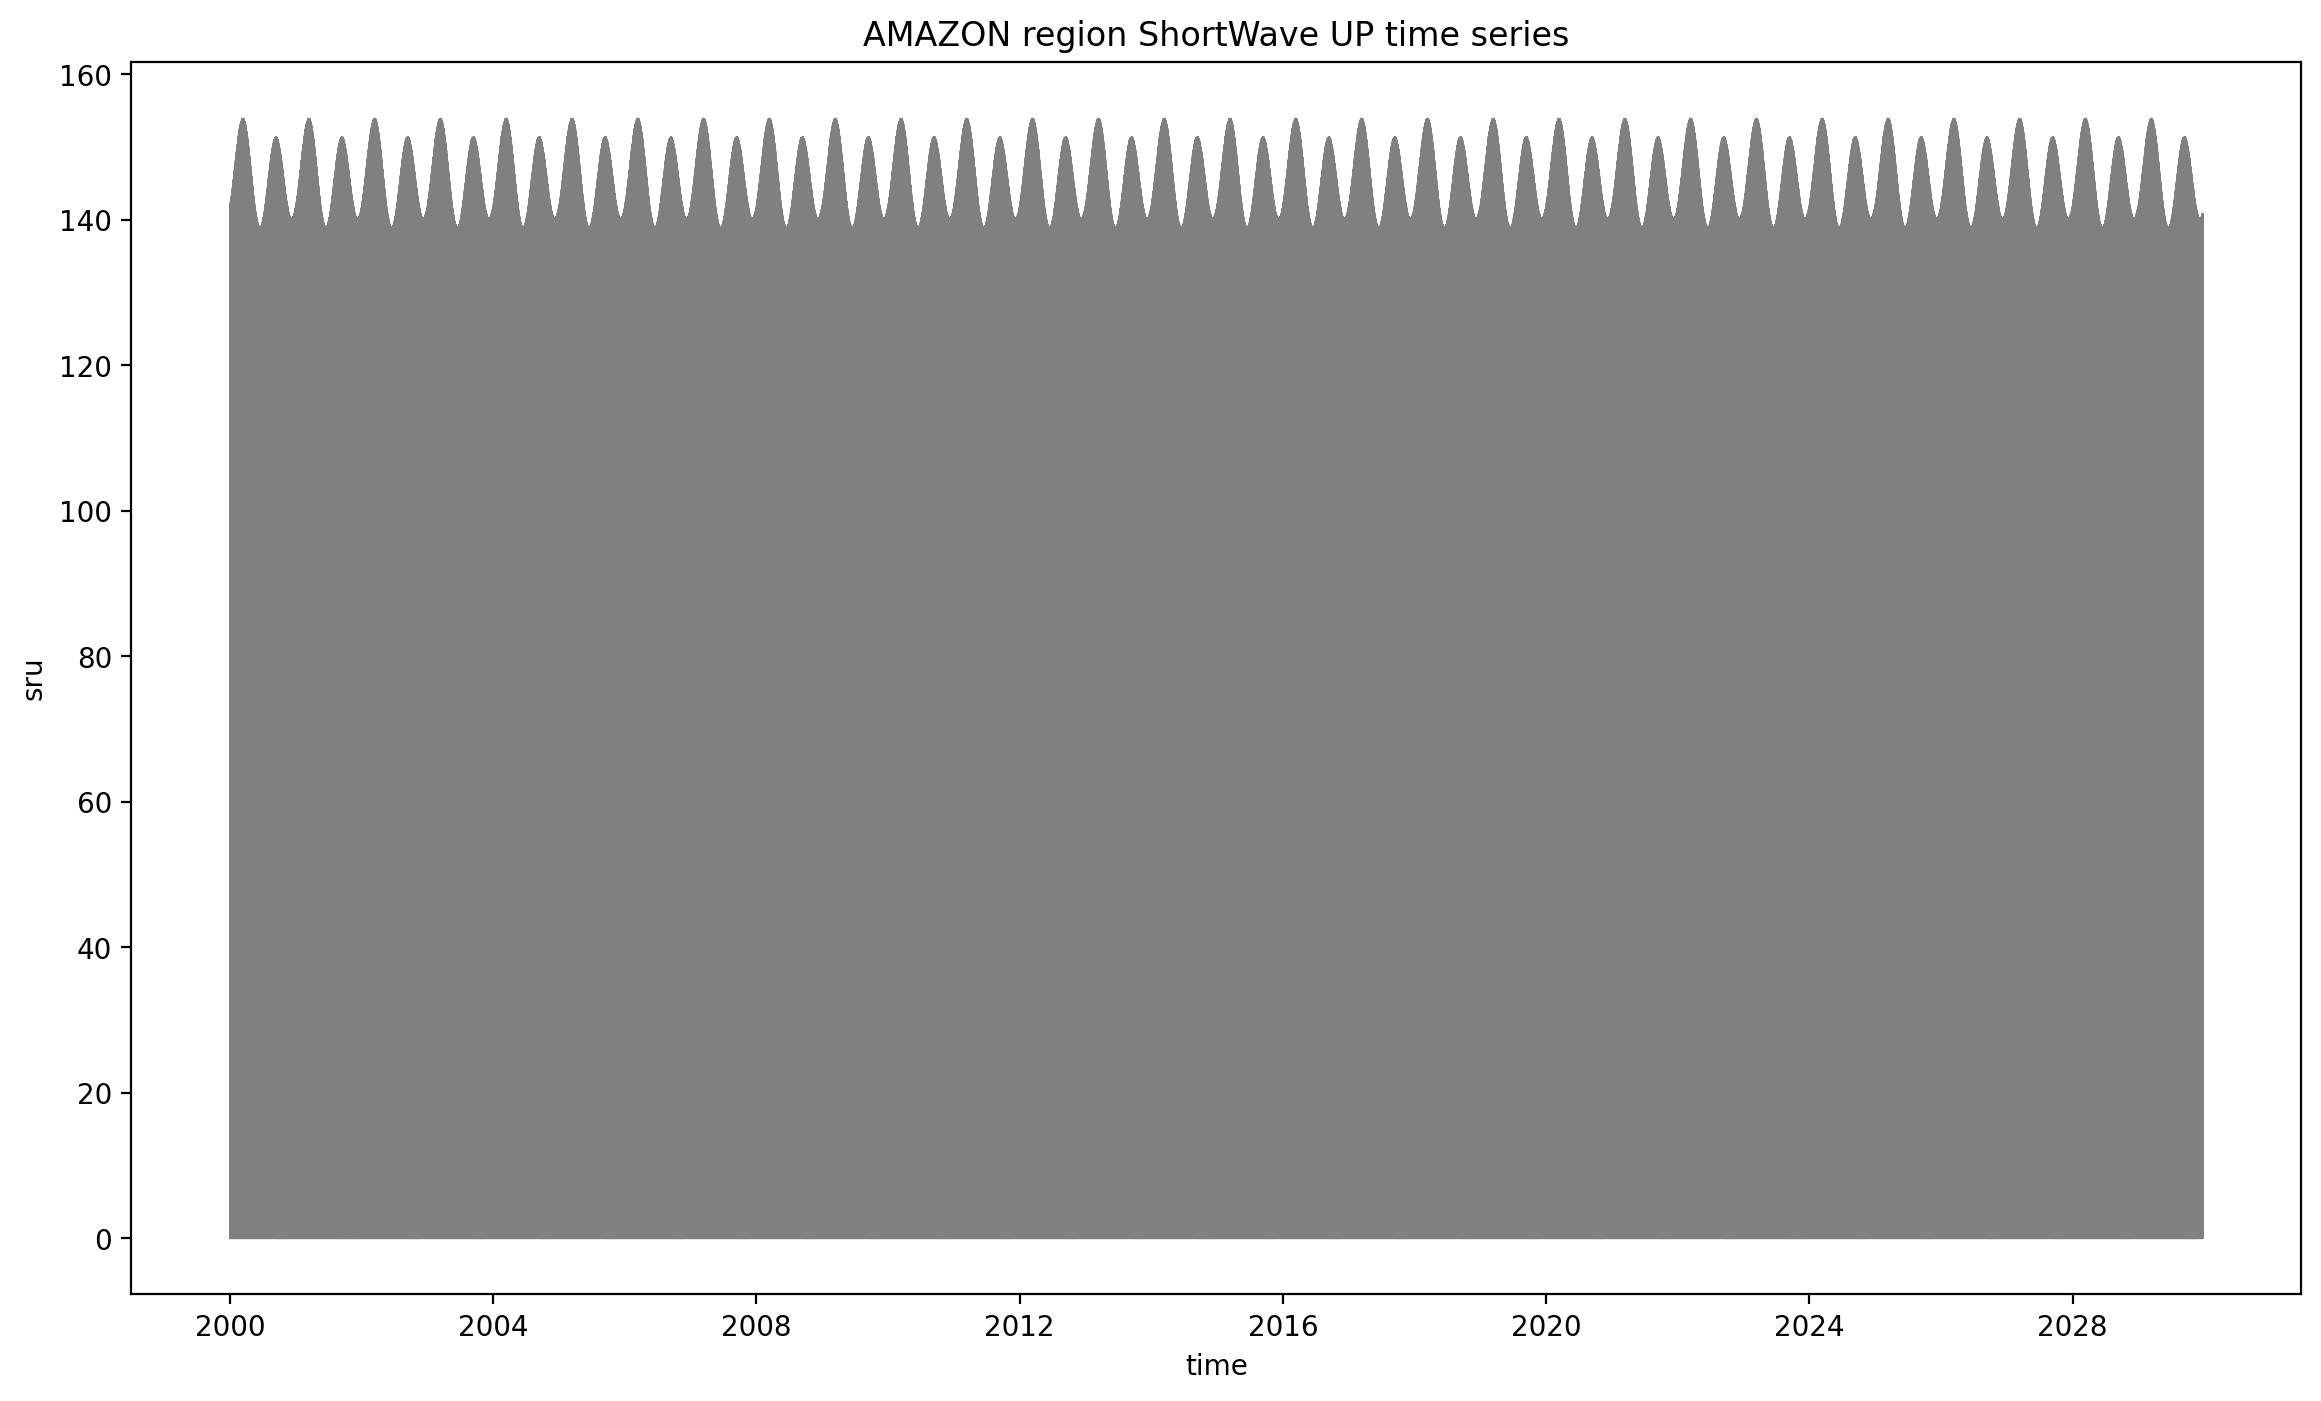

In [27]:
#plot the means
fig=plt.figure(figsize=(14,8))
AMAZON_region_mean.sru.plot(linewidth=0.5, color='grey')
plt.title("AMAZON region ShortWave UP time series")
#show plot
plt.show()
fig.savefig("SRU_run_AMAZON_"+runn+".png")

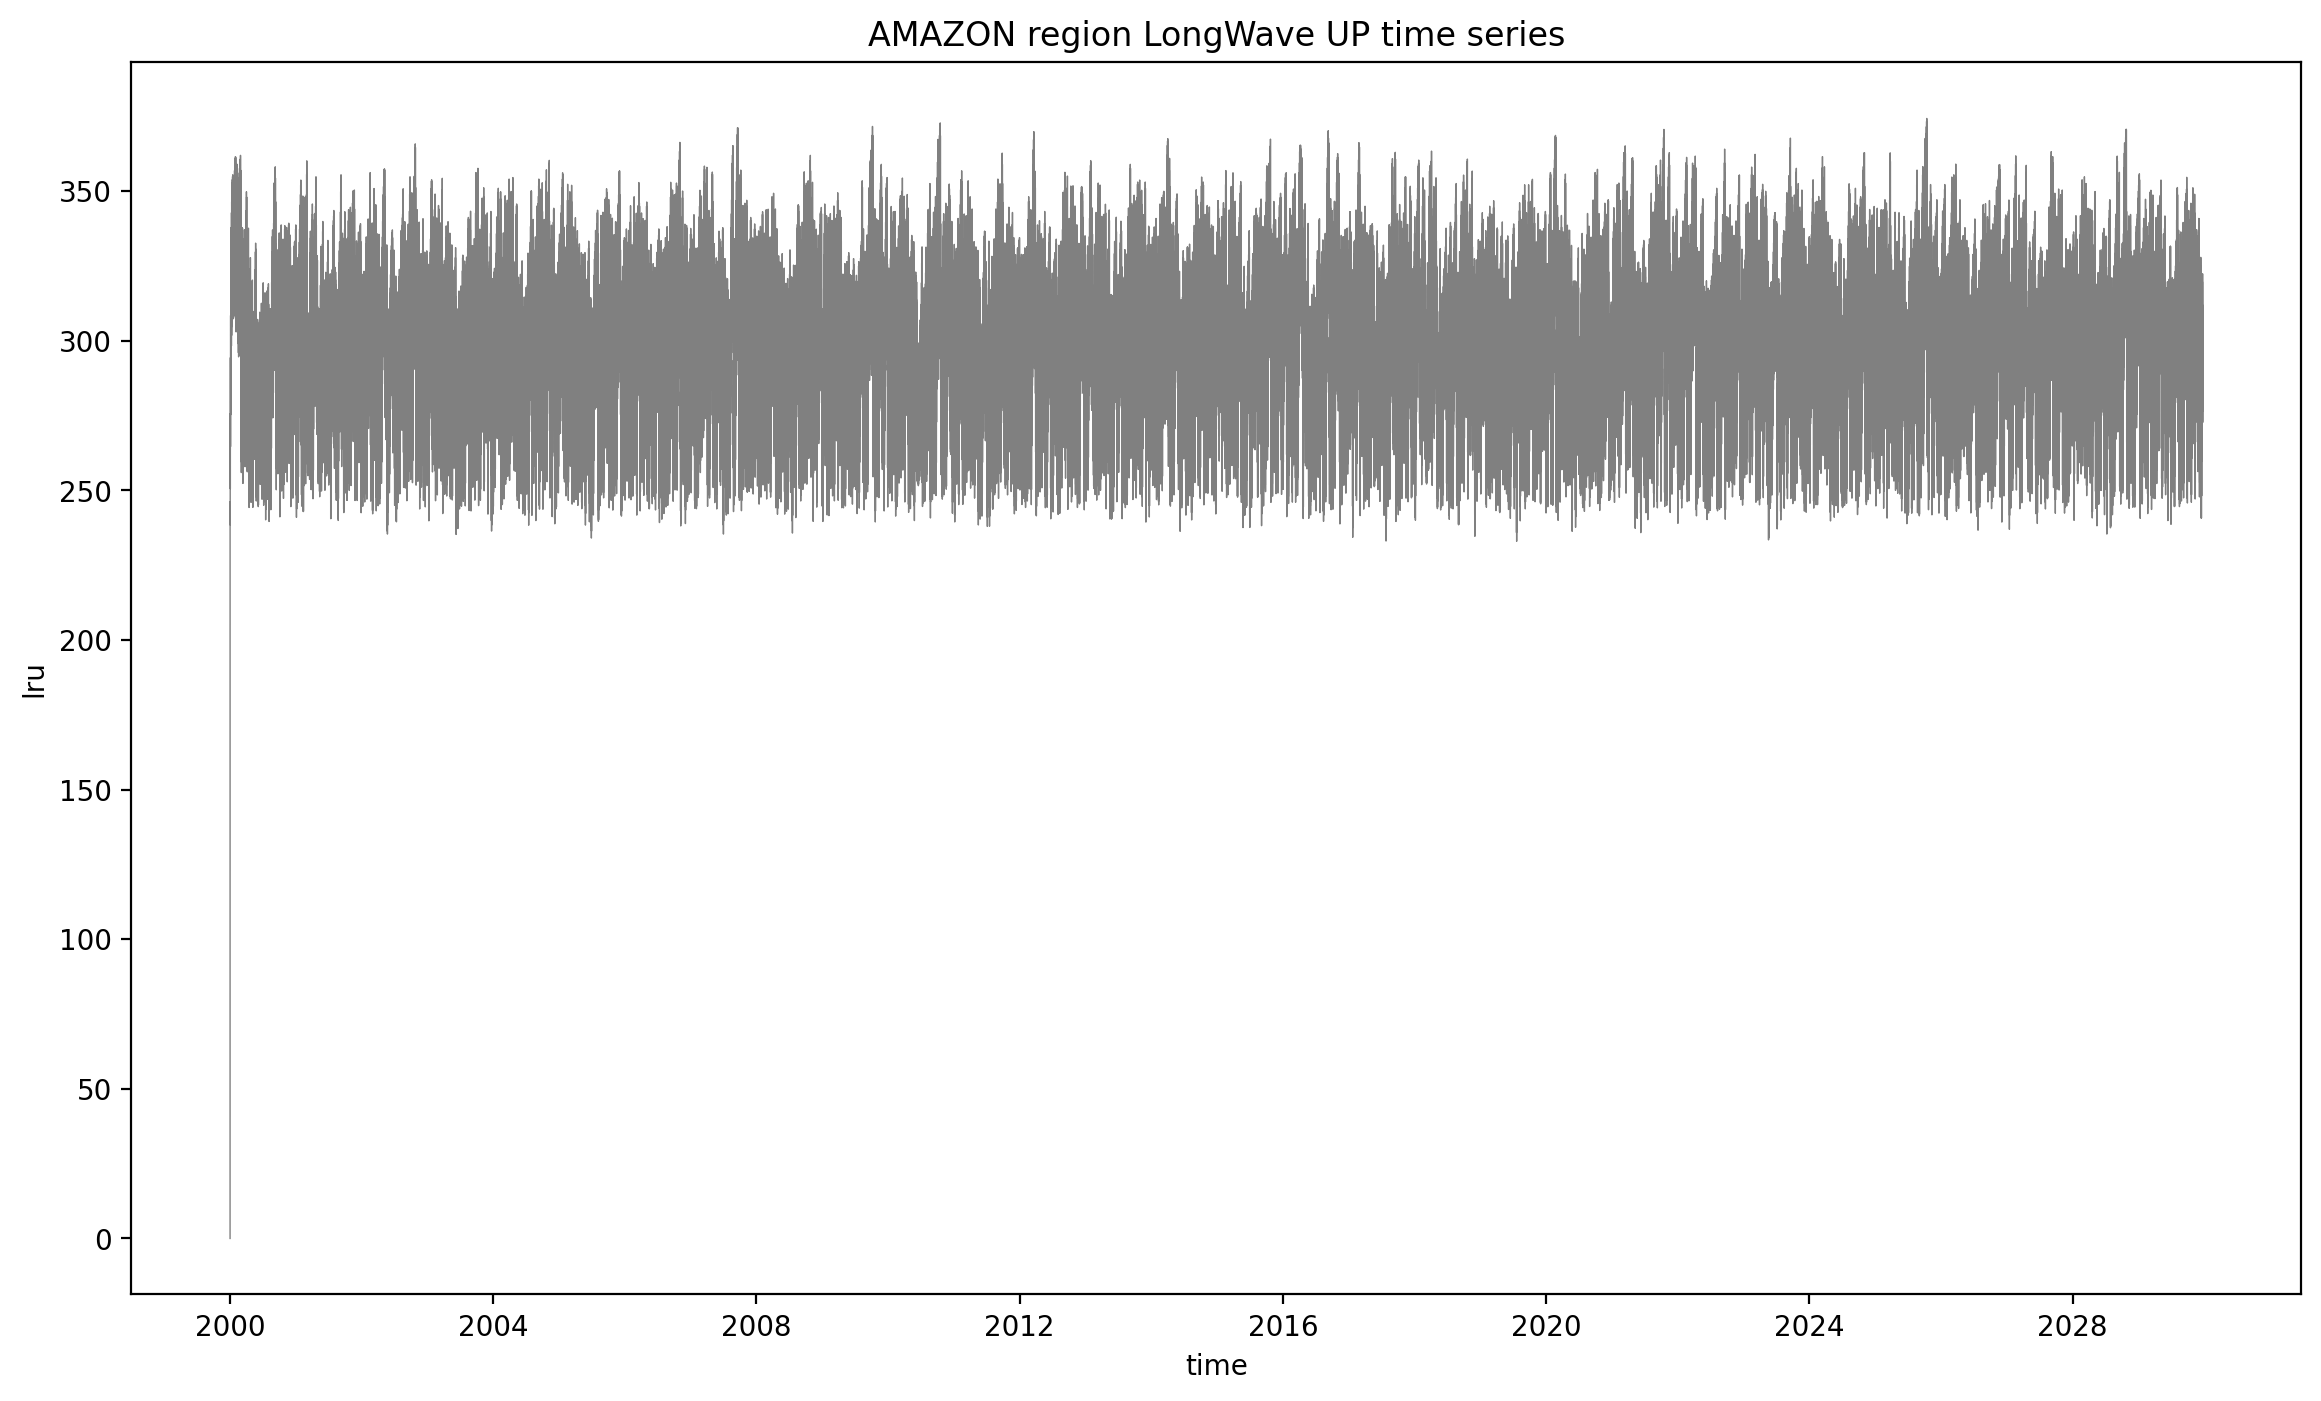

In [28]:
#plot the means
fig=plt.figure(figsize=(14,8))
AMAZON_region_mean.lru.plot(linewidth=0.5, color='grey')
plt.title("AMAZON region LongWave UP time series")
#show plot
plt.show()
fig.savefig("LRU_run_AMAZON_"+runn+".png")

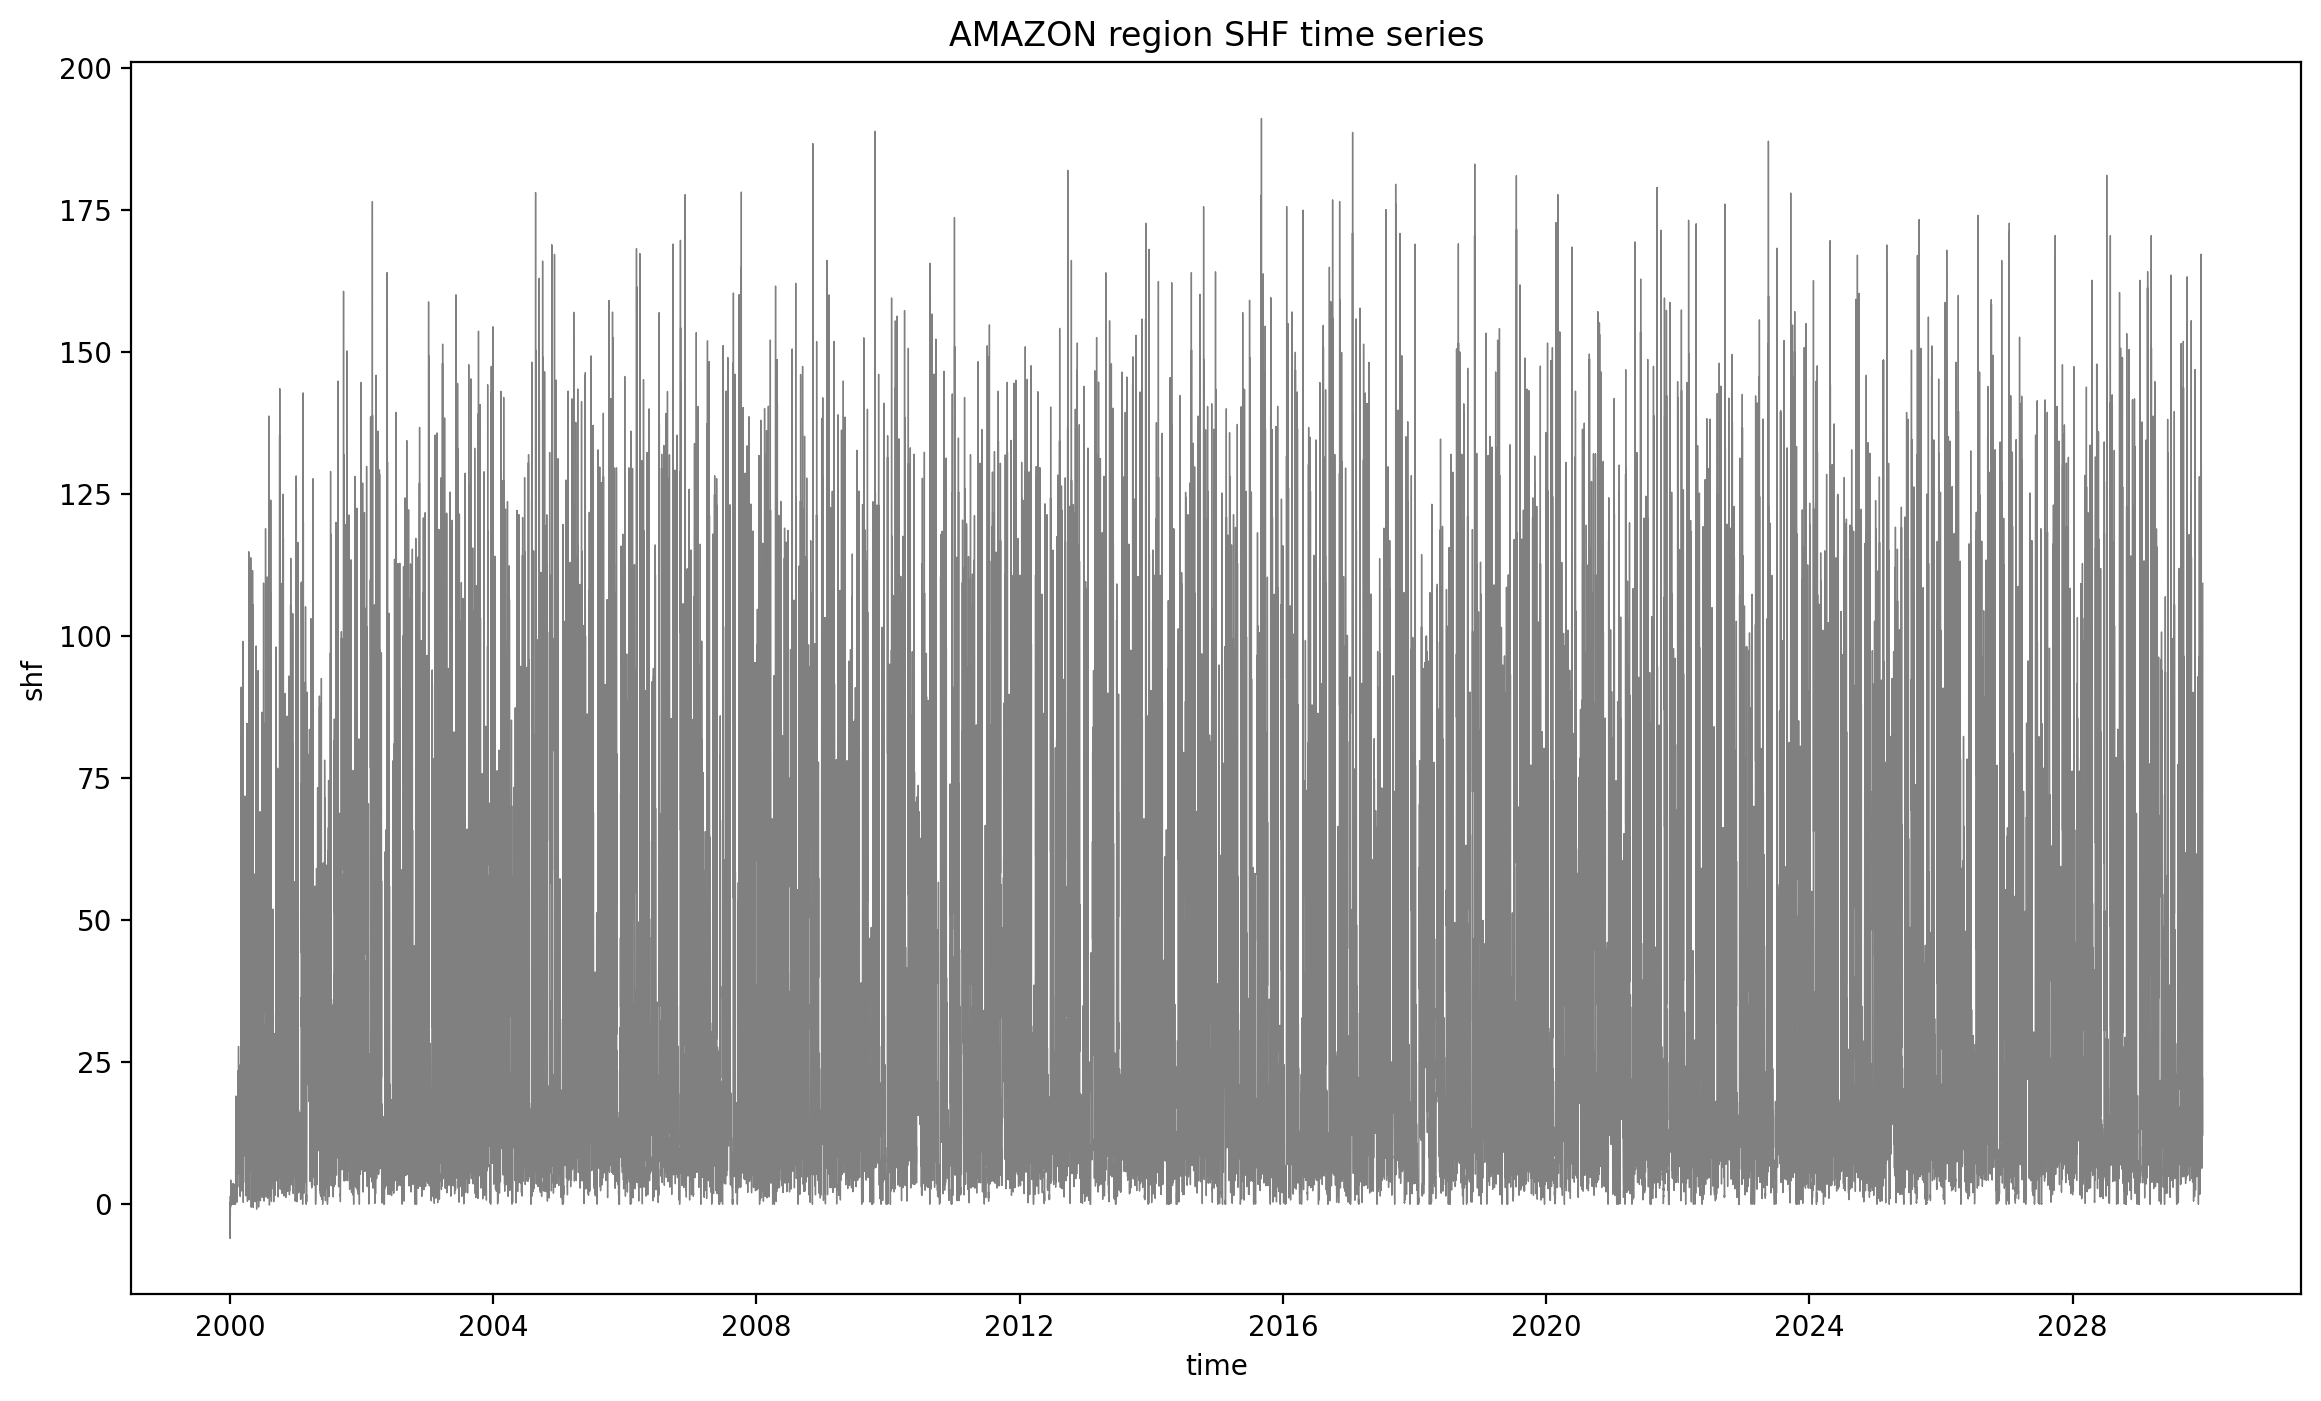

In [29]:
#plot the means
fig=plt.figure(figsize=(14,8))
AMAZON_region_mean.shf.plot(linewidth=0.5, color='grey')
plt.title("AMAZON region SHF time series")
#show plot
plt.show()
fig.savefig("SHF_run_AMAZON_"+runn+".png")

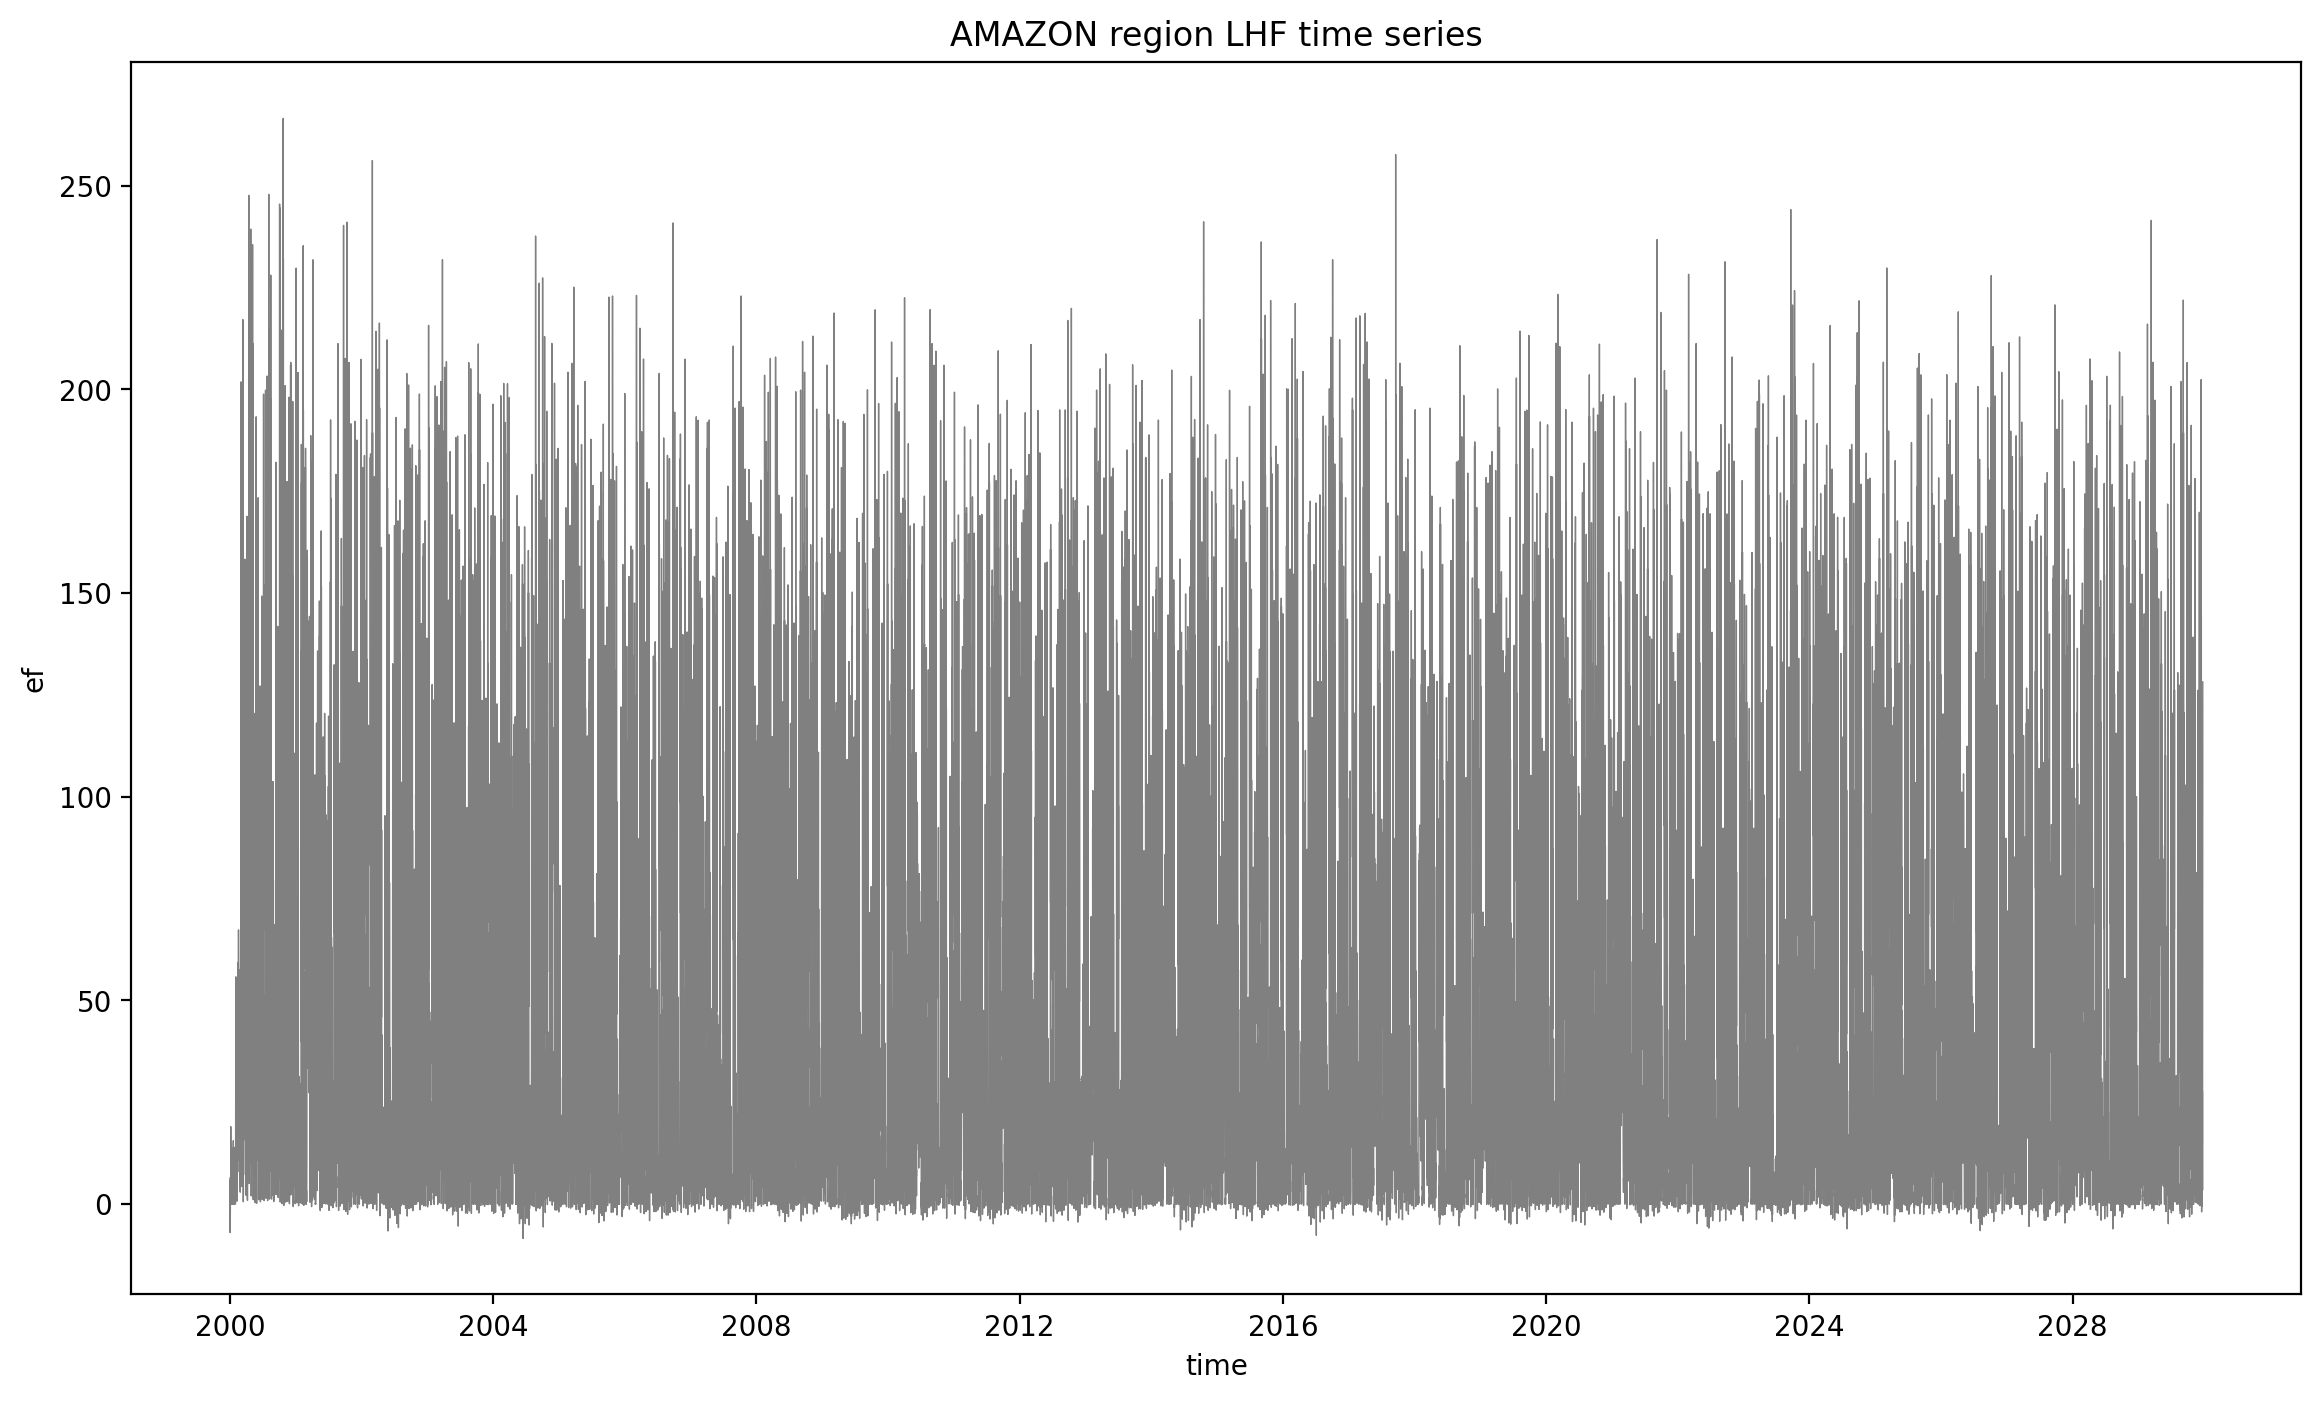

In [30]:
#plot the means
fig=plt.figure(figsize=(14,8))
lhf=2.5E6*AMAZON_region_mean.ef
lhf.plot(linewidth=0.5, color='grey')
plt.title("AMAZON region LHF time series")
#show plot
plt.show()
fig.savefig("LHF_run_AMAZON_"+runn+".png")

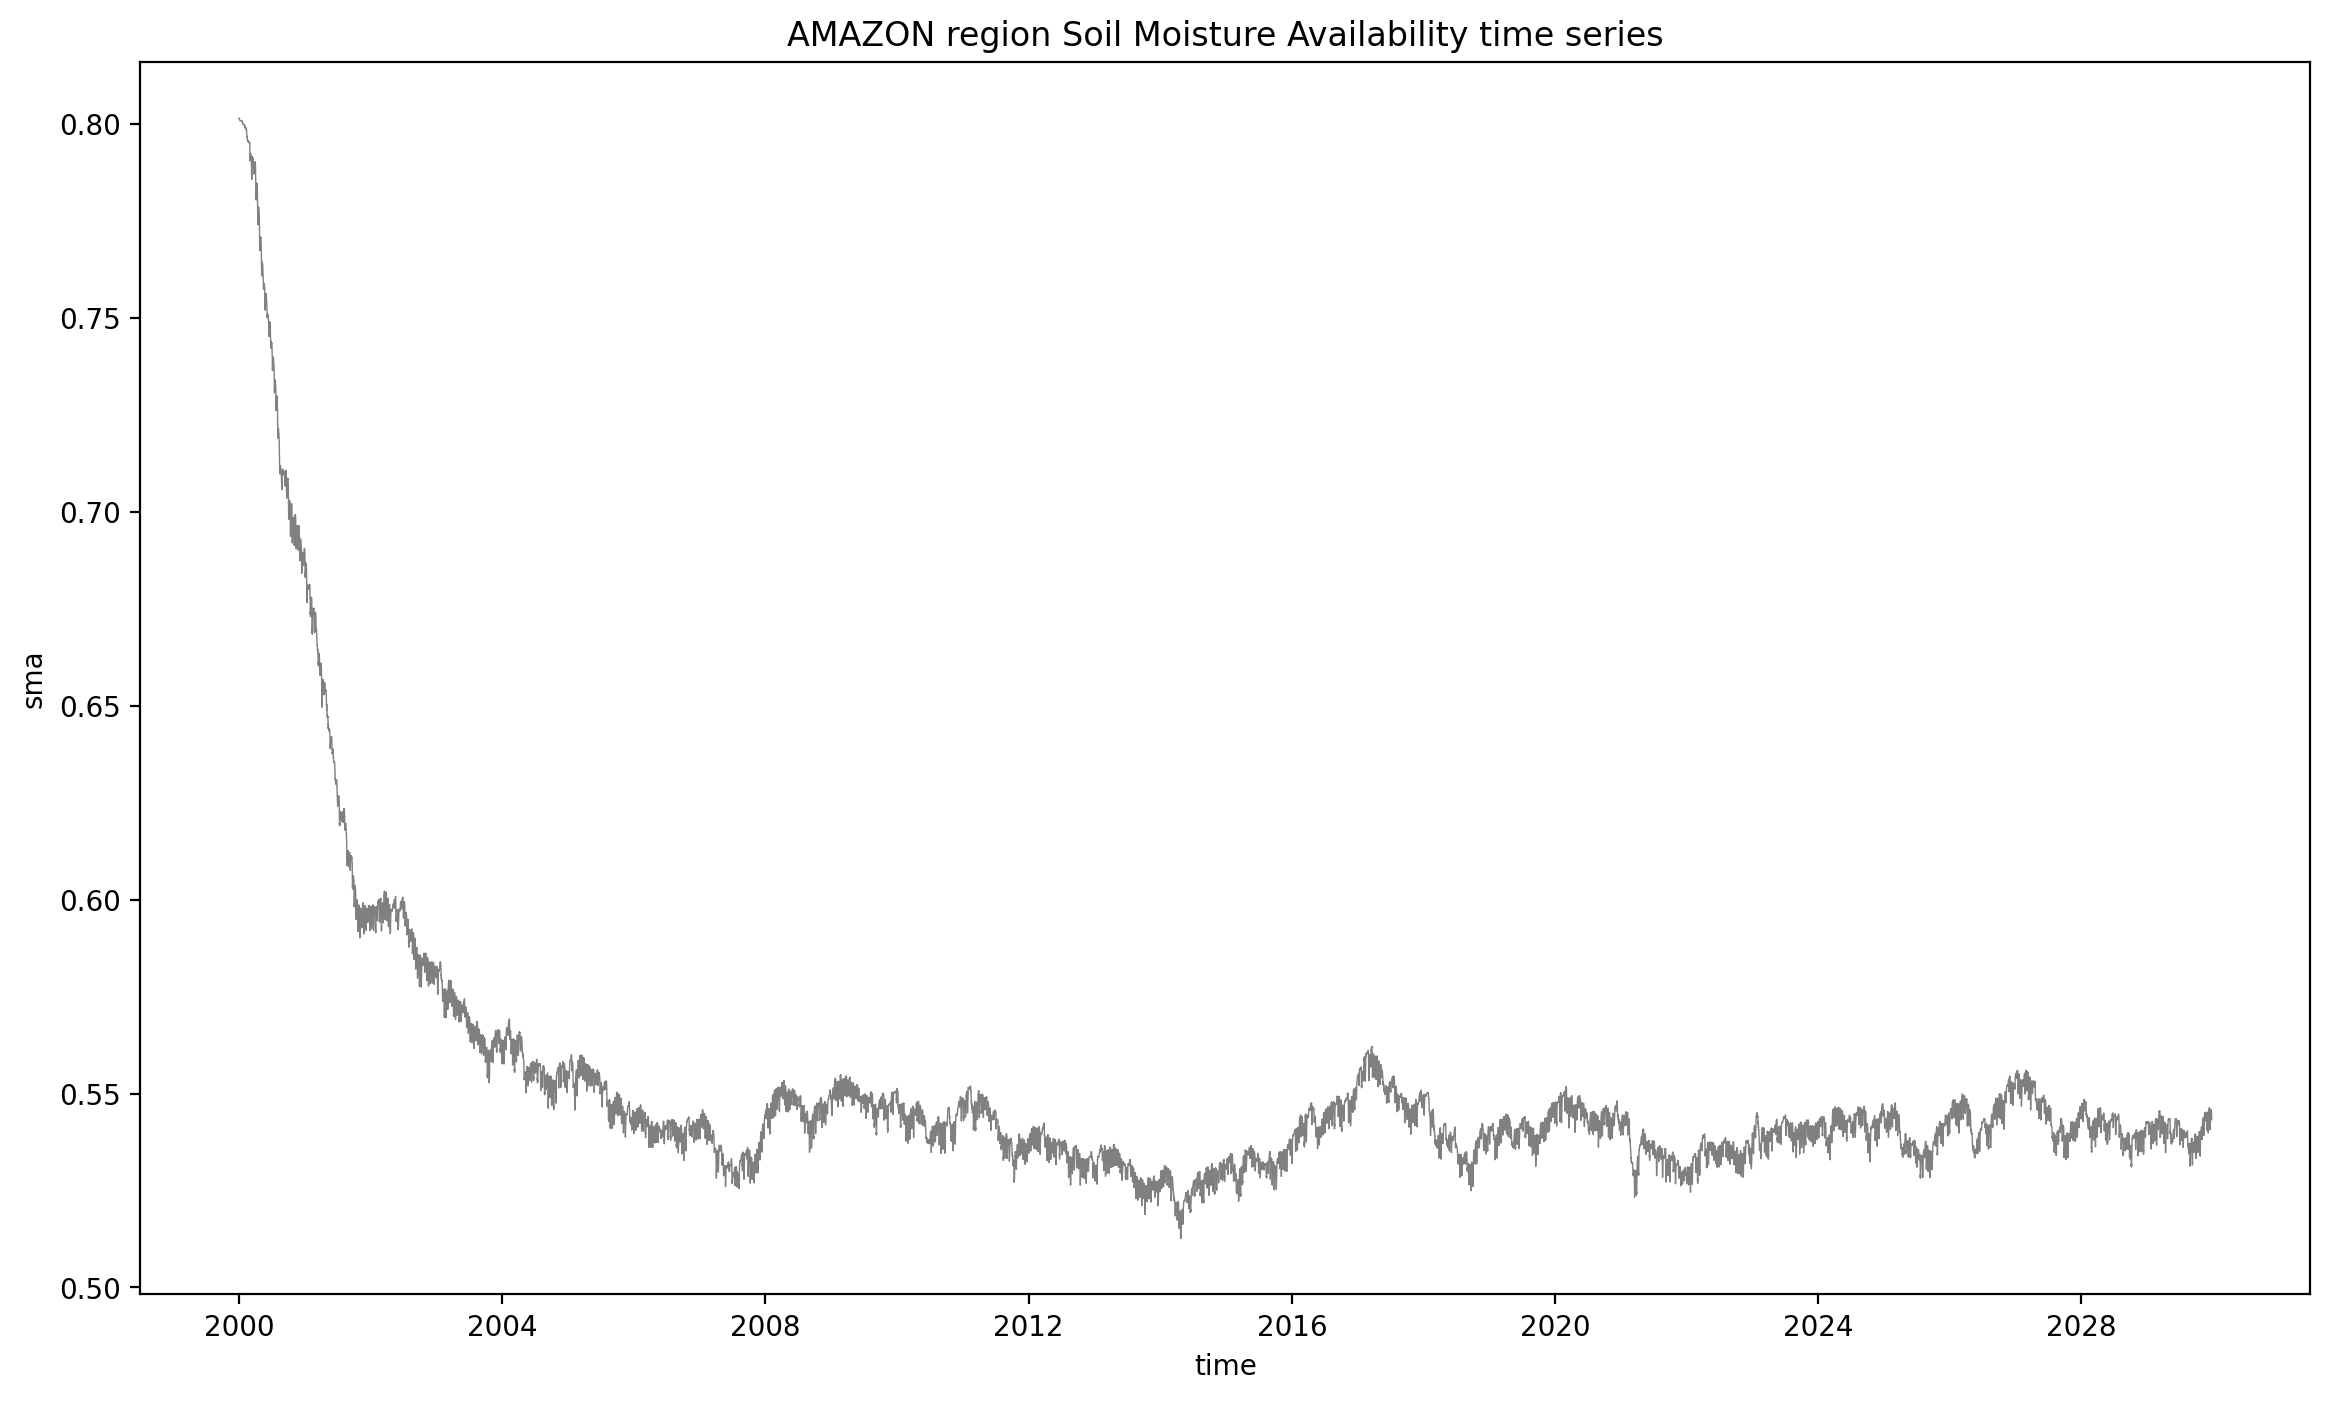

In [31]:
fig=plt.figure(figsize=(14,8))
AMAZON_region_mean.sma.plot(linewidth=0.5, color='grey')
plt.title("AMAZON region Soil Moisture Availability time series")
#show plot
plt.show()
fig.savefig("SMA_run_AMAZON_"+runn+".png")

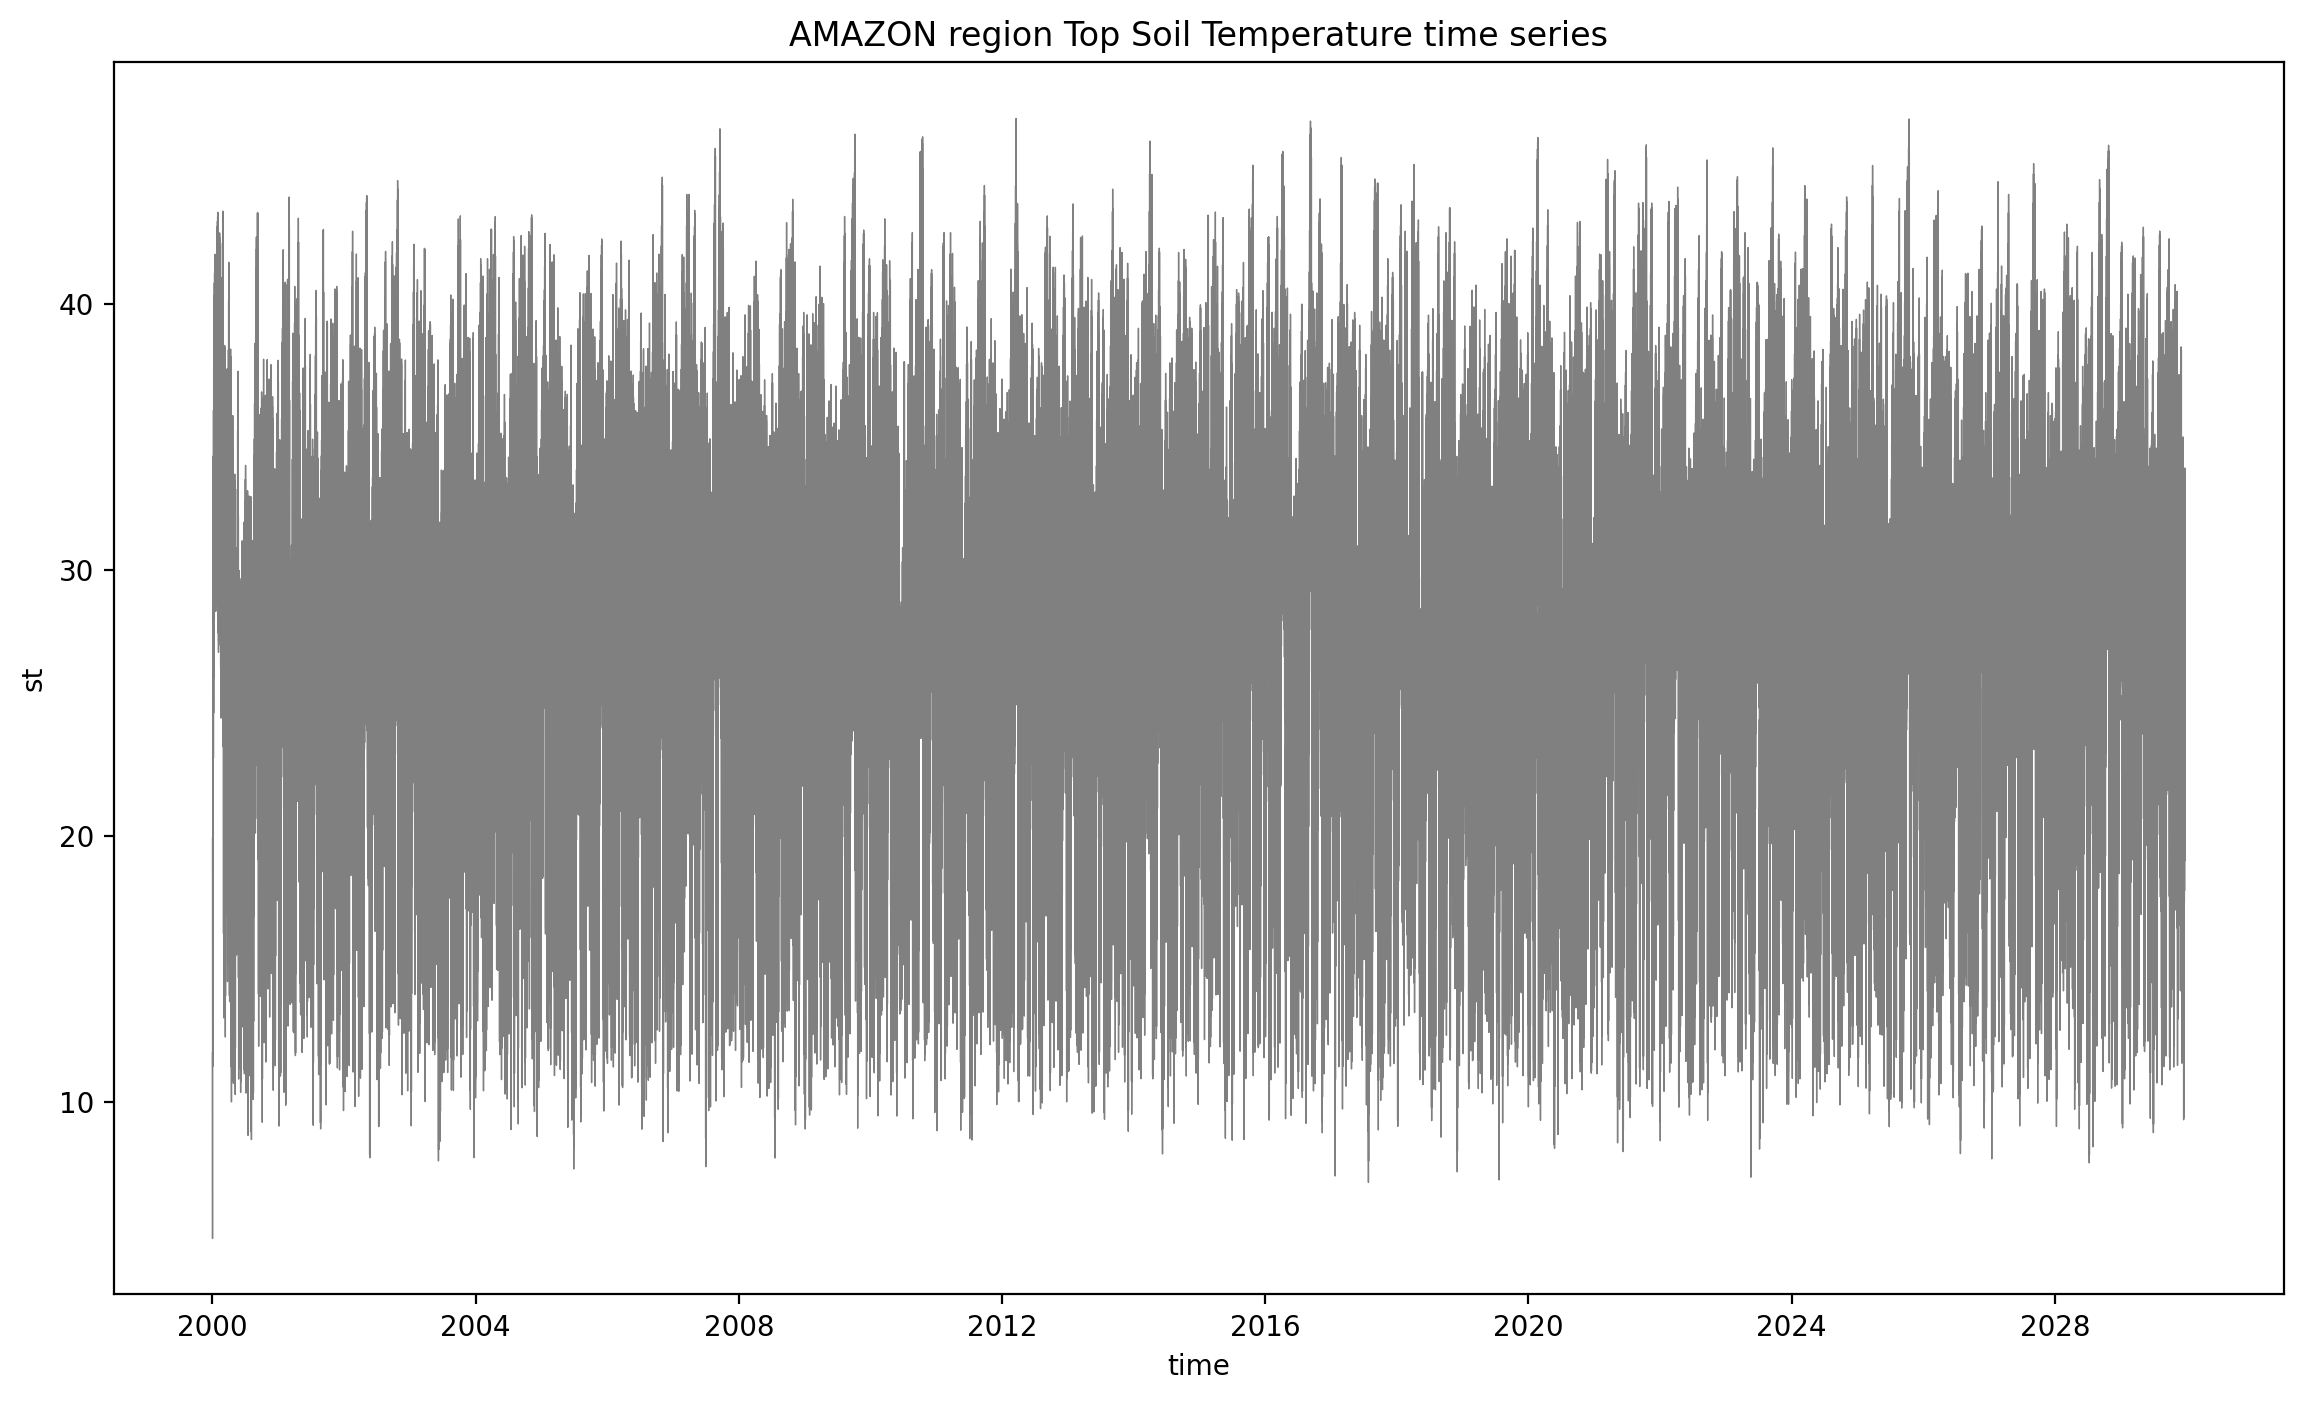

In [32]:
fig=plt.figure(figsize=(14,8))
st1=AMAZON_region_mean.st[:,0]
st1.plot(linewidth=0.5, color='grey')
plt.title("AMAZON region Top Soil Temperature time series")
#show plot
plt.show()
fig.savefig("ST1_run_AMAZON_"+runn+".png")

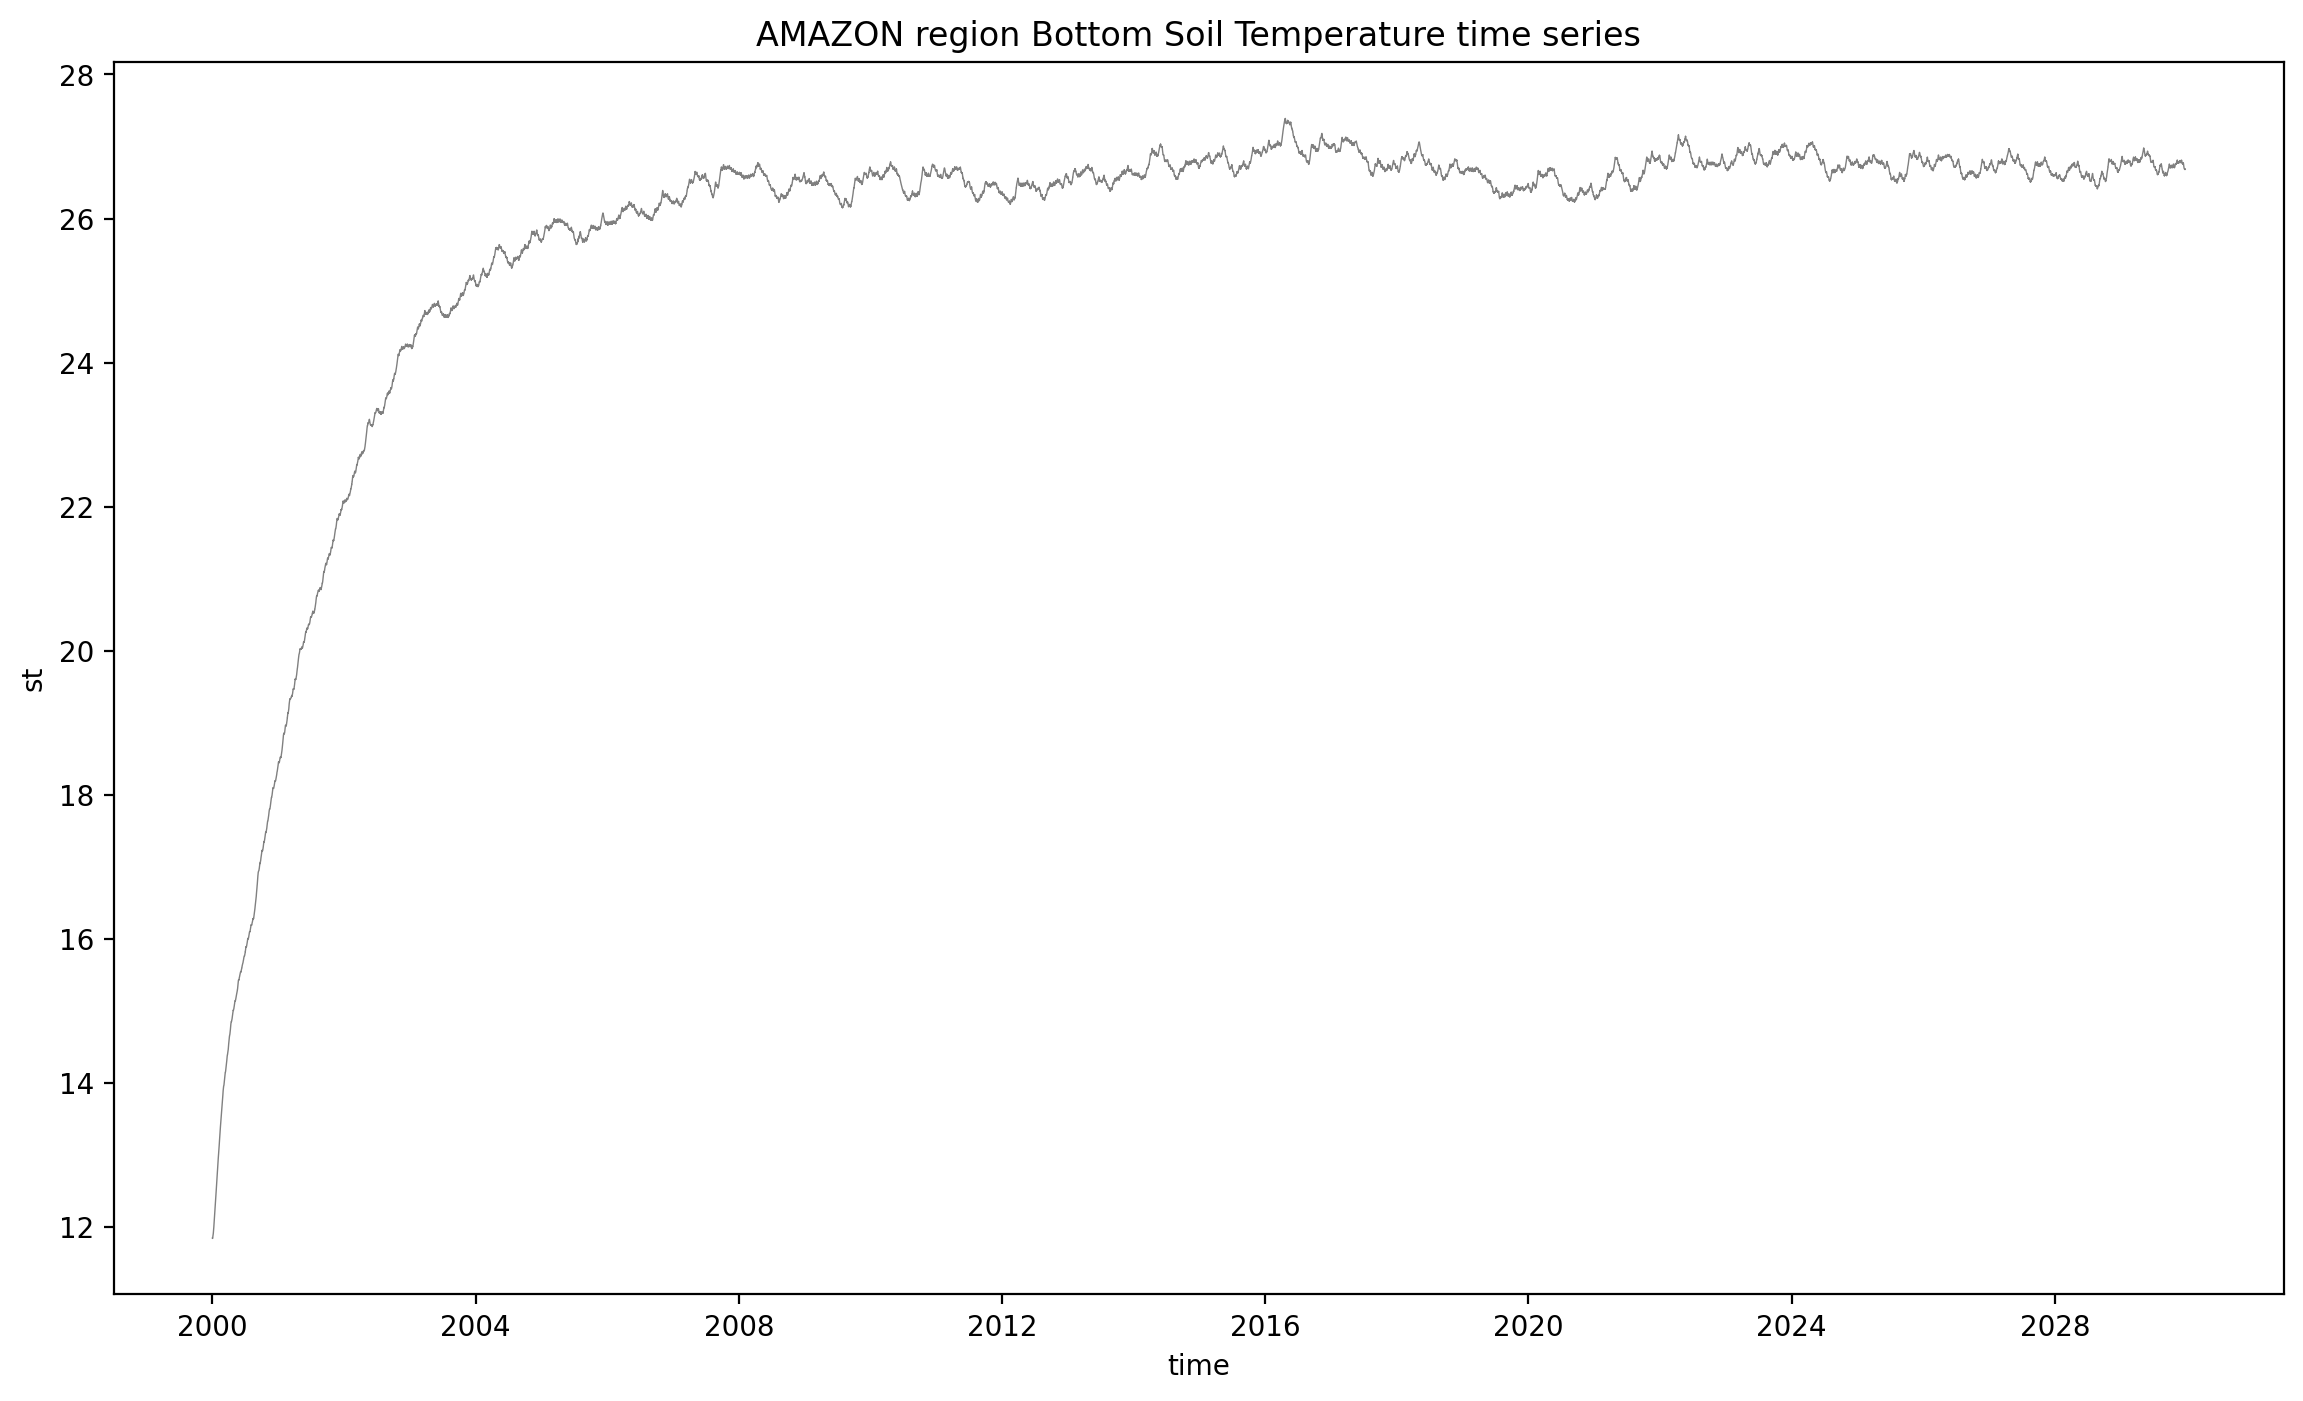

In [33]:
fig=plt.figure(figsize=(14,8))
st2=AMAZON_region_mean.st[:,1]
st2.plot(linewidth=0.5, color='grey')
plt.title("AMAZON region Bottom Soil Temperature time series")
#show plot
plt.show()
fig.savefig("ST2_run_AMAZON_"+runn+".png")

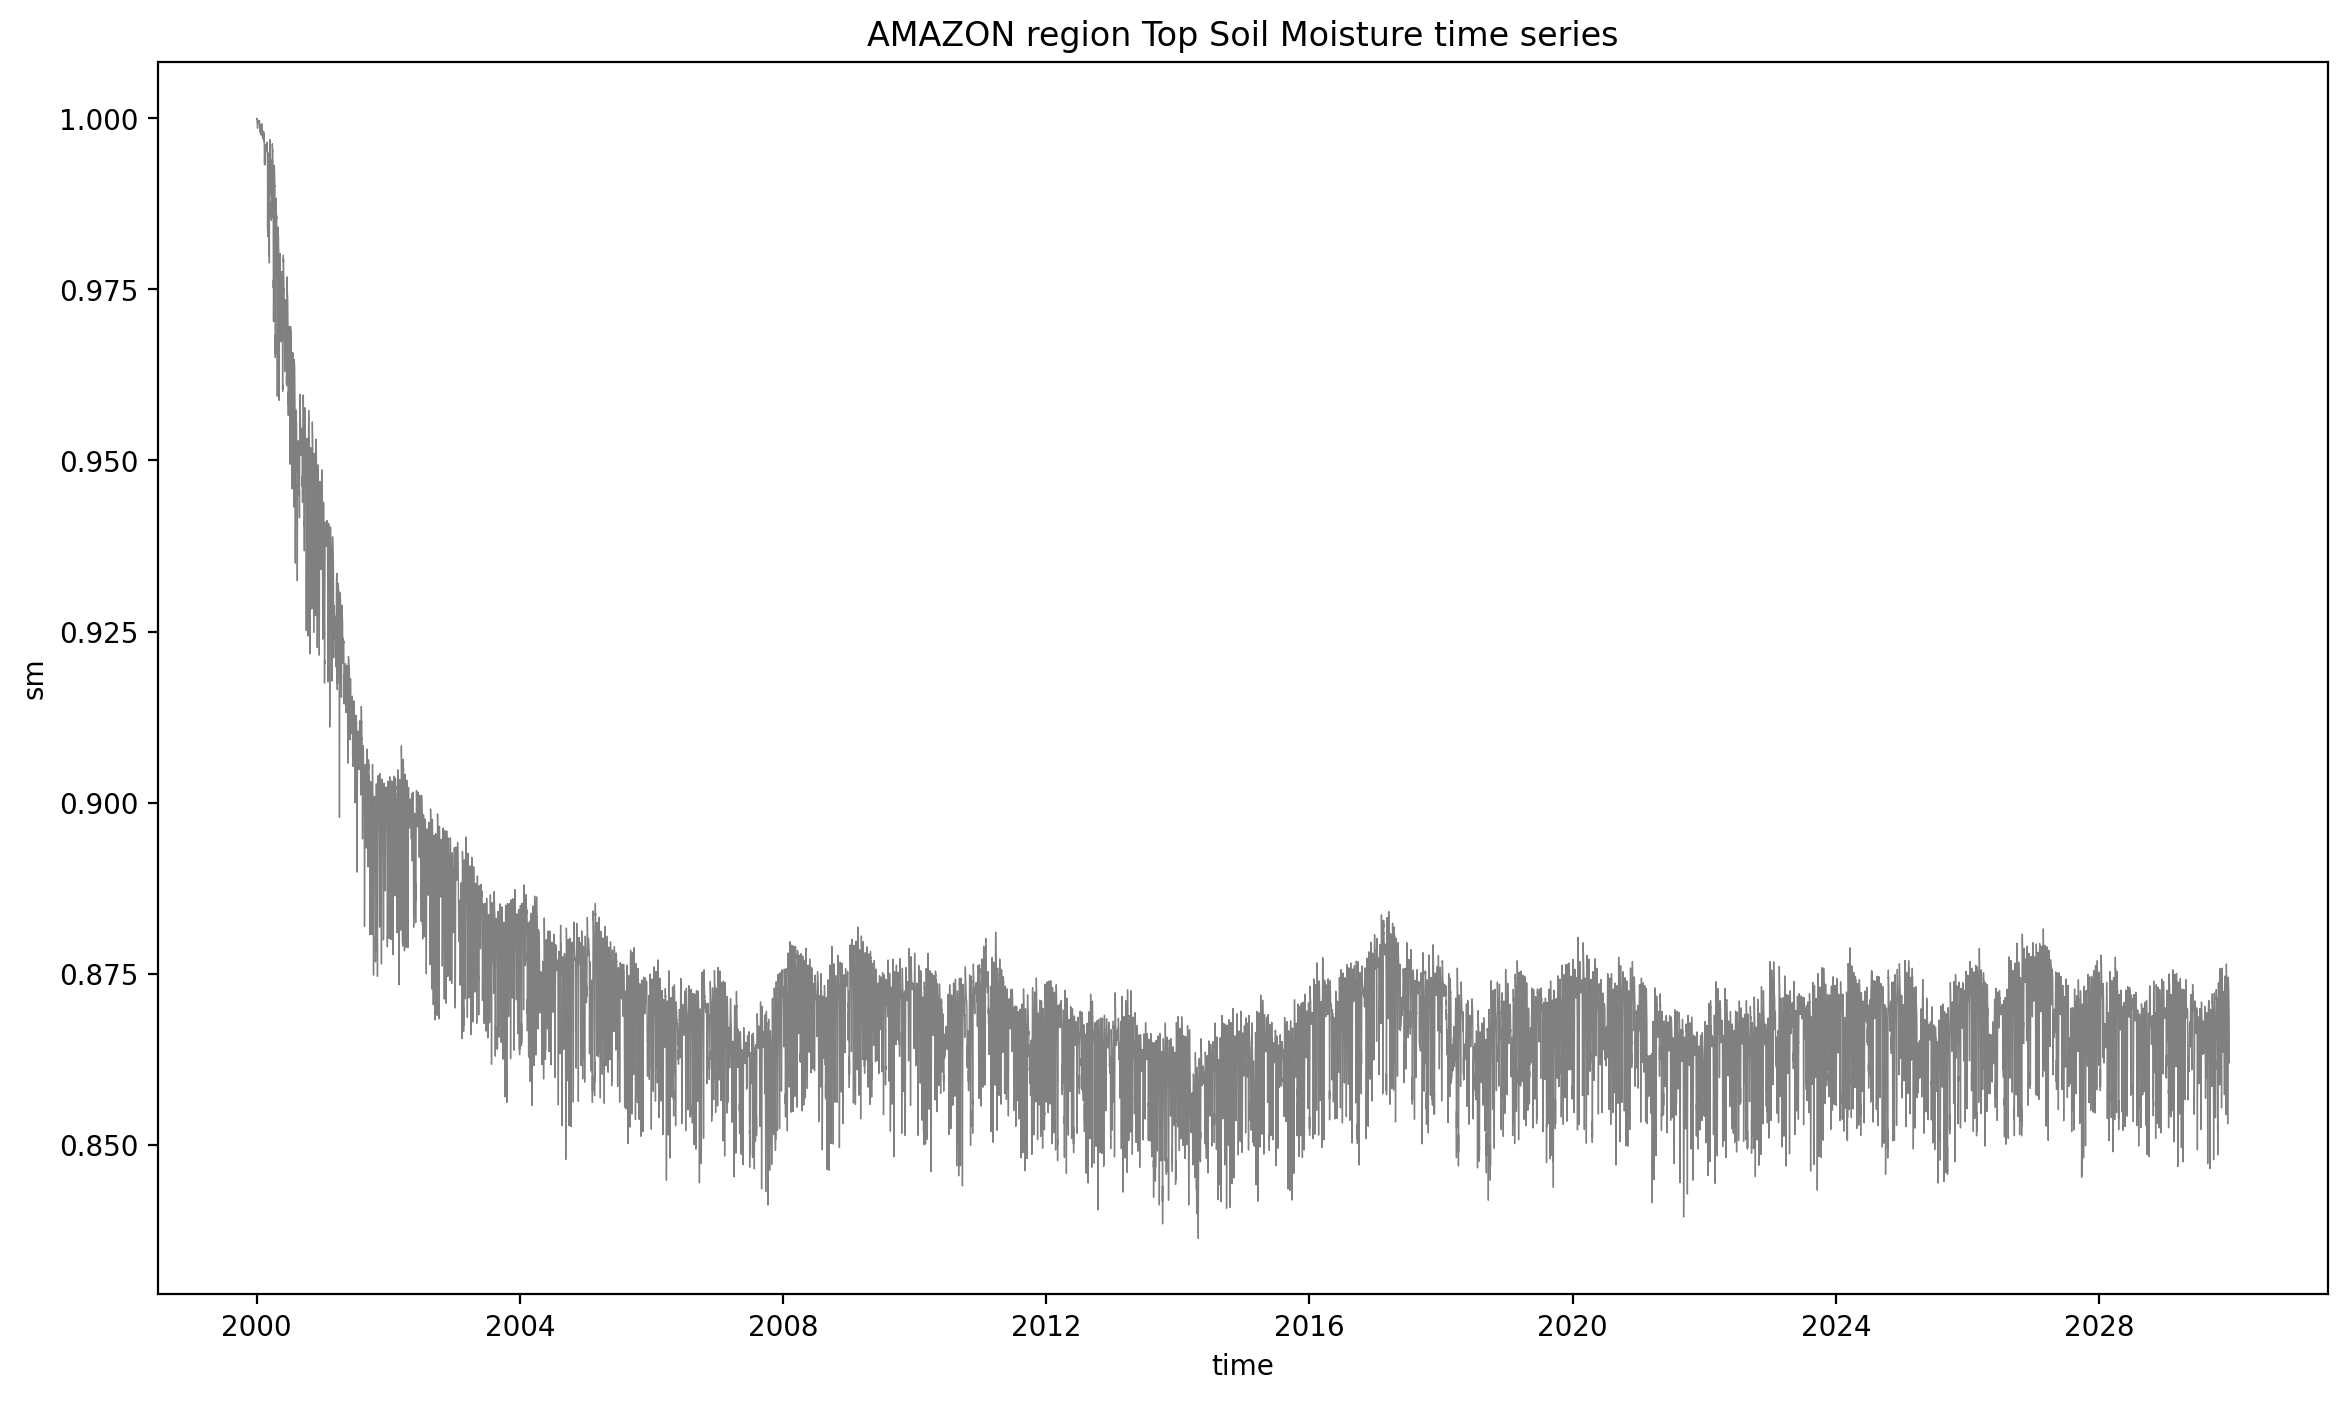

In [34]:
fig=plt.figure(figsize=(14,8))
sm1=AMAZON_region_mean.sm[:,0]
sm1.plot(linewidth=0.5, color='grey')
plt.title("AMAZON region Top Soil Moisture time series")
#show plot
plt.show()
fig.savefig("SM1_run_AMAZON_"+runn+".png")

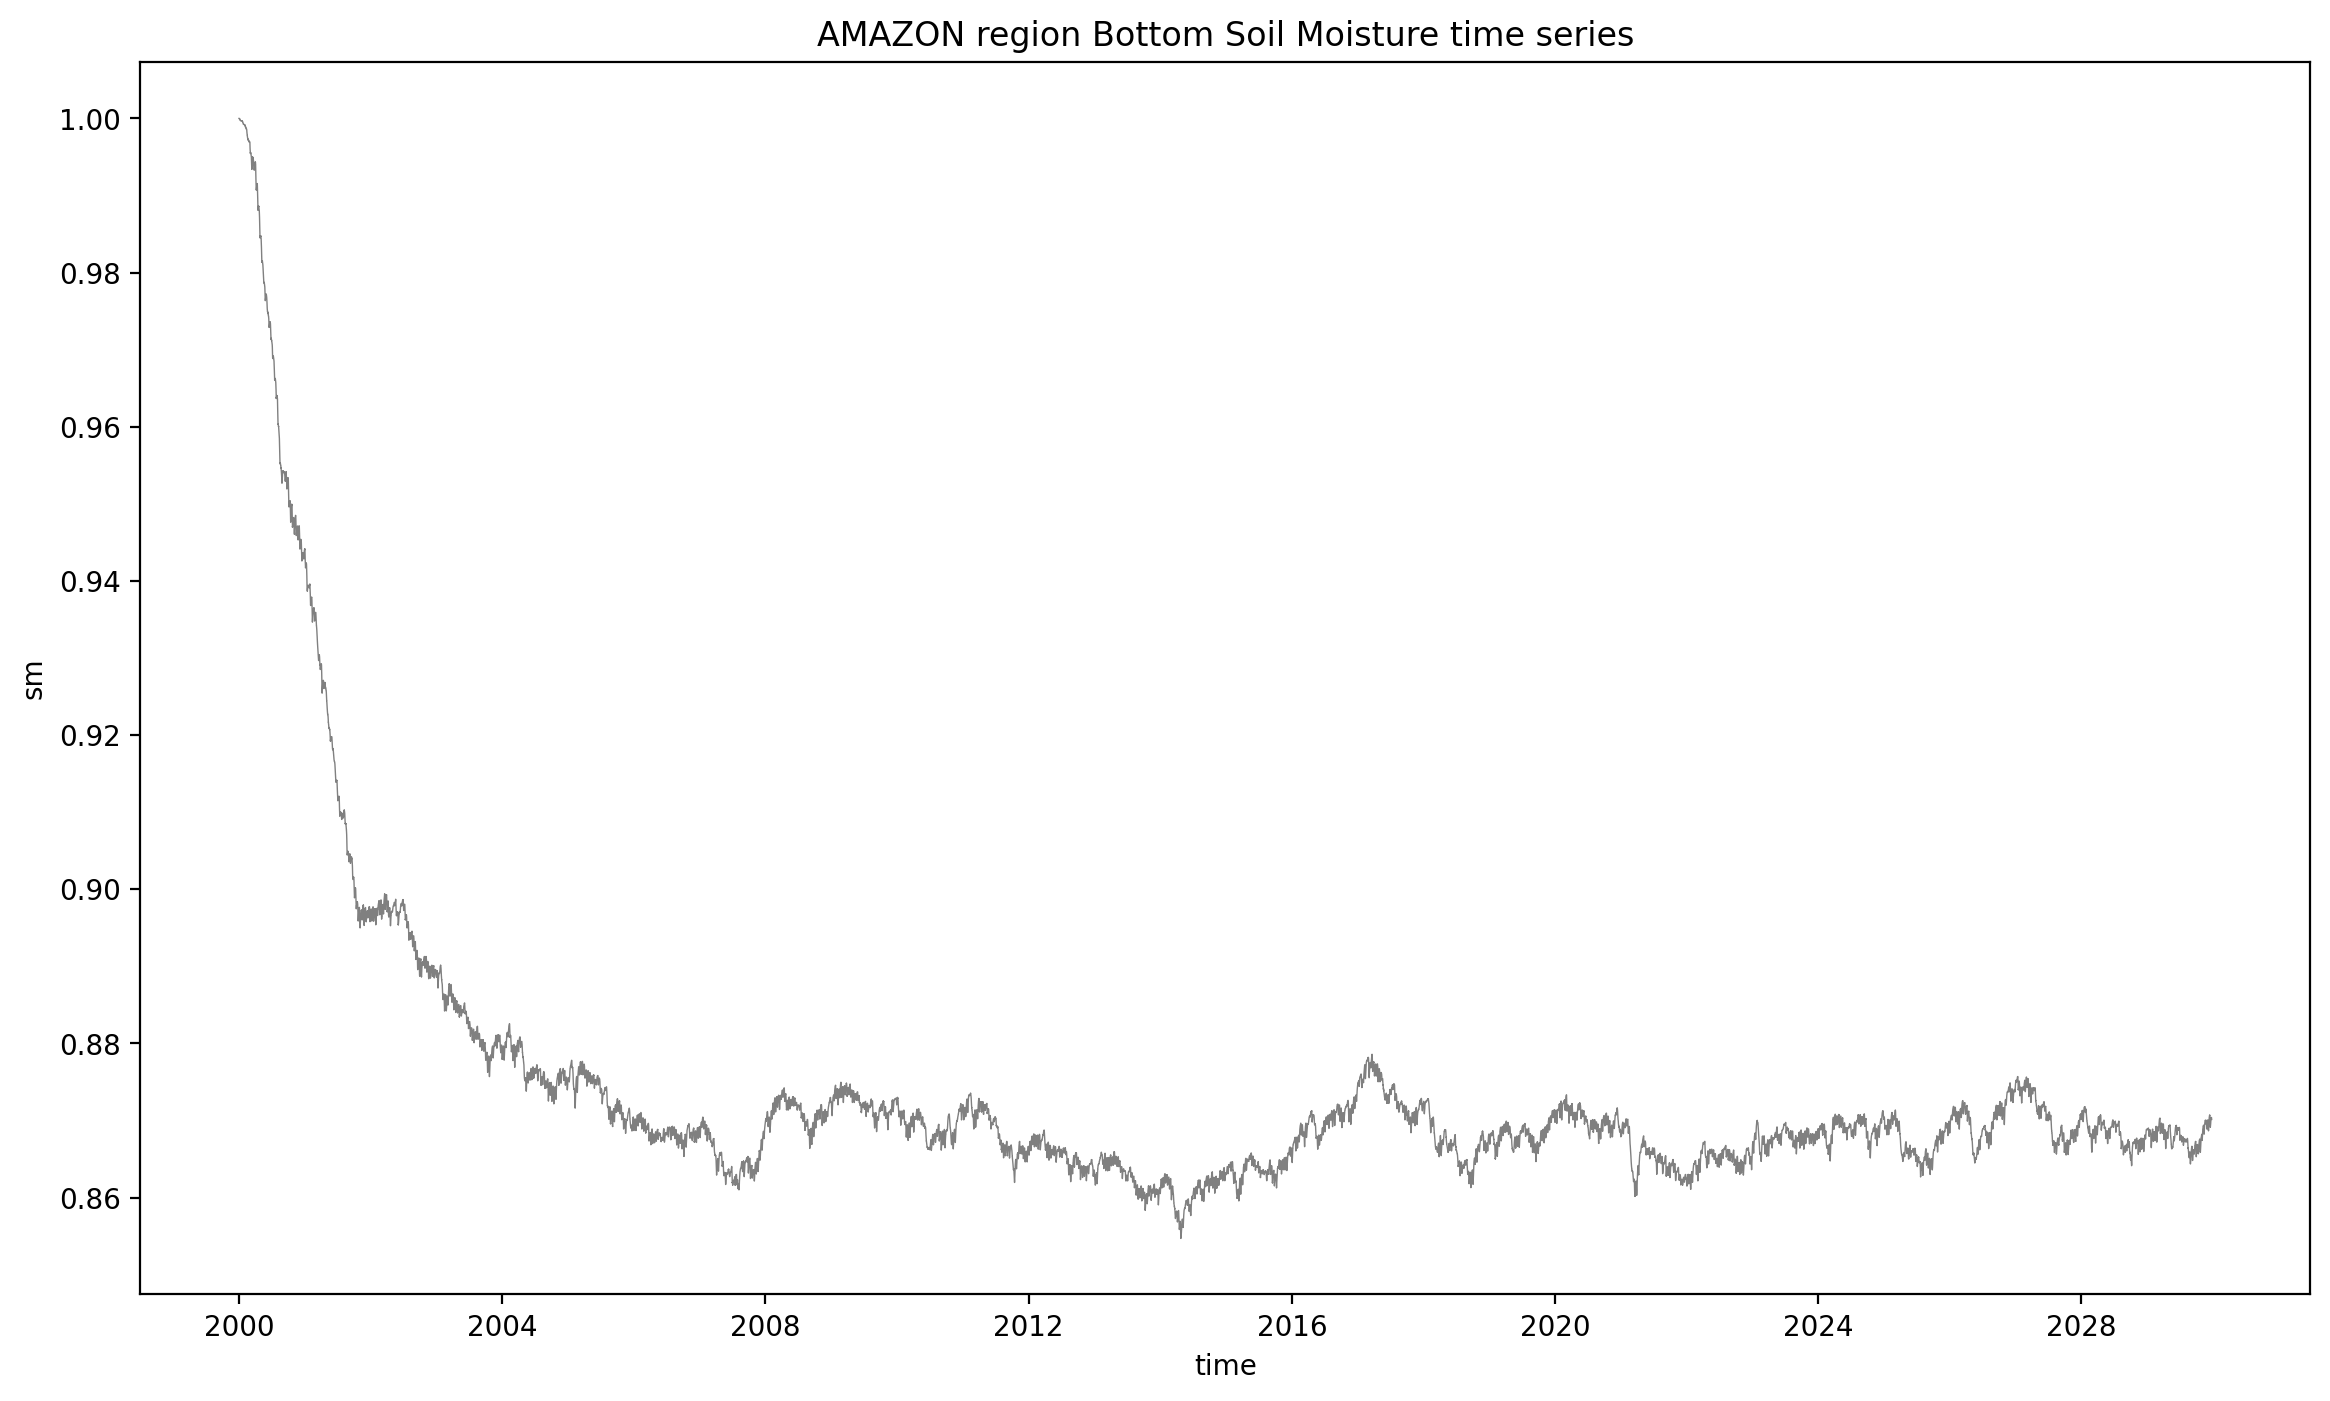

In [35]:
fig=plt.figure(figsize=(14,8))
sm2=AMAZON_region_mean.sm[:,1]
sm2.plot(linewidth=0.5, color='grey')
plt.title("AMAZON region Bottom Soil Moisture time series")
#show plot
plt.show()
fig.savefig("SM2_run_AMAZON_"+runn+".png")